In [46]:
import numpy as np
import tensorflow as tf
import math as math
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow import keras
import matplotlib.pyplot as plot
import os

In [12]:
def leerdato(nombre):
    f = open (nombre,'r')
    mensaje = f.read()
    valores=mensaje.split('\n')
    filtrado=[]

    for i in valores:
        filtrado.append(i.split())

    training_data=[]
    for i in range(len(filtrado)):
        aux=[]
        for j in range(len(filtrado[0])):
            aux.append(float(filtrado[i][j]))
        training_data.append(aux)

    f.close()
    return  training_data

# 1. Dataset normal

In [13]:
training_data = leerdato('datasetICC.txt')
target_data = leerdato('respICC.txt')

# Preparacion

In [14]:
junto=[]
for i in range(len(training_data)):
    junto.append(training_data[i]+target_data[i])

In [15]:
tf.random.shuffle(junto)

<tf.Tensor: shape=(59049, 11), dtype=float32, numpy=
array([[ 2.8571434e+00,  0.0000000e+00, -1.9522581e-01, ...,
         4.0000001e-01,  6.9999999e-01,  8.0000001e-01],
       [ 1.9415669e+00,  0.0000000e+00,  4.7174960e-01, ...,
         8.9999998e-01,  8.9999998e-01,  5.0000000e-01],
       [ 2.2205841e+01,  0.0000000e+00, -2.6093351e-02, ...,
         6.9999999e-01,  6.0000002e-01,  1.0000000e-01],
       ...,
       [ 3.0614209e+00,  0.0000000e+00, -3.1140703e-01, ...,
         6.0000002e-01,  4.0000001e-01,  6.0000002e-01],
       [ 2.4725245e+01,  0.0000000e+00,  6.3891602e-01, ...,
         6.0000002e-01,  5.0000000e-01,  8.0000001e-01],
       [ 2.1914515e+01,  0.0000000e+00,  9.2894100e-03, ...,
         1.0000000e-01,  1.0000000e-01,  8.9999998e-01]], dtype=float32)>

In [16]:
n=len(training_data[0])
na=len(junto[0])
#print(n)
#print(na)
junto=np.array(junto)
s_training_data = (junto[:,0:n]).tolist()
s_target_data = (junto[:,n:na]).tolist()

In [17]:
def create_model():
    model = Sequential()
    model.add(Dense(75, input_dim=len(s_training_data[0]), activation='relu'))
    model.add(Dense(150, input_dim=100, activation='relu'))
    model.add(Dense(75, input_dim=100, activation='relu'))
    model.add(Dense(len(s_target_data[0]), activation='linear', name="salida"))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
    model.summary()
    
    return model

def create_model2():
    model = Sequential()
    model.add(Dense(75, input_dim=len(s_training_data[0]), activation='relu'))
    model.add(Dense(150, input_dim=100, activation='relu'))
    model.add(Dense(75, input_dim=100, activation='relu'))
    model.add(Dense(len(s_target_data[0]), activation='linear', name="salida"))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
    model.summary()

    return model

def create_model3():
    model = Sequential()
    model.add(Dense(75, input_dim=len(s_training_data[0]), activation='relu'))
    model.add(Dense(100, input_dim=75, activation='relu'))    
    model.add(Dense(150, input_dim=100, activation='relu'))
    model.add(Dense(100, input_dim=150, activation='relu'))
    model.add(Dense(75, input_dim=100, activation='relu'))
    model.add(Dense(len(s_target_data[0]), activation='linear', name="salida"))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
    model.summary()
    
    return model

def create_model4():
    model = Sequential()
    model.add(Dense(100, input_dim=len(s_training_data[0]), activation='relu'))
    model.add(Dense(150, input_dim=100, activation='relu'))    
    model.add(Dense(150, input_dim=150, activation='relu'))
    model.add(Dense(100, input_dim=150, activation='relu'))
    model.add(Dense(75, input_dim=100, activation='relu'))
    model.add(Dense(len(s_target_data[0]), activation='linear', name="salida"))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
    model.summary()
    
    return model

In [18]:
model=create_model2()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 75)                525       
_________________________________________________________________
dense_6 (Dense)              (None, 150)               11400     
_________________________________________________________________
dense_7 (Dense)              (None, 75)                11325     
_________________________________________________________________
salida (Dense)               (None, 5)                 380       
Total params: 23,630
Trainable params: 23,630
Non-trainable params: 0
_________________________________________________________________


In [19]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

# Cargado: si se realizo

In [20]:
checkpoint_path = "training_1/cp.ckpt"
model.load_weights(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

# Continua Entrenamiento

In [12]:
hist=model.fit(np.array(s_training_data),np.array(s_target_data), epochs=3000, validation_split=0.2,callbacks=[cp_callback])

Epoch 1/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00001: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00002: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 2ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 3/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00003: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 4/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0052 - mse: 0.0052
Epoch 00004: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - 

Epoch 32/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00032: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 33/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00033: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 34/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00034: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 35/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00035: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/ste

Epoch 63/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00063: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 2ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 64/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00064: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 65/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00065: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 66/3000
1439/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00066: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/ste

Epoch 94/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00094: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 95/3000
1454/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00095: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 96/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00096: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 97/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00097: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/ste

Epoch 125/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00125: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 126/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00126: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 127/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00127: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 128/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00128: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms

Epoch 186/3000
1453/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00186: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 981us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 187/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050- ETA: 0s - loss: 0.0050 - 
Epoch 00187: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 927us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 188/3000
1430/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00188: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 915us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 189/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00189: saving model to training_1\cp.ckpt
1477/1477 [=======

1456/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00246: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 247/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00247: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 248/3000
1458/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00248: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 249/3000
1432/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00249: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0

1470/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050- ETA: 1s - loss: 0
Epoch 00306: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 895us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 307/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00307: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 989us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 308/3000
1427/1477 [===========================>..] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00308: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 958us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 309/3000
1458/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00309: saving model to training_1\cp.ckpt
1477/1477 [==============================

1425/1477 [===========================>..] - ETA: 0s - loss: 0.0052 - mse: 0.0052
Epoch 00336: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 883us/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 337/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00337: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 938us/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 338/3000
1424/1477 [===========================>..] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00338: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 960us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 339/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00339: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - l

1433/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00396: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 991us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 397/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00397: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 398/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00398: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 399/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00399: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 1ms/step - loss:

1453/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00456: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 975us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 457/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00457: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 940us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 458/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050- ETA: 0s - loss: 0.0051 - mse
Epoch 00458: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 902us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 459/3000
1422/1477 [===========================>..] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00459: saving model to training_1\cp.ckpt
1477/1477 [===================

1449/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00516: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 883us/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 517/3000
1433/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00517: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 913us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 518/3000
1425/1477 [===========================>..] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00518: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 878us/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 519/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00519: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - l

1431/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00576: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 878us/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 577/3000
1434/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00577: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 877us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 578/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00578: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 579/3000
1412/1477 [===========================>..] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00579: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 986us/step - l

Epoch 636/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00636: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 921us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 637/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00637: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 995us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 638/3000
1415/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00638: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 956us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 639/3000
1425/1477 [===========================>..] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00639: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 

Epoch 666/3000
1457/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00666: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 964us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 667/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00667: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 971us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 668/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00668: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 864us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 669/3000
1435/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00669: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 

1461/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00696: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 697/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00697: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 976us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 698/3000
1427/1477 [===========================>..] - ETA: 0s - loss: 0.0051 - mse: 0.0051- ETA: 0s - loss: 0.0
Epoch 00698: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 905us/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 699/3000
1428/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00699: saving model to training_1\cp.ckpt
1477/1477 [==============================

1451/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00726: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 903us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 727/3000
1410/1477 [===========================>..] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00727: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 882us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 728/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 00728: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 900us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 729/3000
1436/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00729: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 884us/step -

Epoch 757/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00757: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 987us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 758/3000
1442/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00758: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 868us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 759/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00759: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 928us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 760/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049- ETA: 0s - loss: 0.0049
Epoch 00760: saving model to training_1\cp.ckpt
1477/1477 [==========

Epoch 817/3000
1433/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00817: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 873us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 818/3000
1434/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049- ETA: 0s - loss: 0.00
Epoch 00818: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 908us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 819/3000
1441/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00819: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 873us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 820/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00820: saving model to training_1\cp.ckpt
1477/1477 [============

1412/1477 [===========================>..] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00847: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 882us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 848/3000
1440/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00848: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 872us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 849/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00849: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 932us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 850/3000
1424/1477 [===========================>..] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00850: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 878us/step -

Epoch 877/3000
1438/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050- ETA: 0s - loss: 0.0048 - 
Epoch 00877: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 875us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 878/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00878: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 896us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 879/3000
1437/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00879: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 869us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 880/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00880: saving model to training_1\cp.ckpt
1477/1477 [=======

1418/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00937: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 881us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 938/3000
1433/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00938: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 918us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 939/3000
1430/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 00939: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 935us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 940/3000
1441/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00940: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - l

1408/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00997: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 928us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 998/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050- ETA: 0s - loss: 0.0052 - mse: - ETA: 0s - loss: 0.0050 - mse: 0
Epoch 00998: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 961us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 999/3000
1455/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00999: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 1000us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 1000/3000
1455/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049- ETA: 0s - loss: 0.0049 - mse: 0
Epoch 01

Epoch 1027/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 01027: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 916us/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 1028/3000
1439/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01028: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 887us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 1029/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01029: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 906us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 1030/3000
1415/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01030: saving model to training_1\cp.ckpt
1477/1477 [==============================

Epoch 1087/3000
1418/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01087: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 883us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 1088/3000
1433/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01088: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 877us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1089/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01089: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 925us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 1090/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 01090: saving model to training_1\cp.ckpt
1477/1477 [==============================

Epoch 1117/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01117: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 923us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1118/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01118: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 876us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 1119/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01119: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 888us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1120/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01120: saving model to training_1\cp.ckpt
1477/1477 [==============================

1425/1477 [===========================>..] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01147: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 981us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 1148/3000
1408/1477 [===========================>..] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01148: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 885us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 1149/3000
1422/1477 [===========================>..] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01149: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 884us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 1150/3000
1422/1477 [===========================>..] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01150: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 878us/ste

Epoch 1207/3000
1417/1477 [===========================>..] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01207: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 879us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 1208/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01208: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 862us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 1209/3000
1425/1477 [===========================>..] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01209: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 937us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 1210/3000
1427/1477 [===========================>..] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01210: saving model to training_1\cp.ckpt
1477/1477 [==============================

1457/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01267: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 998us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 1268/3000
1455/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01268: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 950us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 1269/3000
1420/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01269: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 882us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1270/3000
1431/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01270: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 883us/ste

1459/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01327: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 893us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1328/3000
1431/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 01328: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 878us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1329/3000
1423/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048- ETA: 0s - loss: 0.0
Epoch 01329: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 883us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 1330/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01330: saving model to training_1\cp.ckpt
1477/1477 [=========================

Epoch 1357/3000
1424/1477 [===========================>..] - ETA: 0s - loss: 0.0049 - mse: 0.0049- ETA: 0s - loss: 0.0
Epoch 01357: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 878us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 1358/3000
1436/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 01358: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 947us/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 1359/3000
1425/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01359: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 949us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 1360/3000
1430/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01360: saving model to training_1\cp.ckpt
1477/1477 [=========

Epoch 1387/3000
1420/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01387: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 881us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 1388/3000
1429/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048- ETA: 0s - loss: 0.0049 - mse:  - ETA: 0s - loss: 0.0048 - mse
Epoch 01388: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 904us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 1389/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01389: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 902us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 1390/3000
1423/1477 [===========================>..] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01390: saving model 

Epoch 1417/3000
1422/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048- ETA: 0s - loss: 0.0049 - mse:
Epoch 01417: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 878us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 1418/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01418: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 873us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 1419/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01419: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 892us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 1420/3000
1418/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01420: saving model to training_1\cp.ckpt
1477/1477 

Epoch 1447/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01447: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 990us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 1448/3000
1418/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01448: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 883us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1449/3000
1429/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01449: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 953us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1450/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 01450: saving model to training_1\cp.ckpt
1477/1477 [==============================

Epoch 1477/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 01477: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 1478/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01478: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1479/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01479: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 1480/3000
1457/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01480: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 1507/3000
1445/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 01507: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 869us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 1508/3000
1419/1477 [===========================>..] - ETA: 0s - loss: 0.0047 - mse: 0.0047- ETA: 0s - loss: 0.0047 - 
Epoch 01508: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 951us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 1509/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01509: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 983us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 1510/3000
1429/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 01510: saving model to training_1\cp.ckpt
1477/1477 [===

Epoch 1537/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01537: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 1538/3000
1438/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01538: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 979us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1539/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048- ETA: 0s - loss: 0.0048 - mse: 0. - ETA: 0s - loss: 0.0048 - mse: 0.0
Epoch 01539: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 942us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 1540/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01540: saving m

Epoch 1567/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01567: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 870us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 1568/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049- ETA: 0s - loss: 0.0049 - mse: 0.0
Epoch 01568: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 869us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 1569/3000
1457/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01569: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 932us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 1570/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01570: saving model to training_1\cp.ckpt
1477/1

Epoch 1597/3000
1446/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01597: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 904us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 1598/3000
1442/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 01598: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 912us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 1599/3000
1411/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01599: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 883us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1600/3000
1425/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01600: saving model to training_1\cp.ckpt
1477/1477 [==============================

Epoch 1627/3000
1455/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01627: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 860us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 1628/3000
1454/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01628: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 898us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 1629/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048- ETA: 1s - loss: 
Epoch 01629: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 922us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 1630/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01630: saving model to training_1\cp.ckpt
1477/1477 [============

Epoch 1657/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01657: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 1658/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01658: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 1659/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01659: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 970us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1660/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01660: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 

Epoch 1687/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01687: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 794us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 1688/3000
1425/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01688: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 843us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1689/3000
1446/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01689: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 793us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 1690/3000
1440/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01690: saving model to training_1\cp.ckpt
1477/1477 [==============================

Epoch 1717/3000
1435/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01717: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 840us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 1718/3000
1434/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01718: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 799us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 1719/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01719: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 820us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 1720/3000
1411/1477 [===========================>..] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 01720: saving model to training_1\cp.ckpt
1477/1477 [==============================

Epoch 1747/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01747: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 789us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1748/3000
1457/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01748: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 792us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 1749/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01749: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 822us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1750/3000
1441/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 01750: saving model to training_1\cp.ckpt
1477/1477 [==============================

1443/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01777: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 802us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 1778/3000
1431/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01778: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 803us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 1779/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01779: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 820us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 1780/3000
1406/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01780: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 847us/ste

Epoch 1807/3000
1414/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01807: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 1808/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01808: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 958us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 1809/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01809: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 798us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 1810/3000
1436/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01810: saving model to training_1\cp.ckpt
1477/1477 [==============================] 

1433/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01837: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 836us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 1838/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01838: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 796us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 1839/3000
1439/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 01839: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 803us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 1840/3000
1438/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048- ETA: 0s - loss: 0.0047 
Epoch 01840: saving model to training_1\cp.ckpt
1477/1477 [=====================

Epoch 1867/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01867: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 834us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 1868/3000
1425/1477 [===========================>..] - ETA: 0s - loss: 0.0047 - mse: 0.0047- ETA: 0s - loss: 0.0047 - - ETA: 0s - loss: 0.0047 - mse: 0.004
Epoch 01868: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 803us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 1869/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01869: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 800us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1870/3000
1432/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 01870: saving model

Epoch 1897/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01897: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 891us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 1898/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01898: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 826us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 1899/3000
1434/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01899: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 801us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 1900/3000
1408/1477 [===========================>..] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01900: saving model to training_1\cp.ckpt
1477/1477 [==============================

Epoch 1957/3000
1449/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01957: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 828us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 1958/3000
1427/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01958: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 805us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 1959/3000
1413/1477 [===========================>..] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01959: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 840us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 1960/3000
1449/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01960: saving model to training_1\cp.ckpt
1477/1477 [==============================

1418/1477 [===========================>..] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02017: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 819us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 2018/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 02018: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 874us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2019/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02019: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 812us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 2020/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02020: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 817us/ste

Epoch 2047/3000
1428/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02047: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 833us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 2048/3000
1401/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 02048: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 891us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2049/3000
1415/1477 [===========================>..] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02049: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 883us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 2050/3000
1435/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02050: saving model to training_1\cp.ckpt
1477/1477 [==============================

Epoch 2077/3000
1415/1477 [===========================>..] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02077: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 852us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 2078/3000
1438/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02078: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 800us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 2079/3000
1414/1477 [===========================>..] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02079: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 813us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 2080/3000
1436/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 02080: saving model to training_1\cp.ckpt
1477/1477 [==============================

1421/1477 [===========================>..] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02107: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 809us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 2108/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 02108: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 829us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 2109/3000
1438/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02109: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 939us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 2110/3000
1420/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 02110: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 851us/ste

Epoch 2167/3000
1424/1477 [===========================>..] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02167: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 805us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 2168/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02168: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 861us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2169/3000
1423/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 02169: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 807us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 2170/3000
1407/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 02170: saving model to training_1\cp.ckpt
1477/1477 [==============================

1422/1477 [===========================>..] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02197: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 809us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 2198/3000
1426/1477 [===========================>..] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02198: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 807us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2199/3000
1430/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02199: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 839us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2200/3000
1439/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 02200: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 808us/ste

Epoch 2227/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02227: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 798us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 2228/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048- ETA: 0s - loss: 0.0048 - mse: 0.0
Epoch 02228: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 818us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2229/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02229: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 801us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 2230/3000
1431/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02230: saving model to training_1\cp.ckpt
1477/1

Epoch 2257/3000
1429/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02257: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 803us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 2258/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 02258: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 832us/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 2259/3000
1412/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 02259: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 881us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2260/3000
1428/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02260: saving model to training_1\cp.ckpt
1477/1477 [==============================

1458/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047- ETA: 0s - loss: 0.005
Epoch 02317: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 795us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2318/3000
1418/1477 [===========================>..] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 02318: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 855us/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 2319/3000
1449/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02319: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 807us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2320/3000
1415/1477 [===========================>..] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02320: saving model to training_1\cp.ckpt
1477/1477 [=======================

Epoch 2347/3000
1440/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02347: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 825us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2348/3000
1436/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02348: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 905us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2349/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02349: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 856us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 2350/3000
1454/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02350: saving model to training_1\cp.ckpt
1477/1477 [==============================

1438/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02407: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 838us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 2408/3000
1455/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046- ETA: 0s - loss: 0.0046 - 
Epoch 02408: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 791us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 2409/3000
1434/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02409: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 830us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 2410/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02410: saving model to training_1\cp.ckpt
1477/1477 [===================

1473/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02437: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 869us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 2438/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02438: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 857us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 2439/3000
1431/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02439: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 957us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2440/3000
1436/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 02440: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 836us/ste

Epoch 2498/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02498: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 2499/3000
1439/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 02499: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2500/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02500: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 2501/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02501: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s

Epoch 2529/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02529: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 2530/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02530: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 2531/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02531: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 2ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 2532/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02532: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s

Epoch 2560/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02560: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 2561/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 02561: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2562/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02562: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 2563/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02563: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s

Epoch 2621/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02621: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 2622/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 02622: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 2623/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02623: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 2624/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02624: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 2652/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 02652: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 2653/3000
1457/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02653: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2654/3000
1445/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02654: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 2655/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02655: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s

Epoch 2683/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02683: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 2684/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02684: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2685/3000
1449/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02685: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2686/3000
1445/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 02686: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

1460/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02743: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2744/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02744: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 2745/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 02745: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2746/3000
1458/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02746: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss

Epoch 2774/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02774: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2775/3000
1453/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 02775: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 2776/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02776: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 2777/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02777: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s

Epoch 2835/3000
1458/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02835: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 2836/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02836: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 2837/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02837: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 2838/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02838: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 2866/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02866: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 2867/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 02867: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 2868/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 02868: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 2869/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02869: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s

Epoch 2897/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02897: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 2898/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02898: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 2899/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02899: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 2900/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02900: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s

Epoch 2928/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02928: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 2929/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02929: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 2930/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 02930: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 2931/3000
1450/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 02931: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s

Epoch 2959/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 02959: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 2960/3000
1457/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048- ETA: 1s - lo
Epoch 02960: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 2961/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02961: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 2ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2962/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046- ETA: 1s - loss: 0.0046 - 
Epoch 02962: saving model to training_1\cp.ckpt
1477/1

In [21]:
# evaluamos el modelo
scores = model.evaluate(s_training_data, s_target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(s_training_data).round())

1846/1846 [==============================] - 3s 2ms/step - loss: 0.0042 - mse: 0.0042

mse: 0.42%
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


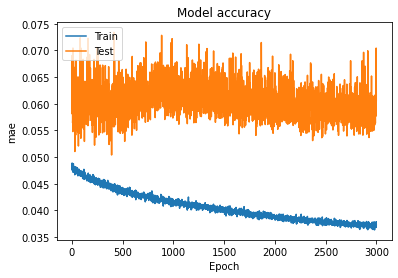

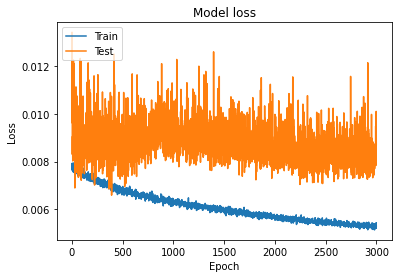

In [22]:

plot.plot(hist.history['mae'])
plot.plot(hist.history['val_mae'])
plot.title('Model accuracy')
plot.ylabel('mae')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(hist.history['loss'])
plot.plot(hist.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

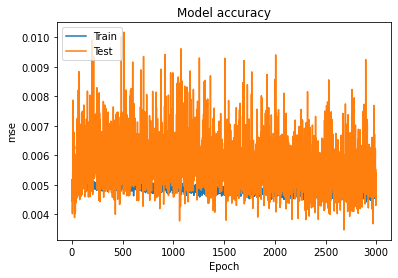

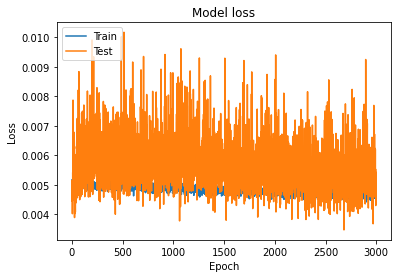

In [14]:
plot.plot(hist.history['mse'])
plot.plot(hist.history['val_mse'])
plot.title('Model accuracy')
plot.ylabel('mse')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(hist.history['loss'])
plot.plot(hist.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [22]:
eval_data = leerdato('dpruebasICC.txt')
resp_data = leerdato('rpruebas.txt')

In [23]:
# evaluamos el modelo
scores = model.evaluate(eval_data, resp_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(eval_data).round())

1846/1846 [==============================] - 4s 2ms/step - loss: 0.0043 - mse: 0.0043

mse: 0.43%
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [24]:
predictions = model.predict(eval_data)

In [25]:
for i in range(len(predictions)//10):
    for j in range(len(predictions[0])):
        print(round(((predictions[i][j]-resp_data[i][j])*100),2),end="%   ")
    print(" ")

-1.32%   0.7%   1.26%   2.09%   5.86%    
0.92%   0.15%   -1.56%   3.88%   31.33%    
0.75%   0.05%   -1.52%   3.91%   22.94%    
0.71%   0.03%   -1.51%   3.92%   13.33%    
-2.3%   0.19%   0.01%   2.33%   20.49%    
0.69%   0.02%   -1.51%   3.92%   -6.47%    
0.68%   0.02%   -1.51%   3.92%   -16.44%    
-2.31%   0.19%   -0.02%   2.35%   -9.36%    
0.68%   0.01%   -1.51%   3.92%   -36.41%    
2.97%   0.18%   -1.8%   -2.73%   1.95%    
1.17%   -0.26%   -1.68%   -2.82%   36.09%    
0.99%   -0.36%   -1.66%   -2.76%   27.97%    
0.94%   -0.38%   -1.66%   -2.74%   18.42%    
-1.52%   -0.33%   -0.13%   0.55%   18.09%    
-1.53%   -0.33%   -0.14%   0.56%   8.16%    
0.91%   -0.39%   -1.66%   -2.73%   -11.31%    
0.91%   -0.39%   -1.66%   -2.73%   -21.29%    
-1.53%   -0.33%   -0.16%   0.57%   -21.77%    
-0.4%   0.27%   2.07%   7.11%   6.9%    
1.77%   -0.76%   -1.76%   0.67%   25.85%    
1.63%   -0.84%   -1.73%   0.73%   17.25%    
1.6%   -0.86%   -1.73%   0.75%   7.58%    
-1.29%   -0.17%  

0.96%   0.33%   -0.92%   -1.37%   13.78%    
0.96%   0.32%   -0.92%   -1.37%   3.95%    
0.96%   0.32%   -0.93%   -1.37%   -5.97%    
0.95%   0.32%   -0.93%   -1.37%   -15.93%    
-1.23%   -0.6%   -0.52%   13.57%   -17.96%    
0.95%   0.32%   -0.93%   -1.37%   -35.9%    
0.03%   -0.45%   0.01%   3.32%   2.92%    
1.0%   0.39%   -0.78%   -7.35%   30.18%    
-1.18%   -0.6%   -0.31%   3.56%   31.61%    
0.9%   0.29%   -0.89%   -7.32%   13.74%    
0.9%   0.29%   -0.9%   -7.32%   3.91%    
-1.21%   -0.6%   -0.44%   3.64%   2.06%    
0.89%   0.28%   -0.9%   -7.32%   -15.98%    
-1.21%   -0.6%   -0.45%   3.65%   -17.9%    
0.89%   0.28%   -0.9%   -7.32%   -35.94%    
1.59%   0.64%   0.19%   -14.32%   0.84%    
0.96%   0.37%   -0.76%   -15.08%   30.16%    
-1.17%   -0.6%   -0.27%   -6.4%   31.65%    
-1.19%   -0.6%   -0.36%   -6.34%   21.94%    
0.86%   0.27%   -0.88%   -15.04%   3.89%    
-1.2%   -0.6%   -0.4%   -6.31%   2.1%    
-1.2%   -0.6%   -0.41%   -6.31%   -7.88%    
0.86%   0.26%   -0

-0.55%   0.05%   6.17%   4.41%   40.87%    
1.36%   0.69%   4.72%   -6.49%   22.71%    
-0.64%   0.04%   5.75%   4.7%   22.41%    
1.33%   0.66%   4.69%   -6.48%   3.38%    
1.33%   0.66%   4.69%   -6.48%   -6.55%    
-0.65%   0.04%   5.7%   4.74%   -7.41%    
-0.65%   0.04%   5.69%   4.74%   -17.4%    
-0.65%   0.04%   5.69%   4.74%   -27.39%    
0.45%   0.01%   6.27%   -5.9%   2.4%    
-0.54%   0.05%   6.2%   -5.55%   40.91%    
1.32%   0.67%   4.73%   -14.21%   22.69%    
1.3%   0.65%   4.71%   -14.2%   13.18%    
-0.64%   0.04%   5.74%   -5.23%   12.55%    
-0.64%   0.04%   5.73%   -5.22%   2.59%    
1.29%   0.64%   4.69%   -14.2%   -16.53%    
-0.64%   0.04%   5.72%   -5.21%   -17.37%    
-0.64%   0.04%   5.71%   -5.21%   -27.36%    
0.45%   0.0%   6.29%   -15.88%   2.41%    
-0.54%   0.05%   6.21%   -15.52%   40.93%    
-0.61%   0.04%   5.87%   -15.28%   32.16%    
-0.63%   0.04%   5.78%   -15.23%   22.46%    
1.28%   0.63%   4.7%   -22.82%   3.34%    
1.27%   0.63%   4.7%   -22.

-0.82%   -0.14%   -0.53%   -12.12%   14.88%    
-0.82%   -0.14%   -0.55%   -12.1%   4.95%    
-0.06%   -0.38%   -0.33%   -18.99%   -17.45%    
-0.83%   -0.14%   -0.56%   -12.09%   -15.0%    
-0.07%   -0.38%   -0.33%   -18.98%   -37.4%    
2.21%   1.44%   1.02%   -0.26%   -2.21%    
-0.25%   1.48%   -0.02%   -0.09%   40.51%    
0.4%   0.12%   0.79%   0.44%   17.41%    
0.36%   0.07%   0.78%   0.47%   8.16%    
-0.22%   1.31%   -0.76%   0.29%   15.51%    
0.34%   0.04%   0.78%   0.48%   -11.45%    
0.34%   0.04%   0.78%   0.48%   -21.39%    
-0.21%   1.3%   -0.82%   0.32%   -14.27%    
0.33%   0.04%   0.78%   0.49%   -41.34%    
0.74%   0.8%   -0.75%   -0.15%   -1.19%    
0.12%   -0.23%   0.55%   -0.1%   14.15%    
-0.21%   -0.17%   -0.58%   0.34%   20.53%    
-0.07%   -0.31%   0.5%   -0.01%   11.93%    
-0.21%   -0.19%   -0.74%   0.45%   1.12%    
-0.21%   -0.19%   -0.75%   0.46%   -8.81%    
-0.21%   -0.19%   -0.76%   0.47%   -18.78%    
-0.21%   -0.19%   -0.77%   0.47%   -28.76%    
-

0.24%   -0.34%   -2.73%   -0.72%   -36.66%    
0.68%   0.74%   2.52%   -2.43%   1.9%    
0.81%   -0.37%   -3.23%   -1.57%   14.24%    
-0.35%   0.61%   2.37%   -2.24%   34.91%    
-0.36%   0.59%   2.23%   -2.14%   25.37%    
0.6%   -0.45%   -3.31%   -1.47%   2.55%    
0.6%   -0.46%   -3.31%   -1.46%   -7.33%    
0.59%   -0.46%   -3.32%   -1.46%   -17.26%    
0.59%   -0.46%   -3.32%   -1.46%   -27.23%    
0.59%   -0.46%   -3.32%   -1.46%   -37.21%    
1.85%   -0.18%   -3.39%   0.08%   -1.1%    
1.09%   -0.34%   -3.84%   -0.66%   15.01%    
-0.8%   0.13%   1.76%   3.14%   33.92%    
0.89%   -0.42%   -3.91%   -0.57%   12.93%    
0.88%   -0.43%   -3.92%   -0.56%   3.2%    
-0.82%   0.12%   1.54%   3.29%   4.61%    
-0.82%   0.12%   1.53%   3.3%   -5.35%    
0.88%   -0.43%   -3.92%   -0.55%   -26.58%    
0.88%   -0.43%   -3.92%   -0.55%   -36.56%    
1.84%   -0.26%   -3.36%   -1.43%   -1.06%    
1.1%   -0.39%   -4.03%   -2.35%   15.08%    
0.93%   -0.44%   -4.1%   -2.3%   21.25%    
0.9%   

0.46%   -0.85%   -2.44%   -4.52%   -37.45%    
1.3%   -0.74%   -1.64%   -10.07%   -1.15%    
-1.0%   -0.44%   2.97%   -2.48%   41.05%    
0.46%   -0.86%   -2.39%   -11.22%   18.67%    
-1.08%   -0.51%   2.57%   -2.17%   23.95%    
0.42%   -0.88%   -2.41%   -11.2%   2.26%    
-1.08%   -0.51%   2.5%   -2.12%   4.18%    
0.41%   -0.89%   -2.42%   -11.2%   -17.55%    
0.41%   -0.89%   -2.42%   -11.2%   -27.52%    
0.41%   -0.89%   -2.42%   -11.2%   -37.5%    
1.27%   -0.76%   -1.63%   -18.04%   -1.13%    
-1.0%   -0.45%   2.99%   -12.45%   41.06%    
-1.06%   -0.51%   2.73%   -12.22%   33.5%    
0.4%   -0.9%   -2.39%   -19.2%   11.96%    
-1.08%   -0.52%   2.54%   -12.1%   14.12%    
-1.08%   -0.52%   2.52%   -12.09%   4.2%    
-1.08%   -0.52%   2.51%   -12.08%   -5.77%    
0.38%   -0.91%   -2.4%   -19.19%   -27.55%    
-1.08%   -0.52%   2.5%   -12.07%   -25.74%    
1.96%   1.42%   -7.94%   1.55%   -2.18%    
0.6%   0.89%   -8.13%   0.1%   16.66%    
-0.76%   1.19%   -4.48%   1.08%   34.68

0.95%   -1.87%   1.46%   16.87%   4.4%    
-1.16%   -2.29%   1.29%   16.12%   43.21%    
0.27%   -0.83%   -0.11%   -1.37%   15.52%    
-1.34%   -2.39%   0.77%   16.41%   26.05%    
-1.35%   -2.39%   0.72%   16.44%   16.22%    
-1.36%   -2.4%   0.69%   16.45%   6.3%    
0.23%   -0.88%   -0.11%   -1.34%   -23.62%    
-1.36%   -2.4%   0.67%   16.46%   -13.64%    
0.23%   -0.88%   -0.11%   -1.33%   -43.58%    
1.0%   -0.34%   -0.7%   -0.35%   0.47%    
0.23%   -0.87%   -0.13%   -1.06%   15.61%    
-1.29%   -2.46%   0.95%   15.62%   35.54%    
0.07%   -1.0%   -0.13%   -0.99%   6.73%    
0.06%   -1.01%   -0.13%   -0.98%   -3.08%    
-1.34%   -2.48%   0.73%   15.74%   6.26%    
-1.35%   -2.49%   0.71%   15.75%   -3.7%    
-1.35%   -2.49%   0.71%   15.75%   -13.68%    
0.05%   -1.02%   -0.13%   -0.97%   -42.91%    
0.92%   -0.43%   -0.71%   -5.06%   0.57%    
0.14%   -0.94%   -0.14%   -5.79%   16.1%    
0.0%   -1.04%   -0.14%   -5.74%   16.53%    
-1.31%   -2.5%   0.82%   5.79%   26.05%    
-1

-0.06%   -0.9%   0.39%   -11.16%   7.87%    
-0.75%   -0.13%   0.9%   -2.01%   13.69%    
-0.08%   -0.91%   0.38%   -11.15%   -10.13%    
-0.08%   -0.91%   0.38%   -11.15%   -19.81%    
-0.08%   -0.91%   0.38%   -11.15%   -29.64%    
-0.75%   -0.14%   0.9%   -2.0%   -26.1%    
0.1%   -0.26%   1.07%   -11.83%   0.52%    
-0.64%   -0.09%   0.96%   -12.12%   39.79%    
-0.05%   -0.9%   0.4%   -19.09%   14.04%    
-0.09%   -0.92%   0.39%   -19.09%   7.96%    
-0.11%   -0.93%   0.39%   -19.08%   -0.65%    
-0.11%   -0.93%   0.39%   -19.08%   -10.04%    
-0.74%   -0.14%   0.94%   -11.97%   -6.13%    
-0.75%   -0.14%   0.94%   -11.97%   -16.1%    
-0.75%   -0.14%   0.94%   -11.97%   -26.08%    
2.08%   -0.4%   -1.19%   2.13%   -1.0%    
0.34%   -0.69%   -0.88%   0.3%   13.85%    
-0.63%   -0.36%   0.34%   0.44%   34.56%    
0.02%   -0.82%   -0.97%   0.31%   14.71%    
-0.0%   -0.84%   -0.98%   0.32%   5.04%    
-0.01%   -0.84%   -0.98%   0.32%   -4.81%    
-0.61%   -0.4%   -0.03%   0.63%   -4

-0.72%   0.41%   5.01%   3.86%   24.52%    
-0.72%   0.41%   4.96%   3.89%   14.69%    
-0.72%   0.41%   4.93%   3.91%   4.77%    
-0.72%   0.41%   4.92%   3.92%   -5.2%    
0.35%   0.28%   0.89%   0.2%   -27.07%    
0.35%   0.28%   0.89%   0.2%   -37.05%    
1.47%   0.23%   1.82%   -1.5%   -1.19%    
0.59%   0.4%   1.11%   -2.42%   13.18%    
-0.85%   0.01%   5.36%   11.54%   33.1%    
-0.86%   -0.0%   5.23%   11.62%   23.59%    
0.39%   0.37%   1.01%   -2.43%   2.78%    
0.38%   0.36%   1.01%   -2.42%   -7.01%    
-0.87%   -0.0%   5.14%   11.68%   -6.13%    
0.38%   0.36%   1.01%   -2.42%   -26.92%    
0.38%   0.36%   1.01%   -2.42%   -36.89%    
-0.04%   -0.24%   5.71%   14.56%   -0.06%    
0.41%   0.24%   1.2%   -0.29%   13.37%    
-0.84%   -0.1%   5.5%   14.16%   33.03%    
-0.85%   -0.1%   5.37%   14.25%   23.52%    
0.22%   0.22%   1.1%   -0.32%   2.54%    
0.21%   0.21%   1.1%   -0.32%   -7.17%    
-0.86%   -0.11%   5.28%   14.3%   -6.21%    
-0.86%   -0.11%   5.27%   14.3%   -

1.08%   -0.0%   -12.67%   -2.85%   -1.1%    
0.21%   0.17%   -13.35%   -3.93%   13.51%    
0.1%   0.17%   -13.4%   -4.01%   16.46%    
0.06%   0.16%   -13.42%   -4.01%   10.31%    
0.04%   0.16%   -13.43%   -4.01%   1.68%    
0.03%   0.16%   -13.44%   -4.0%   -7.72%    
-0.97%   -0.15%   -10.99%   8.05%   -5.95%    
-0.97%   -0.15%   -11.0%   8.06%   -15.93%    
-0.97%   -0.15%   -11.0%   8.06%   -25.92%    
1.02%   -0.05%   -12.64%   -9.35%   -1.05%    
-0.86%   -0.11%   -10.66%   -2.17%   40.47%    
0.05%   0.13%   -13.37%   -10.56%   16.39%    
0.01%   0.12%   -13.4%   -10.55%   10.24%    
-0.95%   -0.16%   -10.92%   -1.91%   13.95%    
-0.96%   -0.16%   -10.94%   -1.9%   4.03%    
-0.02%   0.12%   -13.41%   -10.55%   -17.62%    
-0.96%   -0.17%   -10.96%   -1.89%   -15.92%    
-0.02%   0.11%   -13.41%   -10.55%   -37.57%    
0.99%   -0.08%   -12.62%   -17.24%   -1.02%    
0.13%   0.1%   -13.31%   -18.38%   13.59%    
0.02%   0.11%   -13.36%   -18.47%   16.39%    
-0.94%   -0.17%   

-0.64%   3.21%   -0.17%   0.26%   40.18%    
-0.63%   3.08%   -0.35%   0.36%   34.88%    
-0.38%   1.35%   -0.08%   0.56%   12.14%    
-0.4%   1.34%   -0.08%   0.57%   2.49%    
-0.41%   1.33%   -0.08%   0.58%   -7.35%    
-0.61%   3.04%   -0.73%   0.55%   -3.85%    
-0.41%   1.33%   -0.09%   0.58%   -27.22%    
-0.41%   1.33%   -0.09%   0.58%   -37.2%    
0.47%   1.64%   -1.02%   -0.25%   1.67%    
-0.35%   1.88%   -1.21%   -0.34%   39.94%    
-0.44%   1.83%   -1.24%   -0.2%   33.02%    
-0.46%   1.82%   -1.24%   -0.17%   23.76%    
-0.34%   -0.58%   0.11%   -0.42%   -2.32%    
-0.34%   -0.59%   0.11%   -0.41%   -11.67%    
-0.35%   -0.59%   0.1%   -0.41%   -21.33%    
-0.47%   1.82%   -1.25%   -0.15%   -15.77%    
-0.35%   -0.59%   0.1%   -0.41%   -41.03%    
0.93%   1.63%   0.01%   -1.51%   1.8%    
0.19%   1.81%   -0.09%   -1.12%   41.21%    
-0.08%   -0.43%   -0.07%   -2.17%   12.43%    
0.09%   1.76%   -0.11%   -0.92%   24.93%    
-0.13%   -0.44%   -0.08%   -2.16%   -2.46%    
-0

1.02%   -1.11%   -0.73%   0.05%   -0.6%    
0.06%   -0.95%   -1.14%   -0.62%   12.87%    
-0.06%   -0.95%   -1.18%   -0.66%   16.36%    
-0.1%   -0.96%   -1.2%   -0.65%   10.38%    
-0.11%   -0.96%   -1.2%   -0.64%   1.0%    
-0.12%   -0.97%   -1.2%   -0.63%   -8.87%    
-0.12%   -0.97%   -1.2%   -0.63%   -18.81%    
-0.56%   1.66%   4.84%   -0.01%   -15.26%    
-0.56%   1.66%   4.83%   -0.01%   -25.25%    
1.08%   -0.09%   1.04%   -0.55%   -1.11%    
0.18%   -0.01%   0.34%   -1.26%   10.71%    
0.01%   1.63%   5.36%   -0.34%   34.59%    
0.04%   -0.01%   0.27%   -1.32%   6.86%    
0.03%   -0.01%   0.27%   -1.33%   -2.03%    
-0.01%   1.61%   5.26%   -0.24%   5.52%    
-0.01%   1.61%   5.25%   -0.23%   -4.44%    
-0.01%   1.61%   5.24%   -0.22%   -14.42%    
0.02%   -0.01%   0.26%   -1.33%   -41.0%    
1.33%   0.33%   1.33%   1.27%   -1.11%    
0.44%   0.41%   0.62%   0.45%   11.93%    
-0.38%   1.27%   4.89%   3.66%   33.82%    
0.3%   0.41%   0.55%   0.38%   7.97%    
-0.4%   1.26%  

0.19%   1.44%   -11.06%   0.27%   1.31%    
-0.56%   1.7%   -11.31%   0.12%   40.86%    
-0.13%   -1.19%   -16.35%   -0.51%   16.76%    
-0.67%   1.65%   -11.35%   0.29%   24.66%    
-0.67%   1.64%   -11.38%   0.31%   14.87%    
-0.68%   1.64%   -11.4%   0.33%   4.95%    
-0.68%   1.64%   -11.41%   0.33%   -5.01%    
-0.19%   -1.21%   -16.37%   -0.49%   -29.01%    
-0.19%   -1.21%   -16.37%   -0.49%   -38.99%    
0.7%   1.47%   -10.66%   -0.42%   1.33%    
0.07%   -0.03%   -14.14%   -0.93%   10.75%    
-0.11%   1.61%   -10.82%   0.11%   34.96%    
-0.12%   1.6%   -10.89%   0.18%   25.56%    
-0.07%   -0.03%   -14.2%   -0.99%   -1.99%    
-0.13%   1.6%   -10.97%   0.24%   5.8%    
-0.08%   -0.03%   -14.21%   -1.0%   -21.25%    
-0.13%   1.59%   -10.98%   0.25%   -14.14%    
-0.13%   1.59%   -10.99%   0.25%   -24.13%    
0.3%   1.12%   -11.1%   3.61%   1.2%    
-0.42%   1.29%   -11.27%   3.94%   41.21%    
0.22%   0.39%   -13.81%   0.65%   14.88%    
-0.51%   1.25%   -11.43%   4.2%   24.

-0.29%   1.15%   -1.34%   -10.68%   13.52%    
-0.41%   1.11%   -1.36%   -10.75%   17.84%    
-0.41%   0.79%   -0.07%   -1.28%   23.07%    
-0.46%   1.09%   -1.37%   -10.73%   2.31%    
-0.46%   1.08%   -1.38%   -10.73%   -7.56%    
-0.46%   1.08%   -1.38%   -10.73%   -17.5%    
-0.47%   1.08%   -1.38%   -10.73%   -27.46%    
-0.47%   1.08%   -1.38%   -10.73%   -37.44%    
0.62%   0.47%   0.04%   -11.05%   2.45%    
-0.31%   0.81%   -0.03%   -11.37%   39.35%    
-0.39%   0.79%   -0.04%   -11.27%   32.36%    
-0.41%   0.78%   -0.04%   -11.24%   23.09%    
-0.42%   0.78%   -0.04%   -11.23%   13.34%    
-0.49%   1.05%   -1.37%   -18.65%   -7.59%    
-0.49%   1.05%   -1.37%   -18.64%   -17.52%    
-0.5%   1.05%   -1.37%   -18.64%   -27.48%    
-0.42%   0.78%   -0.04%   -11.23%   -26.43%    
1.47%   2.5%   -0.29%   2.84%   0.1%    
-0.26%   2.27%   -0.15%   0.66%   10.17%    
-0.48%   2.21%   -0.22%   0.59%   17.71%    
-0.54%   2.19%   -0.24%   0.6%   12.32%    
-0.71%   1.36%   -0.17%   0

0.12%   1.63%   -3.24%   -0.23%   8.26%    
-0.35%   0.83%   0.68%   12.97%   13.19%    
0.11%   1.63%   -3.25%   -0.24%   -10.15%    
0.11%   1.63%   -3.25%   -0.25%   -19.9%    
0.11%   1.63%   -3.25%   -0.25%   -29.77%    
0.11%   1.63%   -3.25%   -0.25%   -39.68%    
1.07%   1.64%   -2.81%   -2.75%   -0.35%    
0.17%   1.59%   -3.12%   -3.89%   12.32%    
-0.32%   0.79%   0.81%   8.59%   32.29%    
0.03%   1.57%   -3.15%   -4.0%   8.34%    
0.02%   1.56%   -3.16%   -4.0%   -0.56%    
0.02%   1.56%   -3.16%   -4.01%   -10.08%    
0.01%   1.56%   -3.16%   -4.01%   -19.83%    
-0.34%   0.78%   0.71%   8.67%   -16.7%    
0.01%   1.56%   -3.16%   -4.01%   -39.61%    
0.51%   0.42%   1.14%   -1.05%   0.85%    
0.12%   1.55%   -3.07%   -10.38%   12.37%    
-0.31%   0.78%   0.85%   -1.35%   32.3%    
-0.33%   0.77%   0.85%   -1.33%   23.01%    
-0.33%   0.77%   0.8%   -1.29%   13.18%    
-0.33%   0.77%   0.77%   -1.28%   3.26%    
-0.33%   0.77%   0.76%   -1.27%   -6.71%    
-0.34%   0.77%

-0.07%   1.52%   -6.58%   0.11%   15.14%    
-0.57%   0.82%   -3.6%   13.58%   23.5%    
-0.57%   0.82%   -3.65%   13.62%   13.67%    
-0.58%   0.82%   -3.67%   13.63%   3.75%    
-0.58%   0.82%   -3.68%   13.64%   -6.22%    
-0.58%   0.82%   -3.69%   13.64%   -16.2%    
-0.58%   0.82%   -3.7%   13.64%   -26.18%    
0.82%   1.5%   -5.78%   -2.45%   -0.71%    
-0.46%   0.8%   -3.41%   8.42%   39.97%    
-0.55%   0.78%   -3.43%   8.52%   32.93%    
-0.56%   0.77%   -3.53%   8.59%   23.48%    
-0.57%   0.77%   -3.58%   8.63%   13.65%    
-0.2%   1.45%   -6.55%   -3.68%   -10.1%    
-0.2%   1.45%   -6.55%   -3.68%   -19.86%    
-0.2%   1.45%   -6.55%   -3.68%   -29.72%    
-0.57%   0.77%   -3.62%   8.66%   -26.21%    
0.29%   0.41%   -3.19%   -1.12%   0.84%    
-0.46%   0.79%   -3.37%   -1.53%   39.99%    
-0.21%   1.42%   -6.5%   -10.15%   15.26%    
-0.55%   0.76%   -3.49%   -1.35%   23.5%    
-0.56%   0.76%   -3.54%   -1.32%   13.66%    
-0.56%   0.76%   -3.56%   -1.3%   3.74%    
-0.25

0.12%   3.63%   0.11%   -0.64%   -24.1%    
1.03%   3.85%   -0.29%   0.38%   0.17%    
-0.15%   3.47%   0.3%   2.57%   41.03%    
-0.23%   3.42%   0.29%   2.72%   34.02%    
-0.01%   3.74%   -0.49%   -0.49%   7.94%    
-0.02%   3.73%   -0.5%   -0.49%   -0.66%    
-0.03%   3.73%   -0.5%   -0.49%   -10.02%    
-0.26%   3.41%   0.28%   2.79%   -4.84%    
-0.26%   3.41%   0.27%   2.79%   -14.82%    
-0.26%   3.41%   0.27%   2.79%   -24.81%    
1.05%   3.79%   -0.3%   -1.93%   0.3%    
0.14%   3.74%   -0.49%   -2.84%   11.37%    
-0.4%   3.0%   0.77%   10.21%   33.02%    
0.01%   3.7%   -0.51%   -2.92%   8.21%    
-0.43%   2.98%   0.76%   10.24%   13.99%    
-0.01%   3.69%   -0.51%   -2.91%   -9.79%    
-0.43%   2.98%   0.74%   10.26%   -5.88%    
-0.01%   3.69%   -0.52%   -2.91%   -29.29%    
-0.43%   2.98%   0.73%   10.27%   -25.85%    
0.86%   3.57%   -0.27%   0.43%   0.51%    
-0.04%   3.53%   -0.46%   -0.6%   11.5%    
-0.39%   2.9%   1.01%   12.99%   32.96%    
-0.17%   3.49%   -0.48%

-0.4%   2.73%   0.45%   12.92%   -26.38%    
1.03%   3.53%   -2.8%   -2.55%   -0.15%    
-0.29%   2.75%   0.76%   8.57%   39.79%    
-0.37%   2.7%   0.74%   8.68%   32.75%    
-0.39%   2.69%   0.62%   8.76%   23.27%    
-0.39%   2.69%   0.57%   8.79%   13.44%    
-0.02%   3.44%   -3.15%   -3.81%   -10.05%    
-0.39%   2.69%   0.53%   8.82%   -6.45%    
-0.4%   2.69%   0.53%   8.82%   -16.43%    
-0.03%   3.44%   -3.15%   -3.81%   -39.58%    
0.98%   3.48%   -2.75%   -9.01%   -0.1%    
-0.28%   2.74%   0.81%   -1.37%   39.81%    
-0.04%   3.4%   -3.09%   -10.27%   15.3%    
-0.38%   2.69%   0.66%   -1.18%   23.29%    
-0.38%   2.68%   0.61%   -1.15%   13.46%    
-0.38%   2.68%   0.59%   -1.13%   3.53%    
-0.39%   2.68%   0.58%   -1.13%   -6.43%    
-0.08%   3.4%   -3.1%   -10.31%   -29.63%    
-0.39%   2.68%   0.57%   -1.12%   -26.4%    
0.94%   3.45%   -2.72%   -16.86%   -0.07%    
-0.28%   2.74%   0.83%   -11.33%   39.82%    
-0.07%   3.37%   -3.06%   -18.15%   15.33%    
-0.09%   3.

-0.29%   3.13%   -6.63%   -9.98%   -19.8%    
-0.61%   2.64%   -3.72%   -1.14%   -15.93%    
-0.29%   3.13%   -6.63%   -9.98%   -39.58%    
0.7%   3.16%   -5.84%   -16.56%   -0.43%    
-0.51%   2.69%   -3.38%   -11.4%   40.46%    
-0.58%   2.65%   -3.46%   -11.27%   33.3%    
-0.31%   3.1%   -6.6%   -17.85%   8.39%    
-0.32%   3.1%   -6.61%   -17.86%   -0.51%    
-0.61%   2.64%   -3.68%   -11.12%   4.02%    
-0.61%   2.63%   -3.69%   -11.11%   -5.94%    
-0.61%   2.63%   -3.7%   -11.11%   -15.92%    
-0.33%   3.1%   -6.61%   -17.86%   -39.56%    
1.23%   5.5%   -16.7%   3.02%   -0.41%    
-1.44%   4.84%   -11.23%   1.26%   40.95%    
-0.33%   5.45%   -16.09%   0.51%   21.42%    
-1.41%   4.68%   -11.88%   1.6%   26.1%    
-1.41%   4.67%   -11.97%   1.64%   16.38%    
-0.4%   5.41%   -16.11%   0.54%   -5.97%    
-1.41%   4.67%   -12.03%   1.67%   -3.42%    
-0.41%   5.4%   -16.11%   0.54%   -25.85%    
-0.41%   5.4%   -16.11%   0.55%   -35.82%    
0.29%   3.22%   -11.12%   -0.07%   1.8

-0.26%   3.94%   -0.55%   -1.81%   -1.37%    
0.12%   3.5%   0.13%   -0.62%   6.13%    
0.12%   3.5%   0.11%   -0.62%   -3.83%    
0.11%   3.5%   0.11%   -0.61%   -13.81%    
-0.27%   3.94%   -0.55%   -1.81%   -40.36%    
1.04%   4.06%   -0.43%   0.52%   0.35%    
0.14%   4.08%   -0.61%   -0.27%   11.4%    
0.03%   4.05%   -0.63%   -0.33%   15.02%    
0.01%   4.05%   -0.64%   -0.35%   8.28%    
-0.0%   4.05%   -0.64%   -0.35%   -0.56%    
-0.01%   4.05%   -0.64%   -0.35%   -9.95%    
-0.01%   4.04%   -0.64%   -0.35%   -19.62%    
-0.01%   4.04%   -0.64%   -0.35%   -29.44%    
-0.01%   4.04%   -0.64%   -0.35%   -39.33%    
0.43%   2.96%   1.0%   10.29%   2.13%    
-0.32%   2.9%   0.88%   10.04%   40.5%    
-0.41%   2.84%   0.87%   10.13%   33.48%    
-0.42%   2.83%   0.76%   10.21%   24.02%    
-0.42%   2.83%   0.71%   10.24%   14.18%    
0.01%   4.01%   -0.66%   -2.8%   -9.72%    
0.01%   4.01%   -0.66%   -2.79%   -19.4%    
0.01%   4.01%   -0.66%   -2.79%   -29.22%    
0.01%   4.01%  

0.41%   3.3%   5.1%   -0.42%   1.99%    
-0.37%   3.37%   4.84%   -0.61%   41.3%    
-0.46%   3.31%   4.79%   -0.47%   34.37%    
-0.24%   2.57%   -2.27%   -0.81%   10.0%    
-0.25%   2.56%   -2.27%   -0.81%   1.17%    
-0.26%   2.56%   -2.27%   -0.81%   -8.49%    
-0.49%   3.29%   4.55%   -0.3%   -4.85%    
-0.26%   2.56%   -2.28%   -0.8%   -28.39%    
-0.26%   2.56%   -2.28%   -0.8%   -38.36%    
0.86%   3.49%   5.33%   -0.62%   2.76%    
0.11%   3.48%   5.14%   -0.26%   42.48%    
0.03%   3.42%   5.02%   -0.05%   35.3%    
-0.12%   3.46%   -0.18%   -0.77%   7.46%    
-0.13%   3.46%   -0.18%   -0.78%   -1.38%    
-0.13%   3.46%   -0.18%   -0.78%   -10.86%    
0.01%   3.4%   4.78%   0.12%   -3.93%    
-0.14%   3.46%   -0.19%   -0.78%   -30.46%    
-0.14%   3.46%   -0.19%   -0.78%   -40.37%    
1.16%   3.85%   0.89%   1.9%   -0.5%    
-0.26%   3.24%   4.69%   2.98%   41.77%    
-0.33%   3.19%   4.49%   3.22%   34.46%    
0.12%   3.89%   0.11%   0.99%   7.89%    
-0.35%   3.17%   4.3%  

-0.64%   2.56%   -11.38%   8.9%   14.14%    
-0.64%   2.56%   -11.4%   8.92%   4.22%    
-0.64%   2.56%   -11.41%   8.92%   -5.74%    
-0.24%   3.59%   -13.8%   -3.28%   -29.61%    
-0.24%   3.59%   -13.8%   -3.28%   -39.53%    
0.73%   3.5%   -13.01%   -8.5%   -0.31%    
-0.54%   2.62%   -10.88%   -1.4%   40.97%    
-0.61%   2.57%   -11.14%   -1.17%   33.52%    
-0.62%   2.56%   -11.29%   -1.08%   23.99%    
-0.63%   2.55%   -11.34%   -1.04%   14.16%    
-0.29%   3.55%   -13.77%   -9.77%   -9.96%    
-0.29%   3.55%   -13.77%   -9.77%   -19.71%    
-0.63%   2.55%   -11.38%   -1.02%   -15.71%    
-0.63%   2.55%   -11.38%   -1.01%   -25.69%    
0.7%   3.47%   -13.0%   -16.35%   -0.28%    
-0.53%   2.62%   -10.86%   -11.36%   40.98%    
-0.6%   2.56%   -11.12%   -11.14%   33.53%    
-0.62%   2.55%   -11.26%   -11.04%   24.0%    
-0.62%   2.55%   -11.31%   -11.01%   14.17%    
-0.62%   2.55%   -11.33%   -10.99%   4.24%    
-0.62%   2.55%   -11.35%   -10.98%   -5.72%    
-0.33%   3.52%   -1

-0.39%   -0.44%   -1.75%   -18.28%   18.57%    
-0.44%   -2.22%   -0.36%   -10.95%   23.9%    
-0.44%   -2.23%   -0.41%   -10.91%   14.08%    
-0.45%   -2.23%   -0.43%   -10.9%   4.15%    
-0.45%   -2.23%   -0.44%   -10.89%   -5.81%    
-0.45%   -2.23%   -0.45%   -10.89%   -15.79%    
-0.45%   -0.47%   -1.76%   -18.26%   -36.81%    
-1.12%   -0.79%   0.68%   1.53%   2.82%    
-0.84%   -1.26%   0.72%   0.41%   41.35%    
-0.82%   -1.4%   0.24%   0.67%   35.57%    
-0.81%   -1.43%   -0.0%   0.79%   26.38%    
-0.49%   0.82%   -0.63%   0.93%   3.09%    
-0.8%   -1.44%   -0.12%   0.85%   6.79%    
-0.8%   -1.44%   -0.14%   0.86%   -3.14%    
-0.5%   0.81%   -0.63%   0.94%   -26.63%    
-0.8%   -1.45%   -0.16%   0.87%   -23.09%    
0.59%   -1.68%   -0.49%   -0.63%   2.44%    
-0.27%   -1.58%   -0.63%   -0.76%   41.04%    
-0.36%   -1.64%   -0.65%   -0.63%   34.13%    
-0.47%   -0.45%   -0.49%   -0.27%   8.84%    
-0.48%   -0.45%   -0.49%   -0.27%   0.06%    
-0.39%   -1.66%   -0.71%   -0.56

-0.36%   -1.72%   0.19%   -0.62%   -25.05%    
1.08%   -0.59%   -4.4%   -0.11%   -0.18%    
0.24%   -1.5%   0.8%   -0.76%   42.31%    
0.07%   -0.72%   -4.69%   -0.9%   14.66%    
0.15%   -1.56%   0.49%   -0.42%   25.55%    
0.03%   -0.73%   -4.68%   -0.91%   -0.9%    
0.14%   -1.57%   0.41%   -0.36%   5.79%    
0.03%   -0.73%   -4.67%   -0.92%   -20.13%    
0.14%   -1.57%   0.39%   -0.35%   -14.15%    
0.03%   -0.73%   -4.67%   -0.92%   -39.89%    
1.32%   -0.19%   -3.5%   1.78%   -0.18%    
0.41%   -0.24%   -3.79%   0.94%   11.82%    
-0.2%   -1.78%   0.1%   2.69%   34.23%    
-0.22%   -1.79%   -0.04%   2.8%   24.71%    
0.26%   -0.26%   -3.82%   0.86%   -0.84%    
-0.22%   -1.79%   -0.12%   2.85%   4.95%    
0.26%   -0.27%   -3.82%   0.85%   -20.07%    
0.25%   -0.27%   -3.82%   0.85%   -29.92%    
0.25%   -0.27%   -3.82%   0.85%   -39.84%    
0.44%   -2.17%   0.86%   10.02%   1.72%    
-0.31%   -2.17%   0.6%   9.77%   40.56%    
0.32%   -0.16%   -3.49%   -2.07%   15.17%    
0.29%  

-0.15%   -0.6%   -1.75%   -3.25%   15.36%    
-0.57%   -2.39%   2.05%   8.95%   23.91%    
-0.19%   -0.61%   -1.76%   -3.28%   -0.44%    
-0.19%   -0.61%   -1.77%   -3.28%   -9.96%    
-0.57%   -2.4%   1.96%   9.0%   -5.81%    
-0.57%   -2.4%   1.96%   9.01%   -15.79%    
-0.58%   -2.4%   1.95%   9.01%   -25.78%    
0.27%   -2.33%   2.77%   -0.94%   1.82%    
-0.48%   -2.34%   2.57%   -1.36%   41.03%    
-0.2%   -0.64%   -1.72%   -9.74%   15.4%    
-0.23%   -0.65%   -1.73%   -9.76%   8.5%    
-0.56%   -2.4%   2.04%   -0.96%   14.09%    
-0.56%   -2.4%   2.02%   -0.95%   4.17%    
-0.57%   -2.4%   2.01%   -0.94%   -5.79%    
-0.25%   -0.65%   -1.74%   -9.78%   -29.53%    
-0.25%   -0.65%   -1.74%   -9.78%   -39.45%    
0.75%   -0.67%   -0.95%   -16.35%   -0.13%    
-0.47%   -2.34%   2.6%   -11.32%   41.04%    
-0.54%   -2.39%   2.26%   -11.06%   33.46%    
-0.55%   -2.4%   2.12%   -10.96%   23.93%    
-0.27%   -0.68%   -1.72%   -17.65%   -0.38%    
-0.56%   -2.41%   2.04%   -10.91%   4.

-0.2%   -9.7%   -0.64%   -1.77%   11.13%    
-0.32%   -9.71%   -0.64%   -1.84%   13.43%    
-1.09%   -9.66%   0.47%   -0.06%   24.99%    
-1.09%   -9.67%   0.4%   -0.03%   15.16%    
-1.1%   -9.67%   0.36%   -0.01%   5.24%    
-0.38%   -9.72%   -0.65%   -1.83%   -20.91%    
-0.39%   -9.72%   -0.65%   -1.83%   -30.75%    
-0.39%   -9.72%   -0.65%   -1.83%   -40.65%    
0.7%   -9.59%   -1.54%   -0.05%   0.71%    
-0.2%   -9.53%   -0.93%   -0.88%   15.0%    
0.37%   -9.72%   1.3%   -2.94%   35.25%    
0.35%   -9.75%   1.15%   -2.85%   25.74%    
0.35%   -9.76%   1.1%   -2.82%   15.91%    
-0.41%   -9.57%   -0.96%   -0.85%   -6.94%    
-0.41%   -9.57%   -0.96%   -0.85%   -16.89%    
-0.41%   -9.57%   -0.96%   -0.85%   -26.85%    
0.34%   -9.76%   1.05%   -2.79%   -23.94%    
0.31%   -9.36%   1.56%   3.69%   6.31%    
-0.67%   -9.9%   1.29%   3.01%   41.45%    
-0.76%   -10.01%   1.08%   3.16%   34.18%    
-0.77%   -10.03%   0.93%   3.25%   24.67%    
-0.27%   -9.47%   -1.22%   -0.97%   4.2

In [42]:
print(len(predictions)//5521)

10


In [66]:
data=[]
for i in range(len(predictions)):
    if(i%5521==0):
        fila1=[]
        for j in range(len(predictions[0])):
            print( round(predictions[i][j],1),end="%   ")
            fila1.append(round(predictions[i][j],1))
        print(" ")
        
        fila2=[]
        for j in range(len(predictions[0])):
            print(resp_data[i][j],end="%   ")
            fila2.append(resp_data[i][j])
        print(" ")
        print(" ")
        data.append([fila1,fila2])

0.1%   0.1%   0.1%   0.1%   0.2%    
0.1%   0.1%   0.1%   0.1%   0.1%    
 
0.1%   0.8%   0.6%   0.2%   0.7%    
0.1%   0.8%   0.6%   0.2%   0.5%    
 
0.2%   0.7%   0.2%   0.3%   0.6%    
0.2%   0.7%   0.2%   0.3%   0.9%    
 
0.3%   0.5%   0.7%   0.5%   0.4%    
0.3%   0.5%   0.7%   0.5%   0.4%    
 
0.4%   0.4%   0.3%   0.6%   0.8%    
0.4%   0.4%   0.3%   0.6%   0.8%    
 
0.5%   0.2%   0.8%   0.8%   0.3%    
0.5%   0.2%   0.8%   0.8%   0.3%    
 
0.7%   0.1%   0.4%   0.8%   0.6%    
0.6%   0.1%   0.4%   0.9%   0.7%    
 
0.7%   0.9%   0.1%   0.2%   0.2%    
0.6%   0.9%   0.1%   0.2%   0.2%    
 
0.7%   0.7%   0.6%   0.3%   0.6%    
0.7%   0.7%   0.6%   0.3%   0.6%    
 
0.7%   0.6%   0.2%   0.5%   0.1%    
0.8%   0.6%   0.2%   0.5%   0.1%    
 
0.9%   0.4%   0.7%   0.6%   0.5%    
0.9%   0.4%   0.7%   0.6%   0.5%    
 


In [67]:
for i in data:
    print(i)

[[0.1, 0.1, 0.1, 0.1, 0.2], [0.1, 0.1, 0.1, 0.1, 0.1]]
[[0.1, 0.8, 0.6, 0.2, 0.7], [0.1, 0.8, 0.6, 0.2, 0.5]]
[[0.2, 0.7, 0.2, 0.3, 0.6], [0.2, 0.7, 0.2, 0.3, 0.9]]
[[0.3, 0.5, 0.7, 0.5, 0.4], [0.3, 0.5, 0.7, 0.5, 0.4]]
[[0.4, 0.4, 0.3, 0.6, 0.8], [0.4, 0.4, 0.3, 0.6, 0.8]]
[[0.5, 0.2, 0.8, 0.8, 0.3], [0.5, 0.2, 0.8, 0.8, 0.3]]
[[0.7, 0.1, 0.4, 0.8, 0.6], [0.6, 0.1, 0.4, 0.9, 0.7]]
[[0.7, 0.9, 0.1, 0.2, 0.2], [0.6, 0.9, 0.1, 0.2, 0.2]]
[[0.7, 0.7, 0.6, 0.3, 0.6], [0.7, 0.7, 0.6, 0.3, 0.6]]
[[0.7, 0.6, 0.2, 0.5, 0.1], [0.8, 0.6, 0.2, 0.5, 0.1]]
[[0.9, 0.4, 0.7, 0.6, 0.5], [0.9, 0.4, 0.7, 0.6, 0.5]]


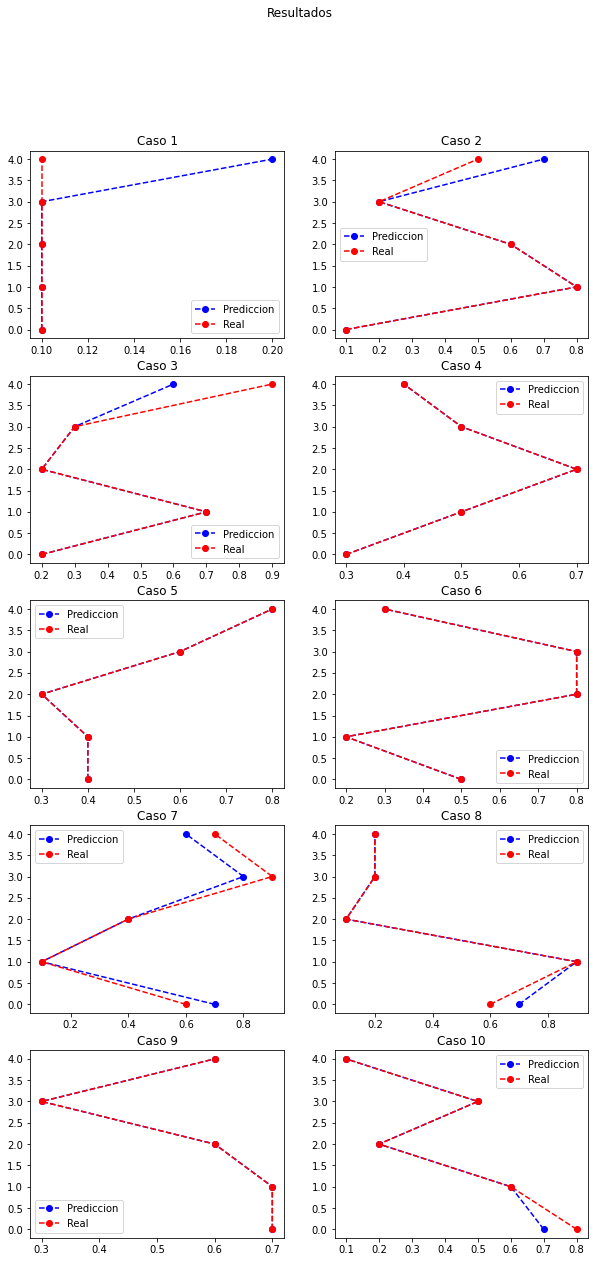

In [70]:
# Crea múltiples subgrafos
fig, ax = plot.subplots(nrows=5, ncols=2, figsize=(10,20))

index=0
for i in range(5):
    for j in range(2):
        # Dibujar gráficos
        ax[i, j].plot(data[index][0],[0,1,2,3,4], linestyle='--', marker='o', color='b', label='Prediccion') 
        ax[i, j].set_title("Caso "+str(index+1)) 
        ax[i, j].plot(data[index][1],[0,1,2,3,4], linestyle='--', marker='o', color='r', label='Real') 
        index=index+1
        ax[i, j].legend()

# Establecer título
plot.suptitle("Resultados")

# Mostrar
plot.show()

# 2. Dataset ABS

In [72]:
training_data = leerdato('datasetICC-ABS.txt')
target_data = leerdato('respICC.txt')

# Preparacion

In [73]:
junto=[]
for i in range(len(training_data)):
    junto.append(training_data[i]+target_data[i])

In [74]:
tf.random.shuffle(junto)

<tf.Tensor: shape=(59049, 11), dtype=float32, numpy=
array([[1.0745968e+01, 0.0000000e+00, 1.5517884e+00, ..., 6.0000002e-01,
        8.9999998e-01, 6.0000002e-01],
       [4.3548584e+00, 0.0000000e+00, 7.6643449e-01, ..., 3.0000001e-01,
        6.9999999e-01, 8.0000001e-01],
       [3.2297417e+01, 0.0000000e+00, 9.0885764e-01, ..., 6.0000002e-01,
        4.0000001e-01, 1.0000000e-01],
       ...,
       [2.6017725e+01, 0.0000000e+00, 1.2085791e+00, ..., 8.0000001e-01,
        4.0000001e-01, 5.0000000e-01],
       [2.1951651e+01, 0.0000000e+00, 9.1038495e-01, ..., 1.0000000e-01,
        5.0000000e-01, 4.0000001e-01],
       [3.5666195e+01, 0.0000000e+00, 7.3128501e-03, ..., 1.0000000e-01,
        3.0000001e-01, 1.0000000e-01]], dtype=float32)>

In [75]:
n=len(training_data[0])
na=len(junto[0])
#print(n)
#print(na)
junto=np.array(junto)
s_training_data = (junto[:,0:n]).tolist()
s_target_data = (junto[:,n:na]).tolist()

In [76]:
def create_model():
    model = Sequential()
    model.add(Dense(75, input_dim=len(s_training_data[0]), activation='relu'))
    model.add(Dense(150, input_dim=100, activation='relu'))
    model.add(Dense(75, input_dim=100, activation='relu'))
    model.add(Dense(len(s_target_data[0]), activation='linear', name="salida"))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
    model.summary()
    
    return model

def create_model2():
    model = Sequential()
    model.add(Dense(75, input_dim=len(s_training_data[0]), activation='relu'))
    model.add(Dense(150, input_dim=100, activation='relu'))
    model.add(Dense(75, input_dim=100, activation='relu'))
    model.add(Dense(len(s_target_data[0]), activation='linear', name="salida"))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
    model.summary()

    return model

def create_model3():
    model = Sequential()
    model.add(Dense(75, input_dim=len(s_training_data[0]), activation='relu'))
    model.add(Dense(100, input_dim=75, activation='relu'))    
    model.add(Dense(150, input_dim=100, activation='relu'))
    model.add(Dense(100, input_dim=150, activation='relu'))
    model.add(Dense(75, input_dim=100, activation='relu'))
    model.add(Dense(len(s_target_data[0]), activation='linear', name="salida"))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
    model.summary()
    
    return model

def create_model4():
    model = Sequential()
    model.add(Dense(100, input_dim=len(s_training_data[0]), activation='relu'))
    model.add(Dense(150, input_dim=100, activation='relu'))    
    model.add(Dense(150, input_dim=150, activation='relu'))
    model.add(Dense(100, input_dim=150, activation='relu'))
    model.add(Dense(75, input_dim=100, activation='relu'))
    model.add(Dense(len(s_target_data[0]), activation='linear', name="salida"))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
    model.summary()
    
    return model

In [77]:
model=create_model3()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 75)                525       
_________________________________________________________________
dense_9 (Dense)              (None, 100)               7600      
_________________________________________________________________
dense_10 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_12 (Dense)             (None, 75)                7575      
_________________________________________________________________
salida (Dense)               (None, 5)                 380       
Total params: 46,330
Trainable params: 46,330
Non-trainable params: 0
__________________________________________________

In [78]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

# Cargado de Datos

In [79]:
checkpoint_path = "training_1/cp.ckpt"
model.load_weights(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

# Continua Entrenando

In [28]:
hist=model.fit(np.array(s_training_data),np.array(s_target_data), epochs=3000, validation_split=0.2,callbacks=[cp_callback])

Epoch 1/3000
1457/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00001: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00002: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 3/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00003: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4/3000
1424/1477 [===========================>..] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00004: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - 

1477/1477 [==============================] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00060: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 61/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00061: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 62/3000
1434/1477 [============================>.] - ETA: 0s - loss: 0.0034 - mse: 0.0034
Epoch 00062: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 63/3000
1441/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00063: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.00

Epoch 91/3000
1433/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00091: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 92/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 00092: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 93/3000
1425/1477 [===========================>..] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00093: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 94/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00094: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/ste

Epoch 122/3000
1423/1477 [===========================>..] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00122: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 123/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00123: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 124/3000
1422/1477 [===========================>..] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00124: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 125/3000
1432/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00125: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms

Epoch 153/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0034 - mse: 0.0034
Epoch 00153: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 154/3000
1426/1477 [===========================>..] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00154: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 155/3000
1427/1477 [===========================>..] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00155: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 156/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00156: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms

1477/1477 [==============================] - 2s 1ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 184/3000
1437/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00184: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 185/3000
1453/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00185: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 186/3000
1432/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00186: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 187/3000
1441/1477 [============================>.] - ETA: 0s - los

Epoch 214/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00214: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 215/3000
1437/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00215: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 216/3000
1430/1477 [============================>.] - ETA: 0s - loss: 0.0034 - mse: 0.0034
Epoch 00216: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 217/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00217: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms

Epoch 275/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00275: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 276/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0035 - mse: 0.0035
Epoch 00276: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 277/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00277: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 278/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00278: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms

Epoch 305/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00305: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 306/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00306: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 307/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00307: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 308/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0034 - mse: 0.0034
Epoch 00308: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms

Epoch 336/3000
1436/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00336: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 337/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00337: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 338/3000
1449/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00338: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 339/3000
1441/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00339: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms

Epoch 397/3000
1440/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00397: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 398/3000
1445/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00398: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 399/3000
1446/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00399: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 400/3000
1441/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00400: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms

1428/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00457: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 458/3000
1432/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00458: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 459/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00459: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 460/3000
1432/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00460: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0

1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 488/3000
1446/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 00488: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 489/3000
1449/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00489: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 490/3000
1438/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00490: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 491/3000
1437/1477 [============================>.] - ETA: 0s - los

Epoch 518/3000
1437/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00518: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 519/3000
1446/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00519: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 520/3000
1435/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00520: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 521/3000
1453/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00521: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms

Epoch 578/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0034 - mse: 0.0034
Epoch 00578: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 579/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032- ETA: 0s - loss: 0.0032 - mse: 
Epoch 00579: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 580/3000
1430/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033- ETA: 0s - loss: 0.0034 - - ETA: 0s - loss: 0.0033 - mse: 0
Epoch 00580: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 581/3000
1437/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 0

1455/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00638: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 639/3000
1440/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032- ETA: 1s - loss
Epoch 00639: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 640/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00640: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 641/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032- ETA: 0s - loss: 0.0032 - mse:
Epoch 00641: saving model to training_1\cp.ckpt
1477/1477 [========

Epoch 668/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00668: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 669/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032- ETA: 1s - l
Epoch 00669: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 670/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00670: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 671/3000
1455/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00671: saving model to training_1\cp.ckpt
1477/1477 [===========================

Epoch 698/3000
1437/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00698: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 699/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00699: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 700/3000
1437/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032- ETA: 1s - l
Epoch 00700: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 701/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00701: saving model to training_1\cp.ckpt
1477/1477 [===========================

Epoch 728/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 00728: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 729/3000
1439/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00729: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 730/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033- ETA: 0s - loss: 
Epoch 00730: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 731/3000
1454/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00731: saving model to training_1\cp.ckpt
1477/1477 [======================

Epoch 758/3000
1432/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00758: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 759/3000
1438/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00759: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 760/3000
1453/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031- ETA: 1s - lo
Epoch 00760: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 761/3000
1431/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032- ETA: 0s - loss: 0.0032 
Epoch 00761: saving model to training_1\cp.ckpt
1477/1477 [=

1452/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00818: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 819/3000
1445/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00819: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 820/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 00820: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 821/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 00821: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0

Epoch 878/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00878: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 879/3000
1441/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031- ETA: 0s - loss: 0.0031 - mse: 0.003
Epoch 00879: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 880/3000
1428/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 00880: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 881/3000
1439/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00881: saving model to training_1\cp.ckpt
1477/1477 [===

1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 908/3000
1430/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00908: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 909/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00909: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 910/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00910: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 911/3000
1459/1477 [============================>.] - ETA: 0s - los

Epoch 938/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00938: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 939/3000
1457/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 00939: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 940/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00940: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 941/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00941: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms

1447/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 00968: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 969/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 00969: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 970/3000
1435/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 00970: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 971/3000
1426/1477 [===========================>..] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 00971: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0

1445/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031- ETA: 0s - loss: 0.0031 - mse: 0.003
Epoch 01028: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 1029/3000
1441/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 01029: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 1030/3000
1453/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 01030: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1031/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 01031: saving model to training_1\cp.ckpt
1477/1477 [===============

Epoch 1058/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01058: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 1059/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.003 - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 01059: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1060/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 01060: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 1061/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01061: saving model to training_1\cp.ckpt
1477/1477

1438/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033- ETA: 1s -
Epoch 01088: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 1089/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0036 - mse: 0.0036
Epoch 01089: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1090/3000
1436/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01090: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1091/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01091: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/

Epoch 1118/3000
1437/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 01118: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1119/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031- ETA: 1s - loss: 0.0032 - mse: 0.0 - ETA: 1s - loss: 0.0031 - mse: 0 - ETA: 0s - loss: 
Epoch 01119: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1120/3000
1445/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01120: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1121/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0035 - mse: 0.0035
Epoch 0

Epoch 1148/3000
1454/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 01148: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 1149/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01149: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 1150/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 01150: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 1151/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01151: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 1178/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 01178: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1179/3000
1457/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01179: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1180/3000
1450/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01180: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1181/3000
1431/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01181: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 1208/3000
1455/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01208: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 1209/3000
1446/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 01209: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1210/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 01210: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 1211/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01211: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 1238/3000
1450/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 01238: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1239/3000
1441/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 01239: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1240/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01240: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 1241/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0035 - mse: 0.0035
Epoch 01241: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

1439/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 01298: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 1299/3000
1438/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 01299: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1300/3000
1453/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 01300: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1301/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01301: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss

Epoch 1357/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01357: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1358/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01358: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 1359/3000
1431/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01359: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1360/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 01360: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 1387/3000
1445/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 01387: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1388/3000
1440/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01388: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1389/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 01389: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1390/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01390: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 1417/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01417: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 1418/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01418: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 1419/3000
1457/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01419: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1420/3000
1427/1477 [===========================>..] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 01420: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 1477/3000
1450/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01477: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1478/3000
1424/1477 [===========================>..] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01478: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 992us/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1479/3000
1432/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01479: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 1480/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030- ETA: 1s - lo
Epoch 01480: saving model to training_1\cp.ckpt
1477/1477 [====================

Epoch 1507/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01507: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 998us/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 1508/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01508: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1509/3000
1423/1477 [===========================>..] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01509: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 1510/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032- ETA: 1s - loss
Epoch 01510: saving model to training_1\cp.ckpt
1477/1477 [==================

Epoch 1567/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01567: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 1568/3000
1440/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01568: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1569/3000
1432/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01569: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 1570/3000
1440/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01570: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s

Epoch 1597/3000
1454/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01597: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1598/3000
1450/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031- ETA: 0s - loss: 0.0032 
Epoch 01598: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 1599/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 01599: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 1600/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032- ETA: 0s - loss: 0.
Epoch 01600: saving model to training_1\cp.ckpt
14

Epoch 1627/3000
1446/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031- ETA: 1s - loss:
Epoch 01627: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 1628/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01628: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 1629/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 01629: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1630/3000
1454/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 01630: saving model to training_1\cp.ckpt
1477/1477 [===================

1436/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01657: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1658/3000
1437/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01658: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 1659/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01659: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 1660/3000
1439/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01660: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss

1456/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030- ETA: 1s - los
Epoch 01717: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 1718/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01718: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 1719/3000
1454/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01719: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1720/3000
1428/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031- ETA: 0s - loss: 0.0029 - ms - ETA: 0s - loss: 0.0030 - mse: 0
Epoch 01720: saving model to trai

Epoch 1747/3000
1450/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01747: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 1748/3000
1430/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01748: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 1749/3000
1432/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01749: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1750/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01750: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 1807/3000
1446/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01807: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1808/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01808: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1809/3000
1431/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.003 - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01809: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 1810/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 01810: saving model to training_1\cp.ckpt
1477/1477

Epoch 1837/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01837: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 1838/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030- ETA: 0s - loss: 0.0030 - ms
Epoch 01838: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 1839/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033- ETA: 0s - loss: 0.0033 - mse: 0.0 - ETA: 0s - loss: 0.0033 - mse: 0
Epoch 01839: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1840/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.00

1445/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01867: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 1868/3000
1422/1477 [===========================>..] - ETA: 0s - loss: 0.0031 - mse: 0.0031- ETA: 0s - loss: 0.0030 - 
Epoch 01868: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 1869/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01869: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 1870/3000
1427/1477 [===========================>..] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 01870: saving model to training_1\cp.ckpt
1477/1477 [=========================

Epoch 1897/3000
1421/1477 [===========================>..] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 01897: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 1898/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 01898: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1899/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 01899: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1900/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01900: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

1454/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 01957: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1958/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031- ETA: 0s - loss: 0.0031 - mse: 0.003
Epoch 01958: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 1959/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 01959: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1960/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 01960: saving model to training_1\cp.ckpt
1477/1477 [===============

Epoch 2017/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02017: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 2018/3000
1430/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02018: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2019/3000
1442/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02019: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 2020/3000
1442/1477 [============================>.] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02020: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 2077/3000
1445/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030- ETA: 0s - loss: 0.
Epoch 02077: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 2078/3000
1424/1477 [===========================>..] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02078: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2079/3000
1455/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030- ETA: 0s - loss: 0.0030 - mse: 0
Epoch 02079: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2080/3000
1433/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 02080: saving model to training_1\cp

Epoch 2107/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02107: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2108/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 02108: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2109/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 02109: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2110/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02110: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

1462/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02167: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2168/3000
1435/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02168: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 2169/3000
1434/1477 [============================>.] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02169: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2170/3000
1429/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 02170: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 982us/step - lo

Epoch 2228/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02228: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 2229/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 02229: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2230/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02230: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2231/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 02231: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s

Epoch 2259/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02259: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2260/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02260: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2261/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02261: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2262/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 02262: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s

Epoch 2290/3000
1455/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02290: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2291/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02291: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2292/3000
1458/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 02292: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2293/3000
1449/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 02293: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s

Epoch 2321/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 02321: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2322/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02322: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2323/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02323: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 2324/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02324: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s

Epoch 2352/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 02352: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 2353/3000
1454/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 02353: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 2354/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02354: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2355/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02355: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s

Epoch 2383/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02383: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2384/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02384: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2385/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 02385: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2386/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02386: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s

Epoch 2414/3000
1455/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 02414: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 2415/3000
1453/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02415: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2416/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02416: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2417/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 02417: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s

Epoch 2475/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02475: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 2476/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 02476: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 2477/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02477: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 2478/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02478: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s

Epoch 2506/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 02506: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2507/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0033 - mse: 0.0033
Epoch 02507: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 2508/3000
1458/1477 [============================>.] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02508: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2509/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02509: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s

Epoch 2537/3000
1455/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02537: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 2538/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02538: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2539/3000
1458/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02539: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 2540/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02540: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s

Epoch 2598/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 02598: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 2599/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 02599: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 2600/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02600: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2601/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02601: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s

Epoch 2629/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02629: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2630/3000
1442/1477 [============================>.] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02630: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2631/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02631: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 2632/3000
1458/1477 [============================>.] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02632: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s

Epoch 2660/3000
1458/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02660: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2661/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02661: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 2662/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02662: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 2663/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02663: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s

Epoch 2691/3000
1458/1477 [============================>.] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02691: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2692/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02692: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2693/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02693: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2694/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 02694: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s

Epoch 2752/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02752: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2753/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02753: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2754/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02754: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2755/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02755: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s

Epoch 2783/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02783: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2784/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0032 - mse: 0.0032
Epoch 02784: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 2785/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02785: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2786/3000
1450/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02786: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s

1467/1477 [============================>.] - ETA: 0s - loss: 0.0028 - mse: 0.0028
Epoch 02843: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 958us/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 2844/3000
1445/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02844: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 2845/3000
1427/1477 [===========================>..] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02845: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2846/3000
1441/1477 [============================>.] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02846: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 979us/step - 

1476/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 02903: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 2904/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02904: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2905/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0029 - mse: 0.0029
Epoch 02905: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 2906/3000
1417/1477 [===========================>..] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02906: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss

1473/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 02963: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 2964/3000
1455/1477 [============================>.] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02964: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 2965/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0030 - mse: 0.0030
Epoch 02965: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2966/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0031 - mse: 0.0031
Epoch 02966: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss

In [80]:
# evaluamos el modelo
scores = model.evaluate(s_training_data, s_target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(s_training_data).round())

1846/1846 [==============================] - 3s 2ms/step - loss: 0.0046 - mse: 0.0046

mse: 0.46%
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


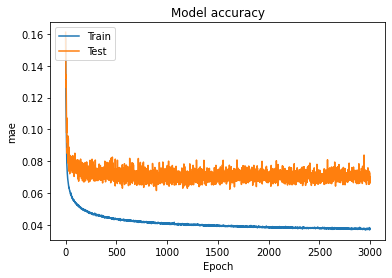

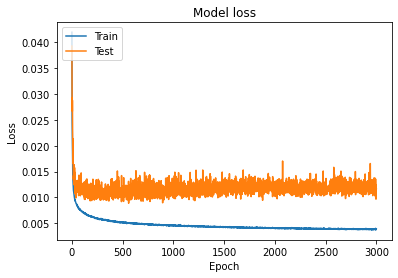

In [108]:

plot.plot(hist.history['mae'])
plot.plot(hist.history['val_mae'])
plot.title('Model accuracy')
plot.ylabel('mae')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(hist.history['loss'])
plot.plot(hist.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

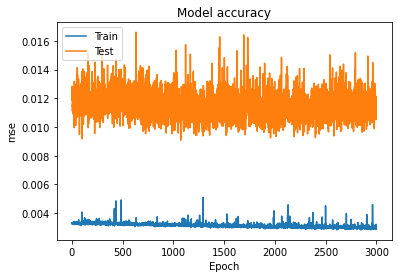

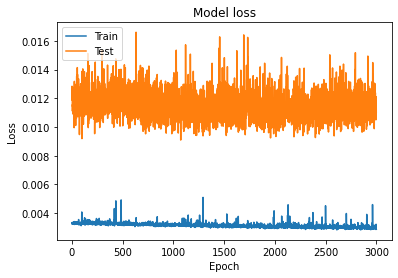

In [34]:
plot.plot(hist.history['mse'])
plot.plot(hist.history['val_mse'])
plot.title('Model accuracy')
plot.ylabel('mse')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(hist.history['loss'])
plot.plot(hist.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [82]:
eval_data = leerdato('dpruebasICC-ABS.txt')
resp_data = leerdato('rpruebas.txt')
print(len(eval_data))
print(len(resp_data))

59049
59049


In [83]:
# evaluamos el modelo
scores = model.evaluate(eval_data, resp_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(eval_data).round())

1846/1846 [==============================] - 4s 2ms/step - loss: 0.0046 - mse: 0.0046

mse: 0.46%
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [84]:
predictions = model.predict(eval_data)

In [86]:
for i in range(len(predictions)//10):
    for j in range(len(predictions[0])):
        print(round(((predictions[i][j]-resp_data[i][j])*100),2),end="%   ")
    print(" ")

3.32%   2.6%   4.56%   -3.09%   9.51%    
3.9%   -3.1%   1.34%   0.82%   37.59%    
3.51%   -4.6%   1.11%   -0.33%   27.36%    
3.42%   -4.95%   1.06%   -0.6%   17.3%    
3.39%   -5.08%   1.04%   -0.7%   7.29%    
3.38%   -5.13%   1.03%   -0.74%   -2.72%    
3.37%   -5.16%   1.03%   -0.76%   -12.73%    
3.37%   -5.17%   1.03%   -0.78%   -22.73%    
3.36%   -5.18%   1.03%   -0.78%   -32.73%    
5.24%   3.23%   3.35%   -5.46%   -3.37%    
4.36%   3.62%   3.67%   -4.91%   21.07%    
4.19%   3.12%   3.22%   -5.0%   23.14%    
4.17%   3.04%   3.18%   -5.03%   13.73%    
4.16%   3.01%   3.17%   -5.04%   3.94%    
4.16%   3.0%   3.16%   -5.05%   -5.97%    
4.16%   2.99%   3.16%   -5.05%   -15.93%    
4.16%   2.99%   3.15%   -5.05%   -25.9%    
4.16%   2.98%   3.15%   -5.05%   -35.89%    
3.29%   -0.02%   1.36%   -2.69%   -5.12%    
2.15%   -0.69%   1.31%   0.01%   16.3%    
2.04%   -1.08%   1.0%   0.17%   18.12%    
2.01%   -1.16%   0.94%   0.25%   10.49%    
2.0%   -1.19%   0.91%   0.27%   1

0.81%   -0.73%   -0.08%   0.92%   26.0%    
0.82%   -0.73%   -0.19%   0.97%   16.0%    
0.82%   -0.73%   -0.23%   0.99%   6.0%    
0.82%   -0.73%   -0.25%   1.0%   -4.0%    
0.82%   -0.73%   -0.26%   1.01%   -14.0%    
0.82%   -0.73%   -0.26%   1.01%   -24.0%    
0.82%   -0.73%   -0.26%   1.01%   -34.0%    
2.93%   -0.62%   19.41%   -2.81%   -4.42%    
0.82%   -0.87%   0.69%   -3.99%   35.93%    
0.83%   -0.88%   0.18%   -3.8%   25.95%    
0.83%   -0.88%   0.06%   -3.76%   15.96%    
0.83%   -0.88%   0.02%   -3.75%   5.96%    
0.83%   -0.88%   0.01%   -3.74%   -4.04%    
0.83%   -0.88%   -0.0%   -3.74%   -14.04%    
0.83%   -0.88%   -0.01%   -3.74%   -24.04%    
0.83%   -0.88%   -0.01%   -3.74%   -34.04%    
2.82%   -1.01%   22.85%   -12.84%   -2.63%    
0.87%   -0.83%   0.91%   -12.71%   35.95%    
0.88%   -0.83%   0.4%   -12.58%   25.96%    
0.88%   -0.84%   0.28%   -12.55%   15.97%    
0.88%   -0.84%   0.24%   -12.54%   5.97%    
0.88%   -0.84%   0.23%   -12.54%   -4.03%    
0.88%  

0.62%   -0.68%   -0.94%   1.36%   -24.22%    
0.46%   2.82%   15.9%   -0.28%   -2.42%    
0.77%   -0.3%   14.8%   0.17%   34.97%    
1.01%   -0.16%   12.21%   0.24%   25.12%    
1.07%   -0.07%   11.62%   0.34%   16.28%    
1.09%   -0.04%   11.42%   0.37%   6.67%    
1.1%   -0.03%   11.34%   0.39%   -3.16%    
1.1%   -0.02%   11.29%   0.39%   -13.07%    
1.11%   -0.02%   11.27%   0.4%   -23.02%    
1.11%   -0.02%   11.25%   0.4%   -32.99%    
1.31%   -2.41%   -0.02%   18.73%   -6.36%    
1.67%   0.13%   20.05%   0.46%   34.77%    
1.8%   0.17%   18.14%   0.39%   24.83%    
1.82%   0.17%   17.69%   0.38%   14.84%    
1.83%   0.17%   17.53%   0.37%   4.84%    
1.84%   0.18%   17.46%   0.37%   -5.15%    
1.84%   0.18%   17.43%   0.37%   -15.15%    
1.84%   0.18%   17.41%   0.37%   -25.15%    
1.84%   0.18%   17.4%   0.37%   -35.15%    
2.3%   -1.7%   -1.87%   26.49%   2.61%    
1.41%   0.35%   19.2%   -2.4%   34.69%    
1.39%   0.3%   16.69%   -1.88%   24.76%    
1.38%   0.28%   16.12%   -

0.44%   -1.95%   -1.09%   1.63%   14.42%    
0.44%   -1.94%   -1.23%   1.64%   4.43%    
0.44%   -1.94%   -1.29%   1.64%   -5.57%    
0.44%   -1.94%   -1.32%   1.64%   -15.57%    
0.44%   -1.94%   -1.34%   1.64%   -25.57%    
0.44%   -1.94%   -1.35%   1.64%   -35.57%    
2.25%   -2.83%   -13.77%   3.08%   -2.01%    
0.44%   -2.12%   1.12%   -3.41%   34.32%    
0.42%   -2.06%   -0.65%   -3.39%   24.38%    
0.42%   -2.05%   -1.05%   -3.39%   14.39%    
0.42%   -2.04%   -1.19%   -3.39%   4.39%    
0.42%   -2.04%   -1.25%   -3.39%   -5.6%    
0.42%   -2.04%   -1.28%   -3.39%   -15.6%    
0.42%   -2.04%   -1.3%   -3.39%   -25.6%    
0.42%   -2.04%   -1.31%   -3.39%   -35.6%    
2.24%   -2.9%   -13.41%   -6.49%   -2.37%    
0.42%   -2.18%   1.14%   -10.57%   34.3%    
0.41%   -2.12%   -0.63%   -10.6%   24.36%    
0.4%   -2.1%   -1.03%   -10.6%   14.37%    
0.4%   -2.1%   -1.16%   -10.61%   4.37%    
0.4%   -2.09%   -1.22%   -10.61%   -5.62%    
0.4%   -2.09%   -1.26%   -10.61%   -15.62%    


0.76%   -3.11%   1.45%   -19.83%   -32.47%    
1.81%   2.46%   2.52%   2.92%   -1.68%    
1.31%   1.01%   3.87%   2.67%   10.08%    
1.17%   0.28%   6.04%   1.78%   31.21%    
1.24%   0.29%   6.72%   1.86%   23.56%    
1.27%   0.3%   6.96%   1.89%   14.39%    
1.28%   0.3%   7.06%   1.9%   4.76%    
1.29%   0.3%   7.11%   1.91%   -5.06%    
1.29%   0.3%   7.14%   1.91%   -14.95%    
1.29%   0.3%   7.16%   1.91%   -24.89%    
4.69%   11.8%   4.44%   5.46%   -0.24%    
3.85%   2.27%   3.62%   0.84%   2.33%    
2.66%   0.23%   1.72%   -1.84%   13.96%    
2.84%   0.1%   0.19%   -2.48%   28.23%    
2.83%   0.17%   0.09%   -2.25%   19.86%    
2.79%   0.19%   0.14%   -2.25%   9.9%    
2.77%   0.19%   0.16%   -2.24%   -0.08%    
2.75%   0.19%   0.17%   -2.24%   -10.07%    
2.75%   0.2%   0.18%   -2.24%   -20.07%    
4.61%   0.43%   5.17%   6.54%   1.44%    
-0.24%   -0.37%   1.97%   6.54%   3.11%    
-1.56%   -1.06%   4.7%   5.65%   5.82%    
-0.69%   -1.19%   5.5%   2.4%   23.23%    
-0.65%  

1.29%   2.09%   0.04%   16.84%   -1.11%    
1.22%   -1.56%   1.47%   -2.12%   4.52%    
0.07%   -0.98%   1.49%   -1.6%   26.82%    
-0.0%   -0.79%   1.26%   -0.47%   26.57%    
-0.01%   -0.52%   1.23%   -0.01%   17.34%    
-0.02%   -0.41%   1.22%   0.18%   7.67%    
-0.02%   -0.35%   1.21%   0.27%   -2.17%    
-0.02%   -0.32%   1.21%   0.32%   -12.08%    
-0.02%   -0.3%   1.21%   0.36%   -22.03%    
0.78%   2.94%   1.95%   18.34%   -1.5%    
0.53%   -1.83%   0.11%   1.15%   4.91%    
-0.59%   -1.31%   -0.43%   3.06%   28.63%    
-0.63%   -1.18%   -0.56%   3.96%   26.7%    
-0.64%   -0.91%   -0.57%   4.28%   17.45%    
-0.64%   -0.8%   -0.57%   4.42%   7.76%    
-0.64%   -0.75%   -0.57%   4.49%   -2.08%    
-0.64%   -0.71%   -0.58%   4.53%   -12.0%    
-0.64%   -0.7%   -0.58%   4.55%   -21.95%    
0.4%   3.89%   2.53%   13.32%   -1.45%    
0.02%   -2.04%   -0.78%   -0.86%   4.59%    
-0.87%   -1.47%   -0.98%   0.43%   28.44%    
-0.9%   -1.34%   -1.11%   1.16%   26.46%    
-0.91%   -1.1

-0.32%   -1.26%   8.1%   2.62%   26.13%    
-0.28%   -1.06%   7.77%   2.83%   17.76%    
-0.26%   -0.94%   7.62%   2.92%   8.15%    
-0.25%   -0.88%   7.54%   2.97%   -1.65%    
-0.24%   -0.84%   7.5%   2.99%   -11.54%    
-0.24%   -0.82%   7.47%   3.01%   -21.48%    
0.89%   2.28%   -11.62%   16.51%   -1.31%    
1.02%   -1.37%   6.77%   -2.75%   3.16%    
1.07%   1.29%   10.97%   -2.08%   29.33%    
1.07%   1.39%   10.01%   -1.55%   27.74%    
1.06%   1.54%   9.64%   -1.39%   19.31%    
1.06%   1.67%   9.49%   -1.3%   9.68%    
1.07%   1.73%   9.42%   -1.25%   -0.14%    
1.07%   1.76%   9.38%   -1.23%   -10.04%    
1.07%   1.78%   9.35%   -1.21%   -19.98%    
0.41%   2.77%   -9.84%   17.43%   -1.66%    
1.26%   -0.23%   9.31%   -1.31%   2.33%    
0.78%   1.12%   9.33%   0.75%   30.07%    
0.76%   1.35%   8.44%   1.92%   28.18%    
0.75%   1.45%   8.11%   2.28%   20.23%    
0.75%   1.54%   7.95%   2.43%   10.54%    
0.74%   1.58%   7.86%   2.5%   0.7%    
0.74%   1.6%   7.81%   2.54%  

-0.79%   0.16%   -4.44%   7.77%   3.23%    
-0.59%   -0.11%   5.64%   -1.25%   26.05%    
-0.33%   0.31%   4.3%   -0.45%   25.51%    
-0.22%   0.46%   3.9%   -0.2%   18.05%    
-0.22%   0.53%   3.73%   -0.06%   8.41%    
-0.23%   0.56%   3.64%   0.03%   -1.42%    
-0.23%   0.58%   3.59%   0.08%   -11.32%    
-0.23%   0.59%   3.57%   0.1%   -21.26%    
0.01%   3.41%   -25.38%   4.35%   -1.53%    
-1.02%   0.34%   -5.66%   3.07%   2.59%    
-0.67%   -0.49%   5.3%   -2.82%   25.19%    
-0.37%   -0.14%   4.08%   -1.73%   24.86%    
-0.24%   -0.04%   3.69%   -1.31%   17.45%    
-0.24%   0.03%   3.54%   -1.17%   7.81%    
-0.24%   0.06%   3.47%   -1.1%   -2.01%    
-0.24%   0.08%   3.42%   -1.06%   -11.92%    
-0.24%   0.09%   3.4%   -1.04%   -21.86%    
-0.07%   4.04%   -25.38%   -3.48%   -1.52%    
-1.29%   -0.53%   -3.04%   0.15%   1.59%    
-0.56%   -0.75%   5.6%   -7.91%   24.7%    
-0.25%   -0.43%   4.34%   -6.85%   24.44%    
-0.13%   -0.32%   3.95%   -6.47%   17.02%    
-0.12%   -0.2

-0.32%   1.32%   2.2%   2.67%   10.29%    
-0.23%   1.95%   2.44%   2.63%   10.76%    
-0.24%   2.19%   2.55%   2.95%   2.7%    
-0.26%   2.31%   2.6%   3.17%   -6.24%    
-0.28%   2.37%   2.64%   3.3%   -15.61%    
1.27%   8.88%   2.48%   14.05%   -0.43%    
0.19%   -1.98%   3.91%   14.91%   1.4%    
1.24%   0.02%   1.41%   -0.44%   -4.29%    
0.45%   -0.04%   -0.36%   -2.88%   -1.94%    
0.46%   1.32%   0.55%   -1.38%   10.45%    
0.56%   2.19%   1.1%   -1.01%   8.02%    
0.55%   2.55%   1.34%   -0.85%   1.59%    
0.55%   2.76%   1.52%   -0.7%   -6.53%    
0.52%   2.82%   1.58%   -0.66%   -15.42%    
0.9%   9.48%   4.21%   16.74%   -1.0%    
0.67%   -1.86%   4.68%   6.59%   -0.17%    
1.57%   -1.16%   2.82%   -4.39%   -3.75%    
0.97%   0.99%   -0.21%   -2.4%   -2.53%    
0.64%   2.56%   -0.33%   -1.23%   15.55%    
0.56%   3.17%   -0.07%   -1.61%   11.99%    
0.53%   3.46%   0.09%   -1.67%   3.77%    
0.51%   3.62%   0.17%   -1.7%   -5.27%    
0.5%   3.72%   0.22%   -1.72%   -14.69%

0.83%   1.03%   4.39%   -0.5%   7.94%    
0.82%   1.15%   4.33%   -0.3%   -1.7%    
0.81%   1.21%   4.3%   -0.19%   -11.49%    
0.87%   10.4%   -6.49%   16.45%   -0.98%    
0.96%   0.09%   -5.61%   3.51%   3.02%    
0.12%   -0.65%   6.11%   -5.03%   1.51%    
0.3%   0.61%   4.78%   -3.95%   8.88%    
0.74%   1.18%   4.35%   -2.24%   21.07%    
0.89%   1.48%   4.37%   -1.07%   17.14%    
0.89%   1.65%   4.3%   -0.51%   8.51%    
0.88%   1.75%   4.24%   -0.21%   -0.97%    
0.87%   1.81%   4.21%   -0.03%   -10.66%    
0.78%   11.31%   -5.07%   11.14%   -0.86%    
1.04%   0.4%   -1.73%   -1.19%   3.03%    
-0.16%   -1.1%   5.9%   -3.67%   2.24%    
-0.25%   -0.09%   3.88%   -1.87%   11.76%    
0.21%   0.44%   3.43%   -0.49%   21.42%    
0.37%   0.7%   3.43%   0.43%   17.02%    
0.4%   0.84%   3.38%   0.87%   8.84%    
0.4%   0.93%   3.33%   1.1%   -0.69%    
0.39%   0.98%   3.29%   1.24%   -10.41%    
0.63%   12.32%   -5.01%   4.74%   -0.85%    
0.51%   -0.14%   -4.42%   1.77%   2.41%    


1.37%   9.61%   0.06%   -0.91%   0.12%    
1.38%   9.6%   0.06%   -0.92%   -9.88%    
1.38%   9.59%   0.06%   -0.92%   -19.88%    
1.38%   9.59%   0.06%   -0.92%   -29.88%    
2.18%   21.75%   1.34%   3.31%   -0.12%    
1.38%   12.45%   2.01%   1.37%   4.44%    
1.46%   12.12%   0.75%   -0.08%   31.09%    
1.53%   12.43%   0.61%   -0.17%   22.87%    
1.56%   12.54%   0.56%   -0.18%   13.24%    
1.57%   12.59%   0.54%   -0.19%   3.4%    
1.58%   12.61%   0.53%   -0.19%   -6.52%    
1.58%   12.63%   0.53%   -0.19%   -16.47%    
1.58%   12.63%   0.52%   -0.19%   -26.44%    
1.1%   18.64%   0.64%   3.13%   0.82%    
0.45%   11.34%   1.17%   1.97%   8.77%    
0.46%   11.2%   0.4%   1.14%   31.39%    
0.54%   11.5%   0.37%   1.29%   22.79%    
0.57%   11.61%   0.36%   1.35%   13.18%    
0.58%   11.65%   0.35%   1.38%   3.35%    
0.59%   11.68%   0.35%   1.39%   -6.57%    
0.59%   11.69%   0.35%   1.4%   -16.52%    
0.6%   11.7%   0.35%   1.4%   -26.49%    
0.45%   16.29%   0.9%   2.63%   0.9

0.75%   -1.33%   0.37%   6.81%   -1.27%    
2.08%   -1.1%   -3.03%   0.07%   -0.61%    
1.1%   -1.79%   -5.26%   0.37%   -2.47%    
0.73%   -0.53%   -4.5%   1.23%   2.33%    
1.03%   -0.15%   -3.95%   1.46%   17.42%    
0.94%   -0.11%   -3.83%   1.59%   7.95%    
0.91%   -0.05%   -3.83%   1.65%   -1.74%    
0.89%   -0.01%   -3.82%   1.69%   -11.56%    
0.84%   12.58%   2.03%   12.95%   -0.07%    
0.68%   -0.86%   0.78%   -0.55%   -0.7%    
1.63%   -1.01%   -4.59%   0.74%   -0.89%    
0.72%   -2.14%   -4.16%   -1.56%   -0.93%    
0.13%   0.65%   -2.76%   -0.41%   3.99%    
0.62%   2.04%   -2.04%   -0.03%   16.78%    
0.49%   2.54%   -1.45%   0.6%   9.32%    
0.37%   2.85%   -1.23%   0.83%   -0.11%    
0.31%   3.04%   -1.1%   0.97%   -9.78%    
0.74%   12.02%   3.61%   15.75%   -0.77%    
-0.1%   -2.17%   -0.08%   7.22%   -1.4%    
1.4%   -1.32%   2.18%   4.02%   1.76%    
0.39%   -0.45%   3.83%   2.88%   0.36%    
0.92%   1.47%   0.98%   0.75%   10.86%    
0.98%   2.16%   0.6%   0.36%  

0.61%   14.07%   -6.51%   16.16%   -0.41%    
0.85%   0.73%   2.39%   2.3%   -0.36%    
-0.73%   -3.3%   -6.13%   2.38%   -1.47%    
1.02%   -1.84%   3.02%   2.35%   0.55%    
0.49%   1.16%   3.11%   2.0%   3.07%    
0.26%   1.78%   2.54%   1.25%   3.59%    
0.3%   1.83%   1.94%   1.09%   -3.32%    
0.24%   2.27%   2.04%   1.44%   -10.54%    
0.2%   2.66%   2.33%   1.78%   -18.44%    
0.51%   14.53%   -5.21%   11.36%   -0.3%    
-0.05%   1.35%   0.92%   5.24%   0.21%    
0.32%   -4.9%   -7.02%   -1.26%   -3.21%    
1.15%   -0.15%   3.21%   3.01%   0.28%    
0.28%   -0.03%   0.35%   -0.21%   4.69%    
0.28%   1.21%   0.72%   0.31%   15.85%    
0.34%   1.52%   1.2%   0.95%   13.47%    
0.38%   1.6%   1.56%   1.12%   7.28%    
0.37%   1.63%   1.72%   1.36%   -0.92%    
0.3%   15.14%   -4.69%   5.11%   -0.27%    
-0.55%   1.82%   -0.7%   4.98%   1.16%    
2.38%   -5.46%   -7.46%   -4.15%   -4.77%    
0.9%   -1.17%   2.33%   -0.59%   -0.29%    
-0.33%   -0.47%   -0.31%   -2.74%   4.09%    


0.34%   6.57%   0.21%   1.51%   -16.0%    
0.34%   6.58%   0.21%   1.51%   -25.97%    
0.21%   12.6%   0.64%   2.72%   1.4%    
-0.03%   2.23%   2.1%   0.99%   7.88%    
-0.01%   1.97%   1.48%   -0.61%   30.73%    
0.07%   2.24%   1.47%   -0.55%   21.79%    
0.1%   2.33%   1.46%   -0.53%   12.16%    
0.12%   2.37%   1.46%   -0.52%   2.32%    
0.12%   2.39%   1.46%   -0.52%   -7.6%    
0.12%   2.42%   1.46%   -0.51%   -17.56%    
0.12%   2.44%   1.46%   -0.5%   -27.54%    
-0.21%   11.32%   1.0%   -1.43%   1.35%    
-0.33%   1.48%   2.77%   -4.24%   7.2%    
-0.3%   1.1%   2.11%   -4.33%   30.53%    
-0.21%   1.33%   2.09%   -3.78%   21.58%    
-0.18%   1.42%   2.08%   -3.58%   11.94%    
-0.18%   1.52%   2.07%   -3.46%   2.06%    
-0.18%   1.57%   2.07%   -3.4%   -7.88%    
-0.18%   1.59%   2.07%   -3.37%   -17.85%    
-0.18%   1.61%   2.07%   -3.35%   -27.83%    
-0.35%   10.5%   1.11%   -4.63%   1.59%    
-0.4%   0.38%   2.84%   -1.64%   7.36%    
-0.36%   0.01%   2.18%   -1.75%   30

-1.44%   14.02%   9.42%   1.5%   4.05%    
-1.17%   21.89%   9.39%   2.41%   32.74%    
-1.02%   24.6%   9.19%   2.71%   30.75%    
-1.08%   25.57%   9.39%   2.93%   22.03%    
-1.1%   25.99%   9.47%   3.01%   12.45%    
-1.11%   26.09%   9.48%   3.03%   2.62%    
-1.11%   26.09%   9.47%   3.03%   -7.3%    
-1.11%   26.1%   9.47%   3.03%   -17.25%    
2.54%   3.58%   4.77%   0.71%   2.28%    
2.36%   0.85%   2.46%   2.7%   3.36%    
2.42%   0.11%   1.38%   0.48%   0.46%    
0.4%   1.18%   -2.6%   1.46%   2.32%    
1.08%   1.92%   -1.53%   1.03%   12.33%    
1.22%   2.58%   -0.7%   1.33%   13.67%    
1.17%   2.81%   -0.44%   1.48%   7.47%    
1.13%   2.93%   -0.29%   1.46%   -1.6%    
1.11%   3.01%   -0.21%   1.45%   -11.04%    
1.76%   12.68%   7.32%   0.91%   1.47%    
0.8%   -2.9%   -1.09%   -2.07%   -4.37%    
2.34%   5.05%   1.75%   -0.22%   0.0%    
-0.76%   3.44%   -0.41%   2.53%   5.23%    
0.18%   4.53%   -3.77%   0.51%   13.5%    
0.14%   5.04%   -4.29%   0.84%   23.96%    
-0

-0.16%   13.68%   0.17%   -3.65%   -0.54%    
-1.06%   1.33%   -5.3%   1.35%   1.84%    
-0.41%   0.06%   -2.05%   -6.45%   0.93%    
-0.11%   1.16%   3.72%   -3.47%   4.2%    
-0.82%   -1.35%   2.26%   -3.46%   0.33%    
-2.05%   0.4%   2.7%   -0.09%   -0.64%    
-2.34%   2.12%   2.06%   0.55%   6.56%    
-1.72%   4.1%   3.61%   0.6%   6.4%    
-1.51%   4.6%   4.43%   1.02%   -1.93%    
2.16%   12.13%   -8.98%   0.32%   -0.23%    
-1.33%   14.51%   -5.25%   2.94%   3.93%    
-0.8%   21.05%   -5.38%   1.34%   30.6%    
-0.76%   23.87%   -5.42%   1.4%   29.6%    
-0.8%   24.42%   -5.43%   1.63%   21.76%    
-0.8%   24.44%   -5.5%   1.66%   12.15%    
-0.8%   24.45%   -5.53%   1.66%   2.3%    
-0.8%   24.45%   -5.55%   1.67%   -7.62%    
-0.8%   24.45%   -5.56%   1.67%   -17.57%    
0.97%   6.56%   -6.9%   2.17%   1.84%    
2.37%   -1.44%   1.92%   2.68%   4.43%    
0.89%   0.81%   3.46%   2.37%   2.85%    
0.13%   1.69%   1.72%   1.48%   3.99%    
0.37%   1.29%   2.6%   1.34%   10.78%  

-0.53%   4.67%   -4.95%   5.15%   -1.78%    
-0.25%   4.66%   -5.52%   -2.61%   3.23%    
-1.98%   -5.45%   -10.59%   -0.22%   1.92%    
0.25%   -6.28%   -0.26%   -5.58%   -0.35%    
-0.49%   -2.13%   0.39%   -0.69%   0.06%    
-0.32%   -0.59%   0.98%   -0.96%   4.4%    
-0.22%   0.22%   1.2%   -0.76%   -2.01%    
-0.21%   0.63%   1.18%   -0.42%   -10.59%    
0.16%   13.68%   -23.4%   4.14%   -0.57%    
-1.21%   4.02%   -3.22%   2.21%   -1.22%    
-1.03%   4.95%   -3.63%   0.2%   3.97%    
-3.4%   -5.72%   -4.08%   -4.33%   1.03%    
0.56%   -4.76%   -3.64%   -2.18%   -5.67%    
-0.15%   -1.68%   -3.58%   -4.54%   1.35%    
-0.11%   0.28%   -1.74%   -3.41%   5.95%    
-0.01%   1.17%   -1.2%   -1.63%   5.1%    
0.06%   1.64%   -1.11%   -0.52%   0.51%    
-0.02%   13.98%   -23.27%   -4.0%   -0.86%    
-1.78%   3.18%   -3.28%   -2.02%   -0.61%    
-1.01%   4.59%   -2.12%   -1.13%   4.5%    
-2.69%   -10.69%   1.25%   -0.25%   1.58%    
0.36%   -4.31%   -4.88%   -5.26%   -5.86%    
-0.72% 

-0.36%   0.98%   -5.94%   -0.35%   -1.68%    
1.64%   5.42%   2.61%   0.89%   -1.02%    
1.27%   6.02%   1.5%   1.15%   -0.16%    
0.96%   4.11%   0.83%   0.7%   9.39%    
1.01%   3.91%   0.62%   0.57%   13.66%    
1.07%   4.04%   0.68%   0.99%   6.5%    
1.1%   4.09%   0.72%   1.24%   -1.92%    
1.12%   4.13%   0.75%   1.39%   -10.98%    
1.78%   0.83%   -3.02%   6.64%   0.49%    
-1.12%   1.73%   -0.1%   -1.73%   -0.88%    
1.09%   1.51%   0.89%   -2.54%   -1.27%    
0.48%   2.96%   1.06%   -0.57%   0.41%    
0.16%   2.48%   1.73%   0.38%   13.58%    
0.22%   2.53%   1.29%   0.41%   18.72%    
0.38%   2.68%   1.1%   0.93%   12.53%    
0.43%   2.92%   1.08%   1.23%   4.35%    
0.46%   3.1%   1.08%   1.41%   -4.64%    
1.22%   -0.1%   -3.8%   12.4%   -0.68%    
-0.4%   3.43%   2.7%   0.27%   1.87%    
-0.11%   3.63%   1.84%   0.26%   0.37%    
-0.39%   4.15%   1.27%   -0.19%   1.7%    
-0.63%   3.57%   2.2%   0.48%   12.44%    
-0.4%   3.53%   1.81%   0.61%   18.35%    
-0.17%   3.68% 

-0.07%   3.53%   1.51%   10.61%   -0.37%    
0.43%   2.26%   2.33%   5.61%   0.76%    
1.85%   -4.54%   -6.78%   -1.64%   -2.63%    
0.02%   4.55%   -1.69%   3.38%   2.1%    
-0.32%   0.59%   3.08%   3.45%   4.91%    
-0.54%   0.69%   -0.37%   0.71%   3.32%    
-0.43%   2.46%   -0.95%   -0.93%   6.96%    
-0.53%   1.58%   -1.72%   -0.8%   12.14%    
-0.37%   1.31%   -1.88%   -0.18%   8.33%    
-0.28%   3.92%   1.84%   4.52%   -0.22%    
-0.6%   1.02%   2.92%   6.51%   1.49%    
1.31%   -4.02%   -7.71%   -2.36%   -1.95%    
-0.26%   2.95%   -1.05%   1.58%   2.17%    
-0.32%   -1.48%   3.32%   1.21%   4.62%    
-0.08%   -0.14%   -1.39%   1.05%   1.38%    
-0.88%   1.32%   -3.38%   0.25%   14.17%    
-0.93%   0.73%   -3.93%   2.03%   14.94%    
-0.88%   0.57%   -3.93%   3.03%   9.96%    
-0.4%   4.19%   2.08%   -3.13%   -0.12%    
-1.23%   0.26%   3.53%   1.98%   2.14%    
0.44%   -3.4%   -7.83%   -5.17%   -2.4%    
-0.23%   1.01%   -1.51%   -4.25%   1.87%    
0.05%   -2.13%   0.58%   -3.

-0.92%   18.69%   -14.68%   1.8%   -7.33%    
-0.92%   18.69%   -14.69%   1.8%   -17.28%    
0.76%   0.06%   -15.75%   2.07%   1.84%    
1.71%   1.9%   -3.31%   3.46%   5.53%    
0.7%   4.03%   -0.39%   2.3%   4.43%    
-0.06%   5.22%   -1.31%   1.0%   10.1%    
0.15%   6.5%   -1.94%   1.58%   13.73%    
0.46%   7.32%   -2.34%   2.06%   15.72%    
0.66%   7.86%   -2.77%   2.25%   11.99%    
0.6%   8.19%   -2.63%   2.36%   2.6%    
0.57%   8.39%   -2.55%   2.43%   -7.03%    
0.8%   6.07%   -15.62%   1.19%   1.69%    
0.99%   -1.41%   -5.26%   -0.34%   0.33%    
1.45%   -1.1%   -2.1%   2.32%   2.56%    
1.1%   0.24%   -0.56%   0.98%   7.7%    
0.62%   3.25%   0.39%   1.26%   6.72%    
0.25%   3.47%   -0.95%   1.13%   4.62%    
0.41%   3.66%   -1.91%   1.05%   9.12%    
0.28%   3.77%   -1.63%   0.99%   3.56%    
0.24%   3.87%   -1.38%   0.94%   -4.33%    
0.85%   6.14%   -18.75%   3.02%   1.46%    
1.16%   1.09%   -6.13%   1.16%   0.74%    
-0.88%   1.49%   -1.57%   -3.2%   0.39%    
1.13

-0.31%   -15.52%   1.88%   -3.42%   2.4%    
-0.31%   -15.47%   1.88%   -3.36%   -7.54%    
-0.31%   -15.44%   1.88%   -3.32%   -17.51%    
-0.31%   -15.43%   1.88%   -3.3%   -27.49%    
-0.52%   -5.41%   0.93%   -4.57%   1.84%    
-0.56%   -16.59%   2.66%   -1.58%   7.46%    
-0.5%   -16.96%   1.98%   -1.66%   30.73%    
-0.42%   -16.73%   1.96%   -1.12%   21.78%    
-0.39%   -16.65%   1.95%   -0.93%   12.15%    
-0.38%   -16.57%   1.95%   -0.82%   2.27%    
-0.38%   -16.52%   1.94%   -0.76%   -7.67%    
-0.38%   -16.5%   1.94%   -0.72%   -17.64%    
-0.38%   -16.48%   1.94%   -0.71%   -27.62%    
-0.57%   -6.03%   0.92%   -7.98%   2.11%    
-0.6%   -17.15%   2.69%   -5.18%   7.54%    
-0.54%   -17.52%   2.02%   -5.27%   30.68%    
-0.45%   -17.29%   1.99%   -4.73%   21.73%    
-0.42%   -17.19%   1.98%   -4.54%   12.09%    
-0.42%   -17.08%   1.97%   -4.43%   2.21%    
-0.42%   -17.03%   1.97%   -4.38%   -7.73%    
-0.42%   -16.99%   1.96%   -4.35%   -17.69%    
-0.42%   -16.98%   1.9

0.6%   14.19%   -1.37%   2.47%   10.25%    
0.58%   14.4%   -1.26%   2.49%   1.36%    
0.57%   14.53%   -1.2%   2.5%   -7.97%    
1.61%   -5.42%   7.73%   1.33%   1.71%    
-0.16%   -2.08%   -5.93%   -1.01%   -4.75%    
2.36%   1.57%   2.93%   -0.31%   0.72%    
-0.11%   -1.38%   2.51%   2.57%   5.92%    
0.41%   -0.01%   -2.57%   0.5%   14.61%    
0.17%   1.04%   -2.77%   0.99%   25.4%    
0.04%   1.67%   -2.58%   0.84%   19.69%    
-0.0%   2.09%   -2.48%   0.79%   12.13%    
-0.04%   2.35%   -2.43%   0.75%   3.58%    
1.02%   -5.11%   2.22%   4.2%   1.12%    
1.59%   1.15%   -0.5%   3.56%   -0.91%    
-0.16%   4.86%   0.25%   -0.4%   1.41%    
0.92%   5.16%   0.41%   1.25%   0.82%    
0.5%   4.56%   -1.32%   0.91%   0.37%    
0.17%   4.99%   -0.76%   2.21%   7.08%    
0.18%   4.93%   -0.58%   2.66%   11.23%    
0.26%   5.16%   -0.38%   3.36%   5.28%    
0.31%   5.34%   -0.29%   3.77%   -2.4%    
0.73%   -5.94%   0.82%   11.54%   -0.08%    
1.08%   3.08%   -0.68%   -0.42%   0.36%    


1.57%   4.62%   -4.42%   0.21%   1.38%    
0.14%   1.63%   -0.99%   5.22%   0.46%    
0.78%   -2.43%   -3.35%   -2.74%   0.61%    
1.01%   1.32%   -0.43%   0.28%   2.85%    
1.18%   0.85%   -0.33%   0.68%   3.18%    
0.86%   1.75%   -0.13%   1.16%   1.44%    
0.54%   1.74%   -0.03%   1.27%   2.69%    
0.45%   1.01%   -0.39%   1.9%   4.01%    
0.26%   -5.43%   -0.53%   10.56%   -0.2%    
0.21%   3.56%   -7.78%   4.52%   0.77%    
0.25%   -1.66%   -2.11%   -5.66%   -0.41%    
-0.05%   -0.86%   -1.12%   -4.11%   2.24%    
0.43%   2.93%   -1.67%   0.23%   0.68%    
0.17%   3.23%   1.24%   1.07%   5.48%    
-0.4%   3.83%   0.94%   1.1%   3.08%    
-0.93%   3.09%   0.41%   0.45%   4.43%    
-1.23%   2.13%   -0.81%   0.64%   4.23%    
0.07%   -5.02%   0.04%   4.47%   -0.06%    
-0.78%   2.65%   -6.51%   4.35%   1.78%    
-0.1%   -0.53%   -0.4%   -1.2%   -0.21%    
-1.34%   -1.16%   -2.97%   0.4%   1.62%    
-0.3%   1.98%   0.32%   3.22%   0.22%    
-0.44%   0.68%   2.29%   2.78%   4.39%    
-

-1.69%   -6.55%   -4.6%   -6.83%   -5.25%    
2.33%   -1.51%   -28.3%   0.3%   -0.15%    
-1.43%   -1.22%   -23.63%   3.32%   4.03%    
-0.94%   5.58%   -23.7%   1.75%   31.17%    
-0.81%   8.42%   -23.84%   1.6%   29.85%    
-0.83%   8.83%   -23.88%   1.74%   21.94%    
-0.83%   8.85%   -23.95%   1.77%   12.45%    
-0.83%   8.85%   -23.98%   1.77%   2.6%    
-0.83%   8.86%   -24.0%   1.78%   -7.32%    
-0.83%   8.86%   -24.01%   1.78%   -17.27%    
0.64%   -8.12%   -25.03%   2.03%   1.84%    
1.94%   6.65%   -9.58%   1.91%   4.32%    
1.18%   10.96%   -8.33%   0.77%   2.91%    
0.31%   12.46%   -8.48%   0.32%   9.08%    
0.35%   13.53%   -9.42%   0.64%   13.17%    
0.68%   14.11%   -10.23%   0.75%   16.57%    
0.78%   14.42%   -10.47%   0.78%   11.92%    
0.73%   14.6%   -10.34%   0.81%   3.11%    
0.7%   14.71%   -10.27%   0.83%   -6.17%    
0.85%   -3.31%   -25.1%   1.37%   1.92%    
1.82%   6.23%   -11.92%   0.82%   -0.84%    
1.56%   -4.55%   -8.08%   0.98%   1.64%    
1.4%   2.0%

0.16%   1.15%   0.08%   0.94%   15.09%    
0.2%   1.17%   -0.0%   1.15%   6.68%    
0.22%   1.19%   -0.05%   1.26%   -2.44%    
0.24%   1.19%   -0.08%   1.33%   -11.91%    
1.47%   -17.86%   -1.0%   6.16%   -0.17%    
-0.6%   1.22%   3.13%   0.69%   4.52%    
-0.33%   2.3%   2.6%   1.58%   8.81%    
-0.43%   2.71%   1.37%   0.98%   16.83%    
-0.15%   3.32%   0.87%   1.47%   23.45%    
0.01%   3.63%   0.74%   2.0%   17.17%    
0.08%   3.71%   0.67%   2.21%   8.76%    
0.12%   3.75%   0.63%   2.33%   -0.36%    
0.13%   3.72%   0.62%   2.38%   -10.1%    
0.24%   -17.5%   -0.53%   12.15%   -0.75%    
-1.18%   1.4%   1.76%   1.04%   3.13%    
-0.65%   2.78%   1.49%   0.61%   7.5%    
-0.88%   3.16%   1.33%   -0.27%   16.58%    
-0.59%   3.7%   1.09%   0.07%   22.58%    
-0.39%   4.03%   1.06%   0.53%   16.45%    
-0.28%   4.12%   1.04%   0.68%   8.17%    
-0.24%   4.09%   1.04%   0.73%   -1.16%    
-0.22%   4.05%   1.05%   0.74%   -10.87%    
-0.42%   -15.32%   0.7%   19.66%   -0.98%    
-

1.6%   -19.06%   4.8%   1.02%   1.78%    
1.41%   -0.66%   -1.54%   1.53%   4.08%    
1.15%   0.68%   3.07%   -0.07%   1.9%    
-0.86%   2.87%   0.45%   2.04%   6.6%    
-0.38%   4.26%   1.36%   2.53%   10.98%    
0.18%   5.24%   0.89%   2.28%   13.61%    
0.12%   5.5%   1.12%   2.63%   10.54%    
0.07%   5.66%   1.17%   2.63%   1.85%    
0.04%   5.76%   1.2%   2.63%   -7.45%    
1.09%   -14.32%   4.97%   1.46%   1.76%    
1.12%   0.77%   2.11%   6.12%   -0.19%    
1.05%   -0.56%   -0.64%   2.27%   2.16%    
1.4%   3.71%   -0.27%   2.09%   2.02%    
0.58%   2.67%   -4.18%   -0.61%   4.58%    
0.63%   2.32%   -5.02%   -0.45%   17.89%    
0.46%   2.57%   -4.67%   -0.5%   13.63%    
0.41%   2.74%   -4.46%   -0.47%   6.81%    
0.38%   2.85%   -4.33%   -0.44%   -1.29%    
0.69%   -14.25%   -0.35%   3.41%   1.4%    
2.31%   0.54%   0.27%   2.7%   1.66%    
-1.1%   -1.49%   -4.47%   -0.11%   -5.37%    
1.35%   3.24%   -2.96%   0.28%   0.22%    
-1.57%   1.22%   0.18%   3.6%   6.39%    
-1.4% 

0.06%   0.03%   -0.59%   -0.12%   -0.46%    
-0.72%   0.03%   -1.25%   -1.81%   2.51%    
-1.18%   0.34%   -1.73%   -2.4%   -0.8%    
-1.74%   -0.41%   -3.24%   -2.9%   0.09%    
0.06%   -14.28%   -5.61%   -3.88%   -0.47%    
-1.61%   6.89%   -7.79%   -1.17%   1.34%    
-1.01%   -1.43%   -0.66%   0.12%   -0.19%    
-1.68%   -11.41%   -5.85%   -3.24%   -4.9%    
0.78%   -5.51%   -7.73%   -3.29%   -0.24%    
-0.69%   -2.01%   0.59%   -0.27%   -2.99%    
-1.28%   -2.4%   -1.54%   -1.38%   0.77%    
-1.61%   0.09%   -2.94%   -2.72%   2.18%    
-1.48%   -1.36%   -1.93%   -3.91%   2.51%    
2.31%   -10.39%   -18.78%   0.29%   -0.09%    
-1.31%   -11.13%   -14.19%   3.15%   4.13%    
-0.86%   -4.38%   -14.28%   1.69%   31.37%    
-0.74%   -1.54%   -14.39%   1.59%   29.91%    
-0.77%   -1.13%   -14.43%   1.8%   22.01%    
-0.77%   -1.11%   -14.5%   1.83%   12.47%    
-0.77%   -1.11%   -14.53%   1.84%   2.61%    
-0.77%   -1.1%   -14.55%   1.84%   -7.3%    
-0.77%   -1.1%   -14.56%   1.84%   -1

-0.42%   -35.58%   1.88%   -0.69%   -27.52%    
-0.63%   -24.86%   0.87%   -7.93%   2.16%    
-0.65%   -36.23%   2.64%   -5.16%   7.57%    
-0.58%   -36.59%   1.96%   -5.24%   30.77%    
-0.49%   -36.37%   1.93%   -4.7%   21.82%    
-0.46%   -36.28%   1.92%   -4.52%   12.19%    
-0.46%   -36.18%   1.91%   -4.42%   2.31%    
-0.46%   -36.12%   1.91%   -4.36%   -7.62%    
-0.46%   -36.09%   1.9%   -4.33%   -17.59%    
-0.46%   -36.07%   1.9%   -4.31%   -27.57%    
-0.66%   -25.21%   0.86%   -14.23%   2.31%    
-0.67%   -36.55%   2.66%   -11.57%   7.62%    
-0.6%   -36.88%   1.97%   -11.66%   30.75%    
-0.51%   -36.54%   1.91%   -11.19%   21.83%    
-0.48%   -36.42%   1.9%   -11.03%   12.21%    
-0.49%   -36.31%   1.88%   -10.92%   2.33%    
-0.49%   -36.26%   1.88%   -10.87%   -7.6%    
-0.49%   -36.23%   1.88%   -10.84%   -17.57%    
-0.49%   -36.21%   1.87%   -10.82%   -27.55%    


In [87]:
print(len(predictions)//5521)

10


In [88]:
data=[]
for i in range(len(predictions)):
    if(i%5521==0):
        fila1=[]
        for j in range(len(predictions[0])):
            print( round(predictions[i][j],1),end="%   ")
            fila1.append(round(predictions[i][j],1))
        print(" ")
        
        fila2=[]
        for j in range(len(predictions[0])):
            print(resp_data[i][j],end="%   ")
            fila2.append(resp_data[i][j])
        print(" ")
        print(" ")
        data.append([fila1,fila2])

0.1%   0.1%   0.1%   0.1%   0.2%    
0.1%   0.1%   0.1%   0.1%   0.1%    
 
0.1%   0.8%   0.6%   0.2%   0.6%    
0.1%   0.8%   0.6%   0.2%   0.5%    
 
0.2%   0.7%   0.2%   0.3%   0.8%    
0.2%   0.7%   0.2%   0.3%   0.9%    
 
0.3%   0.5%   0.7%   0.5%   0.4%    
0.3%   0.5%   0.7%   0.5%   0.4%    
 
0.4%   0.4%   0.3%   0.6%   0.8%    
0.4%   0.4%   0.3%   0.6%   0.8%    
 
0.5%   0.2%   0.8%   0.8%   0.3%    
0.5%   0.2%   0.8%   0.8%   0.3%    
 
0.6%   0.1%   0.5%   0.9%   0.8%    
0.6%   0.1%   0.4%   0.9%   0.7%    
 
0.6%   0.8%   0.1%   0.2%   0.2%    
0.6%   0.9%   0.1%   0.2%   0.2%    
 
0.7%   0.7%   0.6%   0.3%   0.6%    
0.7%   0.7%   0.6%   0.3%   0.6%    
 
0.7%   0.6%   0.2%   0.5%   0.1%    
0.8%   0.6%   0.2%   0.5%   0.1%    
 
0.9%   0.3%   0.9%   0.8%   0.6%    
0.9%   0.4%   0.7%   0.6%   0.5%    
 


In [89]:
for i in data:
    print(i)

[[0.1, 0.1, 0.1, 0.1, 0.2], [0.1, 0.1, 0.1, 0.1, 0.1]]
[[0.1, 0.8, 0.6, 0.2, 0.6], [0.1, 0.8, 0.6, 0.2, 0.5]]
[[0.2, 0.7, 0.2, 0.3, 0.8], [0.2, 0.7, 0.2, 0.3, 0.9]]
[[0.3, 0.5, 0.7, 0.5, 0.4], [0.3, 0.5, 0.7, 0.5, 0.4]]
[[0.4, 0.4, 0.3, 0.6, 0.8], [0.4, 0.4, 0.3, 0.6, 0.8]]
[[0.5, 0.2, 0.8, 0.8, 0.3], [0.5, 0.2, 0.8, 0.8, 0.3]]
[[0.6, 0.1, 0.5, 0.9, 0.8], [0.6, 0.1, 0.4, 0.9, 0.7]]
[[0.6, 0.8, 0.1, 0.2, 0.2], [0.6, 0.9, 0.1, 0.2, 0.2]]
[[0.7, 0.7, 0.6, 0.3, 0.6], [0.7, 0.7, 0.6, 0.3, 0.6]]
[[0.7, 0.6, 0.2, 0.5, 0.1], [0.8, 0.6, 0.2, 0.5, 0.1]]
[[0.9, 0.3, 0.9, 0.8, 0.6], [0.9, 0.4, 0.7, 0.6, 0.5]]


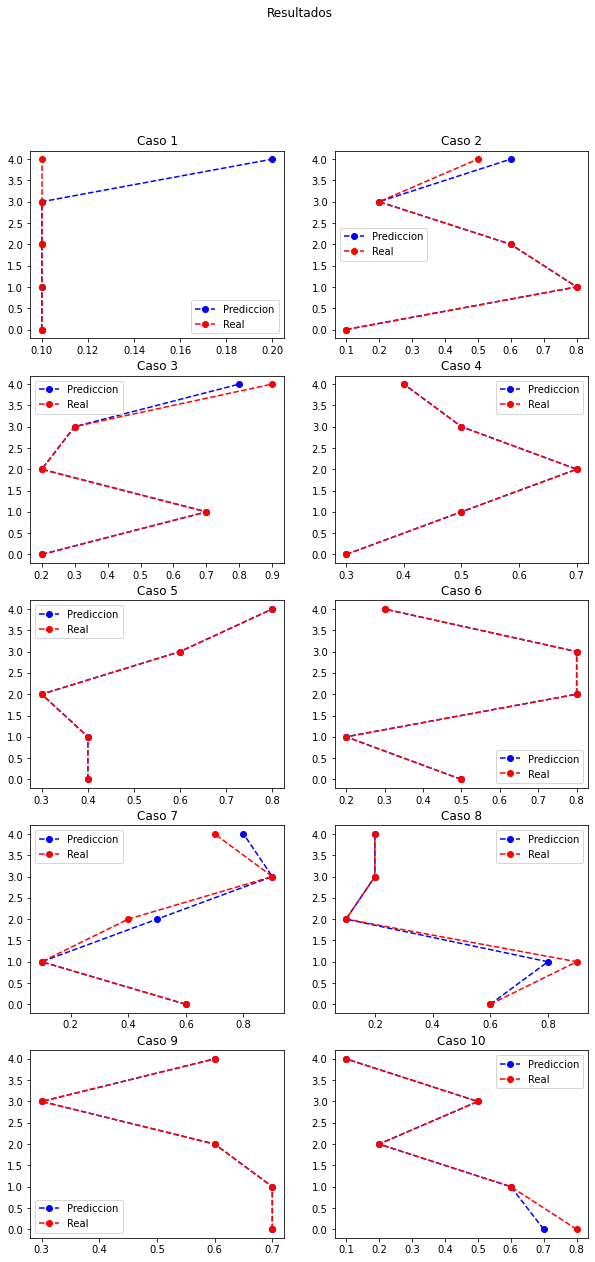

In [90]:
# Crea múltiples subgrafos
fig, ax = plot.subplots(nrows=5, ncols=2, figsize=(10,20))

index=0
for i in range(5):
    for j in range(2):
        # Dibujar gráficos
        ax[i, j].plot(data[index][0],[0,1,2,3,4], linestyle='--', marker='o', color='b', label='Prediccion') 
        ax[i, j].set_title("Caso "+str(index+1)) 
        ax[i, j].plot(data[index][1],[0,1,2,3,4], linestyle='--', marker='o', color='r', label='Real') 
        index=index+1
        ax[i, j].legend()

# Establecer título
plot.suptitle("Resultados")

# Mostrar
plot.show()

# 2. Dataset CQC

In [57]:
training_data = leerdato('datasetICC-CQC.txt')
target_data = leerdato('respICC.txt')

In [58]:
junto=[]
for i in range(len(training_data)):
    junto.append(training_data[i]+target_data[i])

In [59]:
tf.random.shuffle(junto)

<tf.Tensor: shape=(59049, 11), dtype=float32, numpy=
array([[2.3394047e+01, 0.0000000e+00, 3.9984100e-03, ..., 2.0000000e-01,
        4.0000001e-01, 8.0000001e-01],
       [7.5802164e+00, 0.0000000e+00, 3.4392789e-02, ..., 4.0000001e-01,
        2.0000000e-01, 3.0000001e-01],
       [1.2754738e+01, 0.0000000e+00, 3.8942584e-01, ..., 3.0000001e-01,
        3.0000001e-01, 8.0000001e-01],
       ...,
       [9.7327261e+00, 0.0000000e+00, 2.9340386e-01, ..., 6.0000002e-01,
        3.0000001e-01, 4.0000001e-01],
       [1.9989912e+01, 0.0000000e+00, 7.6421201e-03, ..., 1.0000000e-01,
        2.0000000e-01, 5.0000000e-01],
       [8.9322128e+00, 0.0000000e+00, 3.7354391e-02, ..., 8.0000001e-01,
        6.9999999e-01, 1.0000000e-01]], dtype=float32)>

In [60]:
n=len(training_data[0])
na=len(junto[0])
#print(n)
#print(na)
junto=np.array(junto)
s_training_data = (junto[:,0:n]).tolist()
s_target_data = (junto[:,n:na]).tolist()

In [61]:
def create_model():
    model = Sequential()
    model.add(Dense(75, input_dim=len(s_training_data[0]), activation='relu'))
    model.add(Dense(150, input_dim=100, activation='relu'))
    model.add(Dense(75, input_dim=100, activation='relu'))
    model.add(Dense(len(s_target_data[0]), activation='linear', name="salida"))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
    model.summary()
    
    return model

def create_model2():
    model = Sequential()
    model.add(Dense(75, input_dim=len(s_training_data[0]), activation='relu'))
    model.add(Dense(150, input_dim=100, activation='relu'))
    model.add(Dense(75, input_dim=100, activation='relu'))
    model.add(Dense(len(s_target_data[0]), activation='linear', name="salida"))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
    model.summary()

    return model

def create_model3():
    model = Sequential()
    model.add(Dense(75, input_dim=len(s_training_data[0]), activation='relu'))
    model.add(Dense(100, input_dim=75, activation='relu'))    
    model.add(Dense(150, input_dim=100, activation='relu'))
    model.add(Dense(100, input_dim=150, activation='relu'))
    model.add(Dense(75, input_dim=100, activation='relu'))
    model.add(Dense(len(s_target_data[0]), activation='linear', name="salida"))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
    model.summary()
    
    return model

def create_model4():
    model = Sequential()
    model.add(Dense(100, input_dim=len(s_training_data[0]), activation='relu'))
    model.add(Dense(150, input_dim=100, activation='relu'))    
    model.add(Dense(150, input_dim=150, activation='relu'))
    model.add(Dense(100, input_dim=150, activation='relu'))
    model.add(Dense(75, input_dim=100, activation='relu'))
    model.add(Dense(len(s_target_data[0]), activation='linear', name="salida"))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
    model.summary()
    
    return model

In [76]:
model=create_model4()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 100)               700       
_________________________________________________________________
dense_44 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_45 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_46 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_47 (Dense)             (None, 75)                7575      
_________________________________________________________________
salida (Dense)               (None, 5)                 380       
Total params: 61,555
Trainable params: 61,555
Non-trainable params: 0
_________________________________________________

In [77]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

# Cargar datos

In [78]:
checkpoint_path = "training_1/cp.ckpt"
model.load_weights(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

# Entrenamiento

In [11]:
hist=model.fit(np.array(s_training_data),np.array(s_target_data), epochs=3000, validation_split=0.2,callbacks=[cp_callback])

Epoch 1/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0428 - mse: 0.0428
Epoch 00001: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0352 - val_mse: 0.0352
Epoch 2/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0257 - mse: 0.0257
Epoch 00002: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 3/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0222 - mse: 0.0222
Epoch 00003: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 4/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0199 - mse: 0.0199
Epoch 00004: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - 

Epoch 32/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0102 - mse: 0.0102
Epoch 00032: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 33/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0101 - mse: 0.0101
Epoch 00033: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 34/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0098 - mse: 0.0098
Epoch 00034: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 35/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0101 - mse: 0.0101
Epoch 00035: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/ste

Epoch 63/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0086 - mse: 0.0086
Epoch 00063: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 64/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0087 - mse: 0.0087
Epoch 00064: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 65/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0087 - mse: 0.0087
Epoch 00065: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 66/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0085 - mse: 0.0085
Epoch 00066: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/ste

Epoch 94/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0080 - mse: 0.0080
Epoch 00094: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 95/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0078 - mse: 0.0078
Epoch 00095: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 96/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0080 - mse: 0.0080
Epoch 00096: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 97/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0079 - mse: 0.0079
Epoch 00097: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/ste

Epoch 125/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0075 - mse: 0.0075
Epoch 00125: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 126/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0075 - mse: 0.0075
Epoch 00126: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 127/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0074 - mse: 0.0074
Epoch 00127: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 128/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0074 - mse: 0.0074
Epoch 00128: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms

1475/1477 [============================>.] - ETA: 0s - loss: 0.0071 - mse: 0.0071
Epoch 00185: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 186/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0069 - mse: 0.0069
Epoch 00186: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 187/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0068 - mse: 0.0068
Epoch 00187: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 188/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0067 - mse: 0.0067
Epoch 00188: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0

Epoch 216/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0067 - mse: 0.0067
Epoch 00216: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 217/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0067 - mse: 0.0067
Epoch 00217: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 218/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0066 - mse: 0.0066
Epoch 00218: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 2ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 219/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0065 - mse: 0.0065
Epoch 00219: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms

Epoch 247/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0064 - mse: 0.0064
Epoch 00247: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 248/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0064 - mse: 0.0064
Epoch 00248: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 249/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0062 - mse: 0.0062
Epoch 00249: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 250/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0065 - mse: 0.0065
Epoch 00250: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms

Epoch 278/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0063 - mse: 0.0063
Epoch 00278: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 279/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0062 - mse: 0.0062
Epoch 00279: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 280/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0061 - mse: 0.0061
Epoch 00280: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 281/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0062 - mse: 0.0062
Epoch 00281: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms

Epoch 309/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0062 - mse: 0.0062
Epoch 00309: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 310/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0061 - mse: 0.0061
Epoch 00310: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 311/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0061 - mse: 0.0061
Epoch 00311: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 312/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0061 - mse: 0.0061
Epoch 00312: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms

Epoch 340/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0059 - mse: 0.0059
Epoch 00340: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 341/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0059 - mse: 0.0059
Epoch 00341: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 342/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0059 - mse: 0.0059
Epoch 00342: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 343/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0060 - mse: 0.0060
Epoch 00343: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms

Epoch 371/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0059 - mse: 0.0059
Epoch 00371: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 372/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0056 - mse: 0.0056
Epoch 00372: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 373/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0059 - mse: 0.0059
Epoch 00373: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 374/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0058 - mse: 0.0058
Epoch 00374: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms

Epoch 402/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0058 - mse: 0.0058
Epoch 00402: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 403/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0057 - mse: 0.0057
Epoch 00403: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 404/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0057 - mse: 0.0057
Epoch 00404: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 405/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0057 - mse: 0.0057
Epoch 00405: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms

Epoch 433/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0056 - mse: 0.0056
Epoch 00433: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 434/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0057 - mse: 0.0057
Epoch 00434: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 435/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0057 - mse: 0.0057
Epoch 00435: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 436/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0056 - mse: 0.0056
Epoch 00436: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms

Epoch 464/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0055 - mse: 0.0055
Epoch 00464: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 465/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0056 - mse: 0.0056
Epoch 00465: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 466/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0055 - mse: 0.0055
Epoch 00466: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 467/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0055 - mse: 0.0055
Epoch 00467: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms

Epoch 495/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0054 - mse: 0.0054
Epoch 00495: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 496/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0054 - mse: 0.0054
Epoch 00496: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 497/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0054 - mse: 0.0054
Epoch 00497: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 498/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0055 - mse: 0.0055
Epoch 00498: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms

Epoch 526/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0054 - mse: 0.0054
Epoch 00526: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 527/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0055 - mse: 0.0055
Epoch 00527: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 528/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0053 - mse: 0.0053
Epoch 00528: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 529/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0054 - mse: 0.0054
Epoch 00529: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms

Epoch 557/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0054 - mse: 0.0054
Epoch 00557: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 558/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0053 - mse: 0.0053
Epoch 00558: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 559/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0055 - mse: 0.0055
Epoch 00559: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 560/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0053 - mse: 0.0053
Epoch 00560: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms

Epoch 588/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0053 - mse: 0.0053
Epoch 00588: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 589/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0052 - mse: 0.0052
Epoch 00589: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 590/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0053 - mse: 0.0053
Epoch 00590: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 591/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0052 - mse: 0.0052
Epoch 00591: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms

Epoch 619/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0052 - mse: 0.0052
Epoch 00619: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 620/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0053 - mse: 0.0053
Epoch 00620: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 621/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0052 - mse: 0.0052
Epoch 00621: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 622/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0052 - mse: 0.0052
Epoch 00622: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms

Epoch 650/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00650: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 651/3000
1454/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00651: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 652/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00652: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 653/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0052 - mse: 0.0052
Epoch 00653: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms

Epoch 681/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00681: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 682/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00682: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 683/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00683: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 684/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00684: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms

Epoch 712/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00712: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 713/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00713: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 714/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0051 - mse: 0.0051
Epoch 00714: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 715/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0052 - mse: 0.0052
Epoch 00715: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms

Epoch 743/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00743: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 744/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00744: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 745/3000
1457/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00745: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 746/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00746: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms

Epoch 774/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00774: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 775/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00775: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 776/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00776: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 777/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00777: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms

Epoch 805/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00805: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 806/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00806: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 807/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00807: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 808/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00808: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 5ms

Epoch 836/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00836: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 837/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 00837: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 838/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00838: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 839/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00839: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms

Epoch 867/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00867: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 868/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00868: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 5ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 869/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00869: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 870/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 00870: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms

Epoch 898/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00898: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 899/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00899: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 900/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00900: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 901/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 00901: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms

Epoch 929/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00929: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 930/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00930: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 931/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00931: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 932/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00932: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms

Epoch 960/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00960: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 961/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 00961: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 962/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 00962: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 963/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 00963: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms

Epoch 991/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 00991: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 992/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 00992: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 993/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 00993: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 994/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 00994: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms

Epoch 1022/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01022: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1023/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01023: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 1024/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01024: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1025/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0049 - mse: 0.0049
Epoch 01025: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s

Epoch 1053/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 01053: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 1054/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01054: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 1055/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01055: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1056/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01056: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s

Epoch 1084/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 01084: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 1085/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 01085: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1086/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01086: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1087/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 01087: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s

Epoch 1115/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 01115: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1116/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 01116: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 1117/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01117: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 1118/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 01118: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s

Epoch 1146/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 01146: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 5ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 1147/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 01147: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 1148/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0048 - mse: 0.0048
Epoch 01148: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 1149/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01149: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s

Epoch 1177/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 01177: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 1178/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01178: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1179/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 01179: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 1180/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0047 - mse: 0.0047
Epoch 01180: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s

Epoch 1208/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 01208: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 1209/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 01209: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1210/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 01210: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 1211/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 01211: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s

Epoch 1239/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 01239: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 1240/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 01240: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 1241/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 01241: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 7s 4ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 1242/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 01242: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s

Epoch 1270/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 01270: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1271/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 01271: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 1272/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0046 - mse: 0.0046
Epoch 01272: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 1273/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 01273: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s

1473/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044  - ETA: 4:21 - - ETA
Epoch 01328: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 217s 147ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 1329/3000
1458/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 01329: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 1330/3000
1454/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 01330: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 1331/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 01331: saving model to training_1\cp.ckpt
1477/1477 [===========================

Epoch 1389/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 01389: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 1390/3000
1422/1477 [===========================>..] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01390: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 1391/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044- ETA: 1s - loss
Epoch 01391: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 1392/3000
1427/1477 [===========================>..] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 01392: saving model to training_1\cp.ckpt
1477/1477 [====================

Epoch 1420/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 01420: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1421/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01421: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 1422/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 01422: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1423/3000
1431/1477 [============================>.] - ETA: 0s - loss: 0.0045 - mse: 0.0045
Epoch 01423: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

1421/1477 [===========================>..] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01480: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1481/3000
1457/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 01481: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1482/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 01482: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1483/3000
1433/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01483: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss

1477/1477 [==============================] - 2s 1ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 1511/3000
1433/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 01511: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 1512/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01512: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 1513/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01513: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 1514/3000
1455/1477 [============================>.] - ETA: 0s -

Epoch 1541/3000
1426/1477 [===========================>..] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01541: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 1542/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 01542: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1543/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 01543: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1544/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 01544: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

1462/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01601: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1602/3000
1429/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 01602: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 1603/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 01603: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 1604/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01604: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss

Epoch 1662/3000
1424/1477 [===========================>..] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 01662: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 1663/3000
1438/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01663: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1664/3000
1432/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01664: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 1665/3000
1455/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01665: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 1693/3000
1428/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01693: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 1694/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 01694: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1695/3000
1446/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 01695: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 1696/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 01696: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

1477/1477 [==============================] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 01753: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 1754/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 01754: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 1755/3000
1445/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 01755: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 1756/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 01756: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss

Epoch 1784/3000
1431/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 01784: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 1785/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01785: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1786/3000
1411/1477 [===========================>..] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 01786: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1787/3000
1430/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01787: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 1815/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 01815: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 1816/3000
1457/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 01816: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 1817/3000
1433/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 01817: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 1818/3000
1440/1477 [============================>.] - ETA: 0s -

Epoch 1845/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 01845: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 1846/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 01846: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1847/3000
1455/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01847: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 1848/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 01848: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

1437/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 01875: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 1876/3000
1437/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01876: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 1877/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01877: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 1878/3000
1425/1477 [===========================>..] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 01878: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss

1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1936/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 01936: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 1937/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 01937: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 1938/3000
1433/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 01938: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 1939/3000
1459/1477 [============================>.] - ETA: 0s -

Epoch 1966/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 01966: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 1967/3000
1431/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 01967: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 1968/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 01968: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 1969/3000
1435/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 01969: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1997/3000
1440/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01997: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 1998/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041- ETA: 0s - loss: 0.0040 - mse
Epoch 01998: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 1999/3000
1442/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041- ETA: 0s - loss: 0.004
Epoch 01999: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 2000/3000
1

Epoch 2027/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 02027: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 2028/3000
1426/1477 [===========================>..] - ETA: 0s - loss: 0.0042 - mse: 0.0042- ETA: 1s - l
Epoch 02028: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2029/3000
1427/1477 [===========================>..] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 02029: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2030/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0044 - mse: 0.0044
Epoch 02030: saving model to training_1\cp.ckpt
1477/1477 [=======================

Epoch 2058/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043- ETA: 1s - loss:
Epoch 02058: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2059/3000
1437/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 02059: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2060/3000
1445/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 02060: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2061/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0041 - mse: 0.0041- ETA: 2s - l
Epoch 02061: saving model to training_1\cp.ckpt
1477/1477 [======

1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 2119/3000
1440/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 02119: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2120/3000
1428/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 02120: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 2121/3000
1436/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02121: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2122/3000
1451/1477 [============================>.] - ETA: 0s -

Epoch 2149/3000
1425/1477 [===========================>..] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 02149: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2150/3000
1438/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 02150: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2151/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041- ETA: 1s - 
Epoch 02151: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 2152/3000
1445/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 02152: saving model to training_1\cp.ckpt
1477/1477 [========================

Epoch 2210/3000
1454/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02210: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2211/3000
1458/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 02211: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 2212/3000
1441/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041- ETA: 1s - loss: 
Epoch 02212: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2213/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 02213: saving model to training_1\cp.ckpt
1477/1477 [==================

Epoch 2271/3000
1439/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 02271: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 2272/3000
1442/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02272: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2273/3000
1438/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02273: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2274/3000
1440/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 02274: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 2302/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 02302: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2303/3000
1458/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02303: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2304/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02304: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 2305/3000
1438/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 02305: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 2363/3000
1435/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 02363: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2364/3000
1433/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02364: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 2365/3000
1433/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02365: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 2366/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02366: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 2424/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 02424: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2425/3000
1430/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02425: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2426/3000
1450/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02426: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2427/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 02427: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 2455/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02455: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2456/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 02456: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2457/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02457: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 2458/3000
1426/1477 [===========================>..] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02458: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 2486/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02486: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2487/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02487: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2488/3000
1449/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02488: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2489/3000
1429/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02489: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 2517/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02517: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2518/3000
1450/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02518: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 2519/3000
1455/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02519: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2520/3000
1432/1477 [============================>.] - ETA: 0s -

Epoch 2547/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040- ETA: 0s - loss: 0.0040 -
Epoch 02547: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 2548/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02548: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2549/3000
1445/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 02549: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 2550/3000
1445/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02550: saving model to training_1\cp.ckpt
1477/1477 [==========

Epoch 2608/3000
1446/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 02608: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2609/3000
1430/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02609: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 2610/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02610: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2611/3000
1446/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02611: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 2639/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02639: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 2640/3000
1434/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02640: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 2641/3000
1427/1477 [===========================>..] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02641: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2642/3000
1441/1477 [============================>.] - ETA: 0s -

Epoch 2669/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02669: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2670/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02670: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 2671/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02671: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2672/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02672: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

1477/1477 [==============================] - 2s 1ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 2730/3000
1446/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02730: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2731/3000
1449/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02731: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2732/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02732: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 2733/3000
1461/1477 [============================>.] - ETA: 0s -

Epoch 2760/3000
1453/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02760: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2761/3000
1435/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02761: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 2762/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02762: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 2763/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02763: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 2821/3000
1438/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02821: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 2822/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02822: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 2823/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02823: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2824/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02824: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 2852/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039- ETA
Epoch 02852: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 2853/3000
1449/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02853: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2854/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02854: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 2855/3000
1454/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 02855: saving model to training_1\cp.ckpt
1477/1477 [==============================]

1477/1477 [==============================] - 2s 1ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 2883/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02883: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 2884/3000
1442/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02884: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 2885/3000
1430/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02885: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 2886/3000
1446/1477 [============================>.] - ETA: 0s -

Epoch 2913/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 02913: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2914/3000
1440/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02914: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 2915/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02915: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2916/3000
1455/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02916: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

Epoch 2944/3000
1446/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02944: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 2945/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02945: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2946/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02946: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 2947/3000
1433/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02947: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s

In [80]:
# evaluamos el modelo
scores = model.evaluate(s_training_data, s_target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(s_training_data).round())

1846/1846 [==============================] - 3s 1ms/step - loss: 0.0053 - mse: 0.0053

mse: 0.53%
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [17]:
plot.plot(hist.history['mae'])
plot.plot(hist.history['val_mae'])
plot.title('Model accuracy')
plot.ylabel('mae')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(hist.history['loss'])
plot.plot(hist.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

KeyError: 'mae'

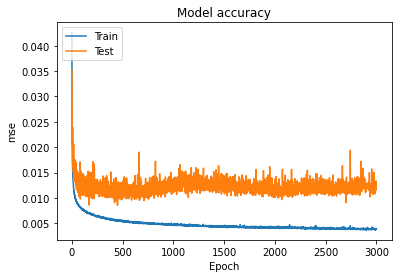

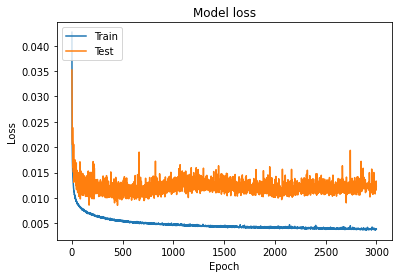

In [13]:
plot.plot(hist.history['mse'])
plot.plot(hist.history['val_mse'])
plot.title('Model accuracy')
plot.ylabel('mse')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(hist.history['loss'])
plot.plot(hist.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [82]:
eval_data = leerdato('dpruebasICC-CQC.txt')
resp_data = leerdato('rpruebas.txt')
print(len(eval_data))
print(len(resp_data))

59049
59049


In [83]:
# evaluamos el modelo
scores = model.evaluate(eval_data, resp_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(eval_data).round())

1846/1846 [==============================] - 2s 1ms/step - loss: 0.0053 - mse: 0.0053

mse: 0.53%
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [16]:
predictions = model.predict(eval_data)

In [17]:
for i in range(len(predictions)//10):
    for j in range(len(predictions[0])):
        print(round(((abs(predictions[i][j])-abs(resp_data[i][j]))*100),2),end="%   ")
    print(" ")

7.98%   -0.14%   2.4%   1.92%   5.6%    
0.57%   -1.63%   -0.85%   -1.11%   36.93%    
-0.53%   -1.98%   -0.46%   -0.79%   29.65%    
-0.79%   -2.06%   -0.37%   -0.72%   20.26%    
-0.88%   -2.08%   -0.34%   -0.7%   10.48%    
-0.93%   -2.1%   -0.32%   -0.69%   0.58%    
-0.95%   -2.1%   -0.32%   -0.68%   -9.38%    
-0.96%   -2.11%   -0.31%   -0.68%   -19.35%    
-0.96%   -2.11%   -0.31%   -0.68%   -29.33%    
5.31%   -1.95%   1.58%   -1.38%   2.02%    
2.87%   -1.59%   0.01%   1.37%   25.77%    
2.92%   -2.25%   0.03%   1.11%   20.22%    
2.94%   -2.41%   0.06%   1.06%   11.09%    
2.95%   -2.46%   0.07%   1.05%   1.4%    
2.96%   -2.49%   0.07%   1.04%   -8.46%    
2.96%   -2.5%   0.07%   1.04%   -18.39%    
2.96%   -2.51%   0.08%   1.03%   -28.36%    
2.96%   -2.51%   0.08%   1.03%   -38.33%    
5.58%   -1.43%   1.22%   3.77%   2.55%    
4.79%   -2.77%   0.44%   5.42%   24.24%    
4.69%   -3.63%   0.35%   5.65%   17.85%    
4.71%   -3.78%   0.38%   5.57%   8.69%    
4.72%   -3.83%  

0.24%   -2.56%   -0.29%   -25.1%   -43.96%    
4.51%   -2.1%   -4.7%   9.24%   -1.81%    
0.67%   -3.56%   2.87%   0.09%   2.26%    
0.97%   -3.03%   2.48%   0.2%   19.95%    
1.11%   -3.15%   2.57%   0.35%   11.87%    
1.16%   -3.19%   2.6%   0.4%   2.54%    
1.18%   -3.21%   2.62%   0.42%   -7.16%    
1.2%   -3.22%   2.63%   0.43%   -17.01%    
1.2%   -3.22%   2.63%   0.44%   -26.92%    
1.21%   -3.22%   2.63%   0.44%   -36.87%    
-0.72%   -0.12%   13.24%   4.9%   -0.26%    
0.04%   -1.91%   -1.4%   2.55%   25.66%    
-0.17%   -1.73%   -0.51%   3.43%   16.59%    
-0.22%   -1.72%   -0.74%   3.34%   8.72%    
-0.24%   -1.72%   -0.84%   3.3%   -0.49%    
-0.24%   -1.72%   -0.88%   3.29%   -10.14%    
-0.25%   -1.72%   -0.9%   3.28%   -19.97%    
-0.25%   -1.72%   -0.91%   3.28%   -29.87%    
-0.25%   -1.72%   -0.92%   3.27%   -39.81%    
2.02%   -6.52%   25.32%   -11.86%   -0.95%    
0.8%   -2.69%   1.9%   1.89%   18.63%    
0.55%   -2.4%   -0.67%   2.89%   16.62%    
0.5%   -2.33%   -

-1.88%   1.11%   5.33%   0.48%   3.98%    
-1.33%   0.45%   3.27%   0.66%   0.9%    
-1.53%   0.45%   2.58%   0.68%   3.43%    
-1.77%   0.73%   1.84%   0.75%   1.41%    
-1.88%   0.85%   1.51%   0.78%   -5.11%    
-1.93%   0.91%   1.35%   0.79%   -13.36%    
-1.96%   0.95%   1.26%   0.8%   -22.38%    
-1.98%   0.97%   1.2%   0.81%   -31.75%    
1.62%   7.66%   -1.91%   5.66%   4.52%    
-2.54%   2.41%   4.9%   -3.67%   3.49%    
-1.26%   0.88%   0.4%   -2.74%   5.12%    
-1.43%   1.18%   -1.74%   -2.35%   16.03%    
-0.77%   0.59%   -2.14%   -1.72%   9.25%    
-0.48%   0.33%   -2.33%   -1.32%   0.65%    
-0.34%   0.2%   -2.43%   -1.11%   -8.65%    
-0.26%   0.13%   -2.48%   -1.0%   -18.26%    
-0.21%   0.08%   -2.52%   -0.93%   -28.02%    
1.83%   6.17%   -2.45%   -3.99%   5.53%    
-0.45%   1.67%   5.25%   -8.49%   3.18%    
-0.41%   1.8%   1.79%   -4.44%   6.42%    
0.34%   1.25%   0.25%   -2.29%   17.78%    
0.59%   1.27%   0.39%   -1.36%   10.57%    
0.64%   1.31%   0.44%   -1.01%

-1.83%   -2.45%   -0.81%   -1.63%   -1.93%    
-1.82%   -2.39%   -0.79%   -1.45%   -9.27%    
-1.82%   -2.36%   -0.78%   -1.37%   -17.95%    
-1.81%   -2.34%   -0.77%   -1.32%   -27.22%    
-1.81%   -2.33%   -0.77%   -1.29%   -36.78%    
0.9%   -0.83%   -2.01%   -0.42%   2.08%    
1.88%   -3.62%   6.2%   -7.08%   4.4%    
-0.18%   -3.56%   2.19%   -4.29%   -4.48%    
-0.01%   -3.23%   2.04%   -3.5%   0.03%    
0.03%   -3.12%   1.72%   -3.1%   -4.16%    
0.05%   -3.07%   1.58%   -2.93%   -11.72%    
0.06%   -3.05%   1.52%   -2.84%   -20.5%    
0.07%   -3.03%   1.48%   -2.8%   -29.82%    
0.07%   -3.02%   1.46%   -2.77%   -39.42%    
-0.04%   -1.21%   -0.81%   8.36%   1.17%    
2.3%   -3.58%   3.65%   -2.61%   4.01%    
-0.05%   -3.52%   2.9%   -3.58%   -3.67%    
0.04%   -3.24%   2.75%   -3.53%   -0.6%    
0.05%   -3.16%   2.52%   -3.35%   -5.1%    
0.05%   -3.13%   2.43%   -3.28%   -12.79%    
0.05%   -3.11%   2.38%   -3.24%   -21.64%    
0.06%   -3.1%   2.35%   -3.22%   -31.0%    
0.0

-1.54%   -1.53%   0.18%   -3.03%   -13.65%    
-1.48%   -1.54%   0.23%   -2.94%   -23.53%    
0.13%   4.11%   -0.11%   -1.65%   1.07%    
1.01%   0.97%   0.47%   -3.34%   2.51%    
0.93%   -2.09%   -0.28%   -5.16%   -5.68%    
0.42%   -3.72%   -0.63%   -2.31%   5.67%    
-0.43%   -3.58%   -1.77%   -2.06%   14.97%    
-0.21%   -3.4%   -1.5%   -1.19%   7.49%    
-0.11%   -2.46%   -0.78%   -0.77%   -1.17%    
-0.19%   -2.34%   -0.82%   -0.56%   -10.35%    
-0.23%   -2.25%   -0.83%   -0.42%   -19.84%    
0.16%   4.01%   -0.32%   -3.77%   0.29%    
1.17%   -0.59%   -1.74%   2.91%   1.5%    
1.3%   -2.43%   3.73%   -5.49%   -5.0%    
0.84%   -1.55%   2.55%   -4.89%   2.88%    
-0.04%   -2.03%   0.85%   -5.49%   12.13%    
-0.37%   -2.26%   0.14%   -5.41%   9.33%    
-0.23%   -1.61%   0.77%   -4.92%   0.54%    
-0.27%   -1.61%   0.73%   -4.58%   -8.8%    
-0.29%   -1.6%   0.7%   -4.36%   -18.4%    
0.17%   3.93%   -0.15%   -9.76%   -0.13%    
0.85%   -1.14%   -2.88%   2.0%   0.91%    
1.17%  

0.31%   -1.56%   -1.83%   -0.74%   -3.49%    
-0.13%   -1.3%   -2.08%   -0.62%   -0.13%    
-0.46%   -1.29%   -1.96%   -0.68%   -0.45%    
-0.62%   -1.29%   -1.9%   -0.71%   -5.58%    
-0.71%   -1.28%   -1.87%   -0.72%   -12.87%    
-0.76%   -1.28%   -1.85%   -0.73%   -21.24%    
0.45%   3.51%   -25.1%   2.64%   -1.97%    
0.91%   1.52%   0.35%   7.13%   1.33%    
-0.68%   -1.81%   -0.6%   4.66%   -1.8%    
-1.25%   -0.58%   7.59%   0.94%   -0.81%    
-0.96%   -2.19%   6.43%   0.56%   -1.3%    
-1.36%   -3.0%   5.24%   0.28%   6.63%    
-1.53%   -3.19%   4.53%   0.2%   3.86%    
-1.57%   -3.13%   4.16%   0.16%   -4.85%    
-1.59%   -3.07%   3.94%   0.14%   -14.32%    
1.02%   3.67%   -26.85%   0.19%   -0.06%    
1.24%   -1.68%   3.69%   1.96%   -0.13%    
-0.0%   -3.27%   -9.17%   0.96%   0.65%    
0.49%   3.09%   -3.02%   0.73%   -0.18%    
0.1%   2.39%   -1.63%   0.22%   0.96%    
-0.2%   2.05%   -1.39%   0.79%   0.94%    
-0.37%   1.99%   -1.36%   1.15%   -4.59%    
-0.45%   1.96%  

0.35%   1.05%   2.01%   4.33%   -0.55%    
-0.11%   0.47%   0.96%   3.43%   0.95%    
-0.19%   0.16%   0.44%   3.42%   -6.24%    
-0.25%   0.09%   0.27%   3.51%   -14.54%    
0.67%   8.02%   13.43%   -9.13%   -1.88%    
-0.39%   3.32%   -0.24%   -1.97%   0.65%    
1.29%   -1.24%   -0.4%   0.18%   -0.55%    
1.41%   0.74%   -1.67%   -2.87%   -2.04%    
1.14%   0.94%   1.41%   0.86%   -1.95%    
0.7%   0.54%   1.86%   0.03%   -1.72%    
-0.12%   0.39%   1.13%   -1.13%   1.74%    
-0.22%   0.15%   0.63%   -1.05%   -6.17%    
-0.25%   -0.01%   0.34%   -1.02%   -14.69%    
0.64%   7.92%   13.56%   -17.88%   -2.09%    
-0.52%   3.4%   -0.3%   -6.76%   -0.0%    
2.13%   -2.81%   -4.75%   0.51%   -2.12%    
1.5%   0.81%   -1.75%   -7.84%   -1.71%    
1.33%   0.39%   1.07%   -2.11%   -3.66%    
0.79%   0.24%   1.4%   -2.17%   -2.53%    
-0.03%   0.17%   0.7%   -3.2%   0.71%    
-0.25%   -0.02%   0.26%   -3.32%   -5.95%    
-0.31%   -0.16%   -0.04%   -3.29%   -14.73%    
-0.98%   14.39%   4.44% 

-0.07%   12.81%   -0.32%   -11.79%   -29.66%    
0.12%   19.14%   1.15%   -22.12%   0.11%    
0.22%   9.1%   1.55%   -23.23%   16.95%    
0.11%   12.05%   0.22%   -21.65%   25.9%    
-0.12%   12.47%   -0.18%   -21.65%   19.78%    
-0.09%   12.73%   -0.26%   -21.63%   10.09%    
-0.08%   12.84%   -0.3%   -21.62%   0.23%    
-0.07%   12.89%   -0.32%   -21.61%   -9.71%    
-0.07%   12.93%   -0.33%   -21.61%   -19.67%    
-0.07%   12.94%   -0.33%   -21.61%   -29.64%    
-1.77%   1.38%   3.05%   -2.08%   -1.83%    
-1.18%   17.87%   3.36%   -1.39%   0.26%    
-0.68%   10.4%   2.24%   -1.81%   28.17%    
-0.64%   9.96%   2.41%   -1.67%   20.62%    
-0.62%   9.8%   2.48%   -1.62%   11.48%    
-0.62%   9.73%   2.5%   -1.6%   1.86%    
-0.61%   9.7%   2.52%   -1.59%   -7.95%    
-0.61%   9.68%   2.52%   -1.59%   -17.84%    
-0.61%   9.67%   2.53%   -1.58%   -27.77%    
1.12%   17.52%   6.08%   4.23%   -0.95%    
-1.38%   0.59%   0.6%   -0.01%   4.6%    
-1.38%   1.39%   0.02%   -0.72%   -4.0%  

0.25%   -6.71%   6.5%   1.96%   2.03%    
-0.09%   3.41%   6.1%   12.78%   4.42%    
-1.43%   0.11%   7.76%   5.07%   4.17%    
-1.07%   6.05%   11.45%   11.49%   3.29%    
-1.18%   8.91%   12.62%   13.3%   3.57%    
-0.99%   7.83%   13.94%   7.72%   6.44%    
-0.18%   0.67%   9.22%   2.84%   -0.51%    
0.07%   -0.93%   8.52%   1.87%   -8.71%    
0.92%   6.7%   0.58%   0.43%   -1.66%    
-0.1%   -6.93%   4.42%   -1.29%   1.86%    
-1.4%   0.47%   1.08%   16.19%   2.42%    
-1.4%   -0.55%   9.66%   2.42%   4.72%    
-1.08%   4.36%   10.29%   8.63%   0.1%    
-1.15%   4.36%   12.23%   9.66%   -2.49%    
-1.41%   3.09%   13.34%   7.82%   0.54%    
-0.83%   -1.07%   9.82%   4.37%   -4.26%    
-0.54%   -3.11%   7.97%   2.7%   -11.1%    
0.78%   6.47%   1.14%   -7.46%   -2.15%    
-0.22%   -6.93%   3.58%   -5.72%   1.48%    
-1.42%   0.59%   -1.46%   16.1%   2.19%    
0.66%   2.42%   7.0%   11.22%   6.47%    
1.33%   -1.96%   2.41%   0.18%   -4.09%    
0.87%   0.15%   0.68%   4.96%   -7.99% 

0.13%   -2.59%   0.93%   -1.64%   1.8%    
0.08%   -2.52%   1.15%   -1.49%   -6.63%    
0.04%   -2.48%   1.27%   -1.39%   -15.69%    
1.14%   -0.19%   23.67%   4.04%   -1.04%    
0.15%   -4.16%   0.42%   -0.26%   3.55%    
-1.54%   -2.55%   2.78%   0.65%   3.64%    
0.34%   2.91%   6.26%   1.28%   2.18%    
0.87%   2.36%   4.44%   1.93%   0.31%    
0.74%   1.32%   4.04%   1.99%   -2.23%    
0.5%   0.66%   3.74%   1.95%   -5.45%    
0.14%   0.03%   3.28%   1.95%   -9.37%    
-0.01%   -0.38%   3.2%   2.07%   -17.09%    
1.44%   2.07%   21.76%   1.14%   -0.49%    
1.01%   -0.01%   0.58%   5.02%   1.67%    
-0.62%   2.26%   4.63%   -0.37%   5.93%    
-0.74%   4.76%   6.87%   -0.08%   -2.0%    
-0.27%   5.53%   7.18%   1.44%   -4.19%    
0.14%   2.73%   6.11%   1.12%   -0.68%    
0.31%   0.86%   4.43%   0.49%   0.34%    
0.11%   0.37%   3.75%   0.75%   -4.03%    
0.08%   0.17%   3.49%   0.9%   -12.94%    
1.43%   0.44%   20.12%   4.43%   -1.41%    
0.14%   -2.29%   -0.54%   6.72%   2.63%   

-0.57%   -7.4%   1.19%   -1.27%   -26.95%    
-0.47%   -0.12%   2.38%   -0.78%   -1.18%    
-0.87%   -10.98%   2.68%   -3.47%   12.1%    
-0.29%   -10.11%   1.77%   -3.6%   25.21%    
-0.44%   -9.76%   1.52%   -4.05%   19.07%    
-0.49%   -9.63%   1.43%   -4.21%   10.42%    
-0.51%   -9.57%   1.4%   -4.27%   0.93%    
-0.5%   -9.52%   1.38%   -4.27%   -9.01%    
-0.5%   -9.5%   1.38%   -4.28%   -18.97%    
-0.49%   -9.48%   1.37%   -4.28%   -28.95%    
-0.31%   0.22%   1.57%   12.42%   -0.85%    
-0.21%   -9.64%   1.93%   10.37%   14.49%    
0.05%   -7.15%   0.86%   11.66%   25.25%    
-0.12%   -6.57%   0.64%   11.45%   19.2%    
-0.15%   -6.34%   0.57%   11.41%   10.34%    
-0.14%   -6.21%   0.55%   11.44%   0.48%    
-0.13%   -6.15%   0.54%   11.45%   -9.46%    
-0.12%   -6.11%   0.53%   11.46%   -19.42%    
-0.12%   -6.09%   0.53%   11.46%   -29.39%    
-0.02%   0.19%   1.15%   13.93%   -0.36%    
-0.09%   -8.71%   1.43%   13.35%   15.78%    
-0.1%   -5.8%   0.16%   15.08%   25.23% 

0.83%   4.16%   6.94%   -0.38%   3.17%    
0.98%   3.69%   5.62%   0.98%   1.15%    
0.78%   3.25%   5.06%   2.26%   -6.49%    
0.39%   2.81%   4.92%   2.85%   -8.2%    
1.43%   -7.57%   9.99%   5.89%   -0.73%    
0.5%   -0.75%   3.96%   2.17%   1.96%    
-0.08%   4.21%   4.12%   15.27%   2.04%    
-1.13%   8.96%   2.59%   5.83%   4.59%    
-1.35%   8.32%   7.73%   2.06%   4.32%    
-0.42%   8.43%   9.1%   5.03%   3.39%    
0.19%   6.37%   8.01%   4.68%   1.41%    
0.43%   4.95%   7.61%   4.17%   -2.38%    
0.76%   2.48%   5.81%   1.16%   -4.65%    
1.21%   -7.99%   11.0%   -0.3%   -1.4%    
0.6%   -1.84%   2.96%   -1.89%   1.33%    
-0.58%   4.05%   1.37%   11.15%   3.24%    
-1.69%   6.29%   6.09%   7.59%   4.26%    
-2.04%   2.76%   6.96%   7.22%   1.58%    
-0.7%   6.43%   6.58%   5.13%   3.06%    
-0.57%   6.57%   8.32%   5.74%   0.54%    
-0.42%   5.74%   8.02%   5.09%   -5.1%    
0.07%   1.74%   5.14%   0.33%   -5.52%    
1.08%   -8.23%   11.56%   -8.17%   -1.78%    
0.43%   -2.

1.11%   -8.73%   2.01%   -2.74%   0.11%    
-0.41%   -6.19%   2.61%   -7.21%   -1.75%    
0.29%   -8.14%   1.35%   -1.03%   -0.29%    
0.27%   -9.05%   1.25%   -2.22%   9.9%    
-0.07%   -9.22%   0.94%   -2.11%   13.4%    
0.0%   -8.96%   0.98%   -1.47%   5.11%    
0.04%   -8.83%   1.0%   -1.15%   -4.04%    
0.06%   -8.74%   1.01%   -1.01%   -13.59%    
0.08%   -8.65%   1.01%   -0.95%   -23.35%    
1.13%   -8.85%   2.07%   -8.74%   -0.37%    
0.0%   -5.92%   1.19%   0.16%   -0.83%    
0.47%   -8.05%   0.84%   3.86%   -0.38%    
0.2%   -9.01%   0.53%   3.3%   9.74%    
-0.22%   -9.25%   0.14%   3.18%   13.09%    
-0.16%   -8.98%   0.2%   3.24%   4.82%    
-0.13%   -8.85%   0.22%   3.27%   -4.31%    
-0.11%   -8.78%   0.24%   3.29%   -13.83%    
-0.09%   -8.72%   0.25%   3.29%   -23.61%    
1.15%   -8.91%   2.14%   -17.15%   -0.56%    
0.53%   -5.48%   0.72%   -3.18%   -0.01%    
0.88%   -7.81%   0.91%   0.23%   -0.44%    
0.58%   -8.77%   0.6%   -0.32%   9.92%    
0.17%   -9.02%   0.21%

-0.3%   -15.43%   -10.04%   -0.14%   -2.62%    
-0.34%   -17.66%   -9.5%   0.02%   -2.46%    
0.81%   -20.02%   -9.82%   -0.34%   19.55%    
0.7%   -18.46%   -9.68%   -0.88%   18.2%    
0.71%   -17.81%   -9.54%   -0.94%   8.95%    
0.71%   -17.53%   -9.48%   -0.96%   -0.72%    
0.72%   -17.38%   -9.45%   -0.97%   -10.55%    
0.72%   -17.3%   -9.43%   -0.98%   -20.46%    
0.72%   -17.25%   -9.42%   -0.98%   -30.4%    
2.64%   -22.65%   -10.44%   1.22%   0.0%    
1.18%   -15.22%   4.2%   3.33%   3.5%    
-0.09%   -10.31%   8.67%   0.28%   0.82%    
0.15%   -11.5%   6.22%   -0.32%   1.61%    
0.22%   -11.42%   6.02%   -0.11%   5.25%    
0.1%   -11.56%   5.95%   -0.16%   5.44%    
-0.09%   -11.73%   5.84%   0.01%   1.16%    
-0.19%   -11.78%   5.79%   0.12%   -5.68%    
-0.27%   -11.81%   5.78%   0.16%   -14.32%    
2.0%   -16.15%   -9.52%   3.32%   0.43%    
0.9%   -10.65%   3.79%   0.43%   0.33%    
2.01%   -7.14%   -1.65%   2.29%   1.58%    
0.23%   -2.6%   5.42%   1.73%   0.38%    
-0.

# Dataset SRSS

In [102]:
training_data = leerdato('datasetICC-SRSS.txt')
target_data = leerdato('respICC.txt')

In [103]:
junto=[]
for i in range(len(training_data)):
    junto.append(training_data[i]+target_data[i])

In [104]:
tf.random.shuffle(junto)

<tf.Tensor: shape=(59049, 11), dtype=float32, numpy=
array([[2.5374025e+01, 0.0000000e+00, 9.8159122e-01, ..., 2.0000000e-01,
        3.0000001e-01, 6.9999999e-01],
       [6.0148377e+00, 0.0000000e+00, 2.0879220e-02, ..., 5.0000000e-01,
        2.0000000e-01, 2.0000000e-01],
       [6.9059854e+00, 0.0000000e+00, 4.3647951e-01, ..., 2.0000000e-01,
        5.0000000e-01, 5.0000000e-01],
       ...,
       [2.2969746e+01, 0.0000000e+00, 7.1913823e-02, ..., 2.0000000e-01,
        3.0000001e-01, 5.0000000e-01],
       [1.4253345e+01, 0.0000000e+00, 3.0857965e-01, ..., 5.0000000e-01,
        1.0000000e-01, 4.0000001e-01],
       [2.2101208e+01, 0.0000000e+00, 1.3891150e+00, ..., 6.0000002e-01,
        4.0000001e-01, 8.9999998e-01]], dtype=float32)>

In [105]:
n=len(training_data[0])
na=len(junto[0])
#print(n)
#print(na)
junto=np.array(junto)
s_training_data = (junto[:,0:n]).tolist()
s_target_data = (junto[:,n:na]).tolist()

In [106]:
def create_model():
    model = Sequential()
    model.add(Dense(75, input_dim=len(s_training_data[0]), activation='relu'))
    model.add(Dense(150, input_dim=100, activation='relu'))
    model.add(Dense(75, input_dim=100, activation='relu'))
    model.add(Dense(len(s_target_data[0]), activation='linear', name="salida"))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
    model.summary()
    
    return model

def create_model2():
    model = Sequential()
    model.add(Dense(75, input_dim=len(s_training_data[0]), activation='relu'))
    model.add(Dense(150, input_dim=100, activation='relu'))
    model.add(Dense(75, input_dim=100, activation='relu'))
    model.add(Dense(len(s_target_data[0]), activation='linear', name="salida"))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
    model.summary()

    return model

def create_model3():
    model = Sequential()
    model.add(Dense(75, input_dim=len(s_training_data[0]), activation='relu'))
    model.add(Dense(100, input_dim=75, activation='relu'))    
    model.add(Dense(150, input_dim=100, activation='relu'))
    model.add(Dense(100, input_dim=150, activation='relu'))
    model.add(Dense(75, input_dim=100, activation='relu'))
    model.add(Dense(len(s_target_data[0]), activation='linear', name="salida"))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
    model.summary()
    
    return model

def create_model4():
    model = Sequential()
    model.add(Dense(100, input_dim=len(s_training_data[0]), activation='relu'))
    model.add(Dense(150, input_dim=100, activation='relu'))    
    model.add(Dense(150, input_dim=150, activation='relu'))
    model.add(Dense(100, input_dim=150, activation='relu'))
    model.add(Dense(75, input_dim=100, activation='relu'))
    model.add(Dense(len(s_target_data[0]), activation='linear', name="salida"))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
    model.summary()
    
    return model

In [107]:
model=create_model2()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 75)                525       
_________________________________________________________________
dense_17 (Dense)             (None, 150)               11400     
_________________________________________________________________
dense_18 (Dense)             (None, 75)                11325     
_________________________________________________________________
salida (Dense)               (None, 5)                 380       
Total params: 23,630
Trainable params: 23,630
Non-trainable params: 0
_________________________________________________________________


In [108]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

# Cargar Datos

In [109]:
checkpoint_path = "training_1/cp.ckpt"
model.load_weights(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

In [45]:
hist=model.fit(np.array(s_training_data),np.array(s_target_data), epochs=3000, validation_split=0.2,callbacks=[cp_callback])

Epoch 1/3000
1404/1477 [===========================>..] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00001: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 777us/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 2/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 00002: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 752us/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3/3000
1440/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 00003: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 750us/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 4/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00004: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 809us

1477/1477 [==============================] - 1s 764us/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 32/3000
1431/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00032: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 789us/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 33/3000
1454/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 00033: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 753us/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 34/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00034: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 757us/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 35/3000
1462/1477 [============================>.] - ETA: 0s -

Epoch 62/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 00062: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 754us/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 63/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00063: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 781us/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 64/3000
1436/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00064: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 787us/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 65/3000
1422/1477 [===========================>..] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 00065: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 7

Epoch 122/3000
1408/1477 [===========================>..] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00122: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 768us/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 123/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00123: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 752us/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 124/3000
1434/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00124: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 765us/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 125/3000
1409/1477 [===========================>..] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00125: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 

Epoch 152/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00152: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 782us/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 153/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00153: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 809us/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 154/3000
1453/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 00154: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 750us/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 155/3000
1425/1477 [===========================>..] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00155: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 

Epoch 182/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00182: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 742us/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 183/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042- ETA: 0s - loss: 0.0042 - mse: 0.0
Epoch 00183: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 777us/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 184/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00184: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 756us/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 185/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00185: saving model to training_1\cp.ckpt
1477/1477 

Epoch 212/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0043 - mse: 0.0043
Epoch 00212: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 857us/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 213/3000
1440/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00213: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 832us/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 214/3000
1429/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00214: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 870us/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 215/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041- ETA: 0s - loss: 0.0
Epoch 00215: saving model to training_1\cp.ckpt
1477/1477 [=============

Epoch 273/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042- ETA: 0s - loss: 0.0041 - ms - ETA: 0s - loss: 0.0042 - mse: 0.004 - ETA: 0s - loss: 0.0042 - mse: 
Epoch 00273: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 274/3000
1445/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042- ETA: 0s - loss: 0.0042 
Epoch 00274: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 275/3000
1451/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00275: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 276/3000
1465/1477 [============================>.] - ETA: 0s - l

1470/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042- ETA: 1s - loss: 
Epoch 00333: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 334/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00334: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 335/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00335: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 336/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00336: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 

1452/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041- ETA: 0s - loss: 0.0041 - mse: 0
Epoch 00393: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 394/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042- ETA: 1s -
Epoch 00394: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 395/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00395: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 396/3000
1453/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00396: saving model to training_1\cp.ckpt
1477/1477 [===========

Epoch 423/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00423: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 424/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00424: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 425/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041- ETA: 0s - loss: 0.004
Epoch 00425: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 426/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00426: saving model to training_1\cp.ckpt
1477/1477 [=================

Epoch 484/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00484: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 485/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00485: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 486/3000
1446/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00486: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 487/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00487: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms

Epoch 515/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00515: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 516/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00516: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 517/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00517: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 518/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00518: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms

1473/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00575: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 576/3000
1464/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00576: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 577/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00577: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 578/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00578: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0

Epoch 636/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00636: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 637/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00637: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 638/3000
1449/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00638: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 639/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00639: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms

Epoch 667/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00667: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 668/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042- ETA: 0s - loss: 0.0041 - mse: - ETA: 0s - loss: 0.0042 - mse: 0
Epoch 00668: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 669/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00669: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 670/3000
1455/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00670: saving model to train

Epoch 728/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0042 - mse: 0.0042
Epoch 00728: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 729/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00729: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 730/3000
1461/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00730: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 731/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00731: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms

Epoch 759/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00759: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 760/3000
1458/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00760: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 761/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00761: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 762/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00762: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms

Epoch 790/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00790: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 791/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00791: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 792/3000
1458/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00792: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 793/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00793: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms

Epoch 821/3000
1458/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00821: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 822/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00822: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 823/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00823: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 824/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00824: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms

Epoch 852/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00852: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 853/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00853: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 854/3000
1427/1477 [===========================>..] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00854: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 855/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00855: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms

Epoch 913/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 00913: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 914/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00914: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 915/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00915: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 916/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00916: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms

Epoch 944/3000
1450/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00944: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 945/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00945: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 946/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00946: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 947/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00947: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms

Epoch 975/3000
1475/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00975: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 976/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00976: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 977/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 00977: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 978/3000
1468/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 00978: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms

Epoch 1006/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01006: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1007/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 01007: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 1008/3000
1462/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01008: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1009/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 01009: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s

Epoch 1037/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01037: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 3ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 1038/3000
1446/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01038: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 1039/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01039: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1040/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01040: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s

Epoch 1068/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01068: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 1069/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01069: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1070/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 01070: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1071/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01071: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 4s

Epoch 1099/3000
1474/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01099: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 6s 4ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1100/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01100: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 4ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1101/3000
1463/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01101: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s 3ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1102/3000
1465/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01102: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 5s

Epoch 1130/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 01130: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 1131/3000
1457/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 01131: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1132/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01132: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 2s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1133/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039- ETA: 0s - loss: 0.0040 - mse: 0.0
Epoch 01133: saving model to training_1\cp.ckpt
1477/1477 [=

Epoch 1191/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01191: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1192/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01192: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 1193/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01193: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1194/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01194: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 3s

1460/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01251: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 741us/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 1252/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01252: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 802us/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1253/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01253: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 784us/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1254/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01254: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 720us/ste

Epoch 1311/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01311: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 793us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1312/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01312: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 731us/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1313/3000
1473/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01313: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 769us/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1314/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01314: saving model to training_1\cp.ckpt
1477/1477 [==============================

1446/1477 [============================>.] - ETA: 0s - loss: 0.0041 - mse: 0.0041
Epoch 01371: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 752us/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1372/3000
1453/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01372: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 748us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1373/3000
1419/1477 [===========================>..] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01373: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 771us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1374/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01374: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 806us/ste

Epoch 1401/3000
1440/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01401: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 910us/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1402/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01402: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 834us/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 1403/3000
1414/1477 [===========================>..] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01403: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 803us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 1404/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01404: saving model to training_1\cp.ckpt
1477/1477 [==============================

Epoch 1431/3000
1440/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01431: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 960us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 1432/3000
1426/1477 [===========================>..] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01432: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 973us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1433/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01433: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 963us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1434/3000
1424/1477 [===========================>..] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01434: saving model to training_1\cp.ckpt
1477/1477 [==============================

1457/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01491: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 805us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1492/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01492: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 834us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1493/3000
1414/1477 [===========================>..] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01493: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 839us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1494/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01494: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 818us/ste

1467/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01551: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 804us/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 1552/3000
1407/1477 [===========================>..] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01552: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 839us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 1553/3000
1416/1477 [===========================>..] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01553: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 826us/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1554/3000
1470/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039- ETA: 0s - loss: 0.0039 - mse: 0.00
Epoch 01554: saving model to training_1\cp.ckpt
1477/1477 [==========

1462/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01611: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 835us/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 1612/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01612: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 851us/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 1613/3000
1437/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 01613: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 818us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1614/3000
1448/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01614: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 824us/ste

1440/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01671: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 839us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1672/3000
1428/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01672: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 846us/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1673/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 01673: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 907us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 1674/3000
1416/1477 [===========================>..] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01674: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 786us/ste

1409/1477 [===========================>..] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01730: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 775us/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1731/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 01731: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 766us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1732/3000
1417/1477 [===========================>..] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01732: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 770us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 1733/3000
1406/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 01733: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 801us/ste

1471/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 01760: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 799us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 1761/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01761: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 770us/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 1762/3000
1407/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 01762: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 780us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1763/3000
1422/1477 [===========================>..] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01763: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 780us/ste

1411/1477 [===========================>..] - ETA: 0s - loss: 0.0041 - mse: 0.0041- ETA: 0s - loss: 0.0044
Epoch 01820: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 760us/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 1821/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01821: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 802us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 1822/3000
1431/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 01822: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 773us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1823/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 01823: saving model to training_1\cp.ckpt
1477/1477 [======================

1401/1477 [===========================>..] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01880: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 783us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 1881/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01881: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 763us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 1882/3000
1471/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 01882: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 772us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 1883/3000
1459/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 01883: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 916us/ste

Epoch 1940/3000
1414/1477 [===========================>..] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01940: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 777us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 1941/3000
1400/1477 [===========================>..] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 01941: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 741us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 1942/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 01942: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 757us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 1943/3000
1408/1477 [===========================>..] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 01943: saving model to training_1\cp.ckpt
1477/1477 [==============================

1463/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02000: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 798us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 2001/3000
1427/1477 [===========================>..] - ETA: 0s - loss: 0.0040 - mse: 0.0040
Epoch 02001: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 781us/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 2002/3000
1438/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02002: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 777us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2003/3000
1453/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02003: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 757us/ste

1433/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02060: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 783us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2061/3000
1400/1477 [===========================>..] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02061: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 776us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 2062/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02062: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 766us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 2063/3000
1399/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02063: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 762us/ste

1468/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02120: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 767us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 2121/3000
1460/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02121: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 761us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2122/3000
1442/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02122: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 746us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2123/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02123: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 752us/ste

1475/1477 [============================>.] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02180: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 832us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 2181/3000
1423/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02181: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 745us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 2182/3000
1413/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02182: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 744us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 2183/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02183: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 798us/ste

1418/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02240: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 739us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 2241/3000
1399/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02241: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 747us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 2242/3000
1441/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02242: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 778us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2243/3000
1408/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02243: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 756us/ste

1423/1477 [===========================>..] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02300: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 817us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2301/3000
1445/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02301: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 768us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 2302/3000
1421/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02302: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 741us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2303/3000
1393/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02303: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 756us/ste

1435/1477 [============================>.] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02360: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 739us/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 2361/3000
1396/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02361: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 748us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2362/3000
1411/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02362: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 750us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 2363/3000
1467/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02363: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 773us/ste

1398/1477 [===========================>..] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02420: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 750us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 2421/3000
1404/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02421: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 801us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2422/3000
1400/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02422: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 755us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 2423/3000
1443/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02423: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 943us/ste

1399/1477 [===========================>..] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02480: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 757us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2481/3000
1456/1477 [============================>.] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02481: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 820us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 2482/3000
1423/1477 [===========================>..] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02482: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 855us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2483/3000
1417/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02483: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 870us/ste

1411/1477 [===========================>..] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02540: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 745us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 2541/3000
1472/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02541: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 752us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 2542/3000
1436/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02542: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 747us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 2543/3000
1469/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02543: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 833us/ste

1446/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02600: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 768us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 2601/3000
1416/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02601: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 783us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 2602/3000
1444/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02602: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 737us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 2603/3000
1477/1477 [==============================] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02603: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 747us/ste

1430/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02660: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 890us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2661/3000
1412/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02661: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 906us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2662/3000
1429/1477 [============================>.] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02662: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 913us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2663/3000
1421/1477 [===========================>..] - ETA: 0s - loss: 0.0039 - mse: 0.0039
Epoch 02663: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 935us/ste

Epoch 2690/3000
1420/1477 [===========================>..] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02690: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 740us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 2691/3000
1447/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02691: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 764us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 2692/3000
1442/1477 [============================>.] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02692: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 776us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 2693/3000
1452/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02693: saving model to training_1\cp.ckpt
1477/1477 [==============================

1401/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02750: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 793us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2751/3000
1476/1477 [============================>.] - ETA: 0s - loss: 0.0036 - mse: 0.0036
Epoch 02751: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 798us/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 2752/3000
1417/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02752: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 751us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2753/3000
1413/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02753: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 771us/ste

1447/1477 [============================>.] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02810: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 769us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2811/3000
1406/1477 [===========================>..] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02811: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 763us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 2812/3000
1411/1477 [===========================>..] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02812: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 751us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2813/3000
1401/1477 [===========================>..] - ETA: 0s - loss: 0.0037 - mse: 0.0037- ETA: 0s - loss: 0.003
Epoch 02813: saving model to training_1\cp.ckpt
1477/1477 [=======================

1474/1477 [============================>.] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02870: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 760us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 2871/3000
1436/1477 [============================>.] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02871: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 782us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 2872/3000
1413/1477 [===========================>..] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02872: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 788us/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 2873/3000
1423/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02873: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 842us/ste

1451/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02930: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 764us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2931/3000
1439/1477 [============================>.] - ETA: 0s - loss: 0.0038 - mse: 0.0038- ETA: 0s - loss: 0.0039 - mse: 0.003
Epoch 02931: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 854us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 2932/3000
1466/1477 [============================>.] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02932: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 968us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 2933/3000
1419/1477 [===========================>..] - ETA: 0s - loss: 0.0038 - mse: 0.0038
Epoch 02933: saving model to training_1\cp.ckpt
1477/1477 [=========

Epoch 2960/3000
1391/1477 [===========================>..] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02960: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 748us/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 2961/3000
1427/1477 [===========================>..] - ETA: 0s - loss: 0.0036 - mse: 0.0036
Epoch 02961: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 772us/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 2962/3000
1397/1477 [===========================>..] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02962: saving model to training_1\cp.ckpt
1477/1477 [==============================] - 1s 750us/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 2963/3000
1407/1477 [===========================>..] - ETA: 0s - loss: 0.0037 - mse: 0.0037
Epoch 02963: saving model to training_1\cp.ckpt
1477/1477 [==============================

In [110]:
# evaluamos el modelo
scores = model.evaluate(s_training_data, s_target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(s_training_data).round())

1846/1846 [==============================] - 2s 1ms/step - loss: 0.0047 - mse: 0.0047

mse: 0.47%
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [106]:
plot.plot(hist.history['mae'])
plot.plot(hist.history['val_mae'])
plot.title('Model accuracy')
plot.ylabel('mae')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(hist.history['loss'])
plot.plot(hist.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

NameError: name 'hist' is not defined

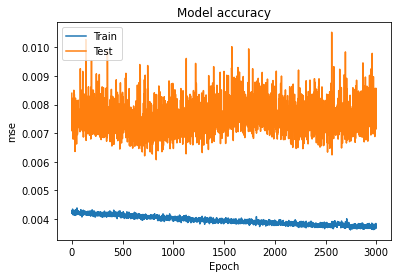

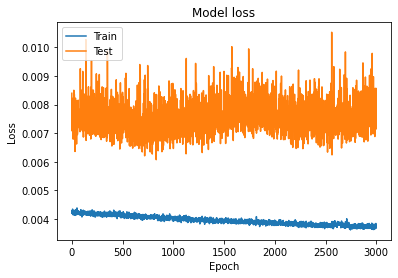

In [47]:
plot.plot(hist.history['mse'])
plot.plot(hist.history['val_mse'])
plot.title('Model accuracy')
plot.ylabel('mse')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(hist.history['loss'])
plot.plot(hist.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [112]:
eval_data = leerdato('dpruebasICC-SRSS.txt')
resp_data = leerdato('rpruebas.txt')
print(len(eval_data))
print(len(resp_data))

59049
59049


In [113]:
# evaluamos el modelo
scores = model.evaluate(eval_data, resp_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(eval_data).round())

1846/1846 [==============================] - 3s 1ms/step - loss: 0.0047 - mse: 0.0047

mse: 0.47%
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [114]:
predictions = model.predict(eval_data)

In [115]:
for i in range(len(predictions)//10):
    for j in range(len(predictions[0])):
        print(round(((abs(predictions[i][j])-abs(resp_data[i][j]))*100),2),end="%   ")
    print(" ")

-0.27%   4.21%   4.15%   2.95%   -6.16%    
-0.36%   0.88%   -1.92%   1.65%   32.06%    
-0.25%   1.54%   -0.98%   1.0%   29.01%    
-0.2%   1.61%   -0.62%   0.83%   21.35%    
-0.18%   1.64%   -0.5%   0.77%   12.17%    
-0.17%   1.65%   -0.44%   0.74%   2.54%    
-0.17%   1.65%   -0.42%   0.73%   -7.28%    
-0.17%   1.66%   -0.4%   0.72%   -17.18%    
-0.17%   1.66%   -0.39%   0.72%   -27.11%    
-2.38%   10.11%   -7.46%   6.78%   -5.14%    
-3.08%   1.9%   2.55%   10.47%   25.74%    
-2.98%   1.47%   2.87%   10.61%   18.19%    
-2.96%   1.36%   2.93%   10.66%   8.78%    
-2.96%   1.31%   2.94%   10.67%   -1.0%    
-2.95%   1.29%   2.94%   10.68%   -10.9%    
-2.95%   1.28%   2.95%   10.69%   -20.85%    
-2.95%   1.27%   2.95%   10.69%   -30.83%    
-2.95%   1.27%   2.95%   10.69%   -40.81%    
-3.34%   1.79%   -6.12%   2.09%   0.11%    
-2.22%   -1.58%   0.72%   3.73%   29.41%    
-2.14%   -1.99%   1.04%   4.07%   21.7%    
-2.12%   -2.09%   1.12%   4.14%   12.23%    
-2.12%   -2.12%

0.68%   -2.73%   12.83%   1.62%   -14.03%    
0.68%   -2.73%   12.81%   1.61%   -23.76%    
0.68%   -2.73%   12.8%   1.6%   -33.59%    
2.59%   3.61%   12.87%   -0.49%   1.83%    
3.58%   -0.79%   8.71%   -0.93%   20.98%    
3.65%   -0.35%   6.7%   -0.97%   19.73%    
3.66%   -0.25%   6.23%   -0.97%   11.68%    
3.67%   -0.21%   6.06%   -0.97%   2.36%    
3.67%   -0.19%   5.99%   -0.97%   -7.34%    
3.67%   -0.18%   5.96%   -0.97%   -17.19%    
3.67%   -0.18%   5.93%   -0.97%   -27.1%    
3.67%   -0.18%   5.92%   -0.97%   -37.05%    
1.58%   0.42%   10.93%   20.07%   3.12%    
2.37%   -0.38%   9.33%   4.29%   24.65%    
2.53%   -0.07%   7.3%   3.63%   21.58%    
2.57%   -0.0%   6.84%   3.48%   13.14%    
2.58%   0.02%   6.67%   3.43%   3.68%    
2.58%   0.03%   6.6%   3.41%   -6.08%    
2.59%   0.04%   6.57%   3.4%   -15.96%    
2.59%   0.04%   6.55%   3.4%   -25.89%    
2.59%   0.04%   6.55%   3.39%   -35.85%    
1.49%   -0.84%   11.23%   27.86%   4.12%    
1.25%   -1.86%   6.44%   21

1.23%   -2.42%   6.2%   16.42%   4.27%    
1.24%   -2.41%   6.13%   16.39%   -5.5%    
1.24%   -2.41%   6.1%   16.37%   -15.39%    
1.24%   -2.41%   6.08%   16.36%   -25.33%    
1.24%   -2.41%   6.07%   16.36%   -35.29%    
2.2%   -0.36%   -1.49%   8.08%   4.13%    
0.94%   -2.74%   8.81%   10.67%   26.28%    
1.08%   -2.53%   7.01%   9.87%   22.46%    
1.11%   -2.47%   6.57%   9.67%   13.91%    
1.13%   -2.45%   6.42%   9.6%   4.42%    
1.13%   -2.44%   6.35%   9.57%   -5.36%    
1.14%   -2.44%   6.32%   9.56%   -15.24%    
1.14%   -2.44%   6.3%   9.55%   -25.18%    
1.14%   -2.43%   6.29%   9.55%   -35.14%    
2.19%   -0.37%   -1.36%   -1.19%   4.19%    
0.89%   -2.75%   8.91%   2.44%   26.42%    
1.02%   -2.54%   7.13%   1.66%   22.54%    
1.06%   -2.49%   6.69%   1.46%   14.0%    
1.07%   -2.47%   6.54%   1.39%   4.5%    
1.07%   -2.46%   6.47%   1.36%   -5.27%    
1.08%   -2.45%   6.44%   1.34%   -15.16%    
1.08%   -2.45%   6.42%   1.34%   -25.1%    
1.08%   -2.45%   6.41%   1.33

4.25%   -3.32%   -18.67%   3.2%   -36.25%    
2.5%   0.87%   -32.58%   19.66%   2.01%    
3.03%   -2.93%   -14.18%   3.71%   25.07%    
3.2%   -2.6%   -15.95%   2.59%   21.84%    
3.24%   -2.52%   -16.36%   2.35%   13.37%    
3.25%   -2.49%   -16.5%   2.26%   3.9%    
3.26%   -2.48%   -16.57%   2.22%   -5.87%    
3.26%   -2.48%   -16.6%   2.2%   -15.75%    
3.27%   -2.47%   -16.62%   2.19%   -25.68%    
3.27%   -2.47%   -16.63%   2.19%   -35.64%    
2.52%   -0.09%   -31.71%   27.27%   2.98%    
1.94%   -2.91%   -15.34%   15.88%   24.96%    
2.11%   -2.66%   -17.15%   15.06%   21.55%    
2.15%   -2.61%   -17.57%   14.88%   13.04%    
2.17%   -2.59%   -17.72%   14.82%   3.55%    
2.17%   -2.58%   -17.78%   14.79%   -6.22%    
2.18%   -2.57%   -17.82%   14.77%   -16.1%    
2.18%   -2.57%   -17.83%   14.77%   -26.04%    
2.18%   -2.57%   -17.85%   14.76%   -36.0%    
2.5%   -0.13%   -30.6%   24.11%   3.54%    
1.38%   -2.93%   -15.31%   19.89%   25.48%    
1.55%   -2.68%   -17.17%   19.02%

1.31%   0.96%   -4.33%   1.33%   -0.79%    
1.31%   0.98%   -4.35%   1.29%   -9.77%    
1.31%   0.98%   -4.36%   1.26%   -19.25%    
1.31%   0.99%   -4.37%   1.25%   -28.96%    
1.31%   0.99%   -4.37%   1.24%   -38.79%    
1.25%   4.16%   1.53%   -5.62%   1.75%    
1.17%   -6.42%   1.58%   -3.99%   0.42%    
0.74%   -1.65%   2.4%   -1.7%   7.52%    
0.38%   -1.83%   1.73%   -2.18%   14.27%    
0.16%   -1.83%   1.21%   -2.62%   12.89%    
0.07%   -1.82%   0.99%   -2.81%   6.59%    
0.02%   -1.82%   0.87%   -2.9%   -1.55%    
-0.0%   -1.82%   0.81%   -2.95%   -10.51%    
-0.02%   -1.82%   0.77%   -2.98%   -19.89%    
1.67%   1.19%   20.23%   -1.73%   -0.62%    
1.02%   0.76%   7.5%   4.78%   -2.81%    
0.4%   5.2%   1.45%   1.88%   10.56%    
-0.13%   5.61%   0.08%   0.86%   21.94%    
-0.3%   5.75%   -0.39%   0.59%   18.54%    
-0.36%   5.81%   -0.59%   0.48%   11.3%    
-0.4%   5.84%   -0.69%   0.43%   2.67%    
-0.42%   5.86%   -0.75%   0.4%   -6.57%    
-0.43%   5.87%   -0.78%   0.38

0.29%   -3.35%   -0.15%   7.27%   11.41%    
0.3%   -3.31%   -0.42%   7.14%   3.89%    
0.3%   -3.28%   -0.56%   7.08%   -4.88%    
0.3%   -3.27%   -0.64%   7.04%   -14.2%    
0.31%   -3.26%   -0.68%   7.02%   -23.79%    
1.25%   0.46%   6.56%   -0.24%   1.29%    
1.31%   1.5%   3.91%   -1.23%   -1.88%    
1.03%   1.97%   3.6%   -2.07%   7.3%    
0.94%   2.01%   3.47%   -2.26%   4.09%    
0.9%   2.02%   3.43%   -2.33%   -3.52%    
0.89%   2.03%   3.41%   -2.36%   -12.46%    
0.88%   2.03%   3.39%   -2.37%   -21.93%    
0.88%   2.03%   3.39%   -2.38%   -31.63%    
0.87%   2.04%   3.39%   -2.39%   -41.45%    
1.23%   1.91%   0.4%   -6.57%   2.63%    
0.65%   -6.36%   4.49%   0.6%   -2.06%    
0.35%   -2.77%   1.39%   0.09%   7.16%    
-0.21%   -2.33%   0.21%   -1.4%   13.26%    
-0.51%   -2.24%   0.68%   -1.93%   14.0%    
-0.64%   -2.21%   0.88%   -2.15%   8.61%    
-0.7%   -2.19%   0.99%   -2.26%   0.92%    
-0.74%   -2.18%   1.05%   -2.33%   -7.79%    
-0.76%   -2.18%   1.08%   -2.36%

1.28%   1.0%   1.04%   0.17%   -14.68%    
1.28%   0.99%   0.97%   0.14%   -24.25%    
1.52%   0.54%   -19.96%   1.79%   -1.03%    
1.52%   1.06%   2.53%   4.26%   -0.99%    
0.7%   0.46%   5.2%   3.47%   5.73%    
0.47%   0.14%   1.74%   2.97%   15.65%    
0.42%   0.16%   0.6%   2.87%   11.7%    
0.41%   0.3%   0.09%   2.85%   4.25%    
0.4%   0.36%   -0.17%   2.83%   -4.49%    
0.4%   0.4%   -0.32%   2.83%   -13.79%    
0.39%   0.42%   -0.4%   2.83%   -23.37%    
1.48%   0.39%   -20.06%   -4.13%   -1.05%    
0.99%   0.5%   0.79%   7.05%   -0.13%    
-0.03%   -0.54%   3.76%   6.7%   6.66%    
-0.2%   -0.29%   0.19%   6.18%   16.31%    
-0.22%   0.02%   -1.01%   6.09%   12.3%    
-0.23%   0.16%   -1.52%   6.06%   4.8%    
-0.24%   0.22%   -1.77%   6.04%   -3.96%    
-0.24%   0.26%   -1.91%   6.03%   -13.27%    
-0.24%   0.28%   -1.99%   6.03%   -22.86%    
1.45%   0.31%   -20.11%   -11.95%   -1.07%    
0.53%   -0.15%   -0.71%   8.78%   0.55%    
-0.67%   -1.45%   2.33%   9.8%   6.84%  

0.94%   3.06%   0.42%   2.26%   -0.3%    
1.81%   -2.74%   3.36%   -1.55%   13.73%    
1.8%   -3.12%   3.61%   -2.53%   17.51%    
1.72%   -3.18%   3.55%   -2.97%   13.76%    
1.69%   -3.21%   3.53%   -3.16%   6.47%    
1.68%   -3.22%   3.51%   -3.26%   -2.17%    
1.67%   -3.23%   3.51%   -3.31%   -11.41%    
1.66%   -3.23%   3.5%   -3.34%   -20.95%    
1.84%   6.63%   -0.09%   0.82%   -0.63%    
1.67%   0.79%   -0.08%   -2.9%   -4.74%    
2.5%   1.2%   2.05%   -1.22%   8.23%    
2.91%   -0.37%   2.85%   -0.92%   10.66%    
2.47%   -0.26%   1.74%   -1.84%   13.12%    
2.17%   -0.12%   0.98%   -2.41%   11.56%    
2.01%   -0.04%   0.59%   -2.7%   5.8%    
1.93%   0.0%   0.38%   -2.86%   -1.84%    
1.9%   0.01%   0.3%   -2.91%   -11.03%    
1.98%   5.01%   0.03%   -1.93%   -1.14%    
1.82%   -1.7%   -1.61%   5.49%   -3.16%    
2.84%   -0.18%   0.76%   6.92%   6.86%    
2.71%   -1.04%   0.43%   5.8%   6.49%    
1.85%   -1.44%   -0.16%   5.76%   10.47%    
1.37%   -1.5%   -0.64%   5.57%   9

0.52%   -6.35%   -3.1%   -4.33%   11.46%    
0.21%   -6.24%   -3.34%   -4.03%   16.31%    
0.1%   -6.36%   -3.65%   -4.45%   13.92%    
0.05%   -6.39%   -3.79%   -4.63%   7.5%    
0.02%   -6.36%   -3.84%   -4.67%   -0.55%    
0.0%   -6.34%   -3.87%   -4.7%   -9.4%    
1.41%   2.4%   8.55%   -0.5%   1.55%    
1.22%   2.18%   7.0%   0.03%   -0.22%    
1.13%   2.72%   7.32%   -1.19%   5.38%    
1.1%   2.8%   7.44%   -1.54%   2.12%    
1.08%   2.87%   7.41%   -1.59%   -4.19%    
1.07%   2.91%   7.38%   -1.59%   -12.2%    
1.06%   2.93%   7.36%   -1.59%   -21.18%    
1.06%   2.94%   7.35%   -1.6%   -30.62%    
1.05%   2.95%   7.35%   -1.6%   -40.27%    
1.08%   3.81%   8.82%   -5.79%   2.22%    
2.18%   0.75%   0.47%   1.37%   -3.81%    
1.77%   1.57%   -0.86%   -0.29%   2.92%    
1.54%   0.71%   -0.65%   -0.73%   6.68%    
1.43%   0.24%   0.13%   -0.87%   5.43%    
1.28%   0.13%   0.26%   -1.08%   1.53%    
1.21%   0.08%   0.23%   -1.22%   -5.15%    
1.18%   0.06%   0.03%   -1.34%   -12.85

1.67%   -2.47%   4.38%   4.75%   -11.73%    
1.5%   2.62%   -12.51%   -10.19%   -1.3%    
0.37%   -2.79%   0.96%   -1.76%   -4.21%    
0.44%   -4.48%   5.97%   -0.51%   -0.6%    
1.33%   -3.5%   5.77%   -0.85%   -0.64%    
1.53%   -3.55%   3.29%   -1.96%   7.33%    
1.53%   -3.63%   2.15%   -2.22%   8.18%    
1.51%   -3.68%   1.58%   -1.89%   3.2%    
1.5%   -3.72%   1.26%   -1.48%   -4.12%    
1.49%   -3.74%   1.08%   -1.23%   -12.54%    
1.47%   2.54%   -12.61%   -17.85%   -1.32%    
0.3%   -2.93%   1.44%   -8.43%   -4.07%    
0.68%   -3.15%   6.36%   -2.13%   0.05%    
0.99%   -2.8%   5.04%   -0.49%   -1.02%    
0.81%   -3.23%   2.84%   -0.44%   8.87%    
0.81%   -3.29%   1.69%   -0.68%   9.36%    
0.81%   -3.31%   1.12%   -0.78%   4.23%    
0.81%   -3.32%   0.81%   -0.82%   -3.16%    
0.81%   -3.32%   0.62%   -0.85%   -11.63%    
1.46%   2.49%   -12.67%   -26.44%   -1.33%    
0.25%   -3.01%   1.72%   -16.38%   -3.98%    
0.83%   -2.35%   6.51%   -7.17%   0.43%    
0.9%   -2.28%   5

1.07%   2.42%   -7.59%   -8.78%   8.22%    
1.07%   2.11%   -8.37%   -9.38%   2.75%    
1.08%   1.94%   -8.99%   -9.72%   -4.79%    
1.09%   1.84%   -9.4%   -9.9%   -13.33%    
0.92%   22.27%   -1.77%   2.76%   -1.68%    
1.06%   24.42%   -0.12%   1.93%   19.96%    
0.91%   24.75%   -0.27%   1.35%   20.3%    
0.88%   24.83%   -0.31%   1.22%   12.73%    
0.86%   24.86%   -0.32%   1.17%   3.59%    
0.86%   24.87%   -0.33%   1.15%   -6.03%    
0.85%   24.88%   -0.33%   1.14%   -15.84%    
0.85%   24.88%   -0.33%   1.13%   -25.73%    
0.85%   24.88%   -0.33%   1.13%   -35.66%    
1.39%   13.29%   6.02%   -4.22%   0.01%    
1.89%   13.79%   3.81%   -0.5%   2.12%    
1.56%   14.51%   3.63%   -1.36%   9.44%    
1.37%   14.78%   3.36%   -1.73%   6.21%    
1.3%   14.87%   3.26%   -1.86%   -1.4%    
1.27%   14.92%   3.22%   -1.92%   -10.35%    
1.25%   14.94%   3.2%   -1.95%   -19.81%    
1.24%   14.95%   3.19%   -1.97%   -29.51%    
1.24%   14.96%   3.18%   -1.98%   -39.33%    
0.98%   17.07%  

1.11%   -1.12%   -1.7%   -2.07%   3.92%    
1.11%   -1.35%   -2.03%   -2.28%   2.34%    
1.11%   -1.48%   -2.04%   -2.39%   -3.44%    
1.11%   -1.55%   -2.05%   -2.45%   -11.08%    
1.1%   -1.59%   -2.05%   -2.49%   -19.67%    
0.9%   15.73%   17.89%   -2.02%   -0.7%    
-0.47%   2.54%   6.34%   0.88%   -1.75%    
1.54%   -3.11%   2.12%   -2.87%   -3.56%    
1.57%   -1.18%   -0.49%   -1.9%   -1.1%    
1.45%   -2.25%   -3.2%   -2.24%   -0.51%    
1.28%   -2.77%   -3.2%   -2.39%   0.11%    
1.08%   -2.92%   -2.97%   -2.66%   -1.71%    
0.97%   -3.0%   -2.79%   -2.82%   -7.21%    
0.9%   -3.06%   -2.68%   -2.91%   -14.52%    
1.01%   14.82%   17.26%   -6.21%   -0.81%    
1.46%   1.09%   -5.1%   1.01%   -4.39%    
0.72%   -3.09%   -0.07%   -3.59%   -11.58%    
1.59%   -4.39%   0.33%   0.3%   -0.73%    
1.5%   -6.68%   -2.99%   -3.49%   1.33%    
1.46%   -6.71%   -3.46%   -4.05%   3.09%    
1.22%   -6.34%   -4.04%   -4.38%   3.23%    
1.09%   -6.13%   -4.36%   -4.55%   -1.29%    
1.02%   -6

0.74%   -5.04%   3.51%   0.79%   2.28%    
0.22%   -5.79%   2.64%   -0.48%   2.86%    
0.05%   -5.92%   2.35%   -1.1%   1.17%    
-0.05%   -5.99%   2.17%   -1.46%   -4.07%    
0.95%   13.93%   -10.59%   -5.59%   -0.38%    
1.22%   -4.08%   3.32%   1.08%   -4.44%    
0.39%   -5.76%   -3.26%   5.38%   -1.75%    
0.4%   0.76%   10.95%   5.49%   0.03%    
0.11%   3.42%   7.43%   7.08%   6.28%    
-0.01%   2.41%   5.43%   5.94%   5.83%    
-0.31%   2.18%   3.96%   4.67%   9.05%    
-0.47%   2.07%   3.19%   4.05%   5.69%    
-0.56%   2.01%   2.74%   3.7%   -0.55%    
0.9%   13.8%   -10.47%   -11.27%   -0.38%    
1.12%   -3.49%   3.95%   1.2%   -3.64%    
0.69%   -6.29%   -3.03%   2.42%   -1.15%    
-0.25%   -1.44%   5.73%   3.56%   0.63%    
0.33%   1.72%   3.54%   6.36%   5.64%    
0.31%   0.47%   2.69%   7.42%   7.97%    
0.09%   0.45%   1.36%   6.59%   9.31%    
-0.02%   0.46%   0.69%   6.23%   4.97%    
-0.09%   0.47%   0.29%   6.01%   -1.84%    
0.87%   13.72%   -10.41%   -18.85%   -0.3

0.51%   18.74%   -0.43%   0.92%   -25.47%    
0.51%   18.74%   -0.43%   0.92%   -35.4%    
1.3%   4.46%   6.03%   -4.41%   0.06%    
1.87%   4.98%   3.93%   -0.65%   2.15%    
1.55%   5.7%   3.76%   -1.5%   9.45%    
1.35%   5.98%   3.48%   -1.87%   6.24%    
1.28%   6.07%   3.39%   -2.0%   -1.37%    
1.25%   6.11%   3.34%   -2.06%   -10.32%    
1.24%   6.14%   3.32%   -2.09%   -19.78%    
1.23%   6.15%   3.31%   -2.11%   -29.49%    
1.22%   6.16%   3.3%   -2.12%   -39.3%    
0.91%   8.24%   3.64%   0.49%   0.8%    
1.23%   6.86%   2.3%   6.3%   5.18%    
0.65%   7.09%   1.16%   5.62%   12.7%    
0.44%   7.21%   0.76%   5.36%   8.46%    
0.37%   7.25%   0.61%   5.26%   0.49%    
0.34%   7.27%   0.55%   5.22%   -8.62%    
0.32%   7.28%   0.52%   5.2%   -18.16%    
0.31%   7.29%   0.5%   5.19%   -27.91%    
0.31%   7.29%   0.49%   5.18%   -37.76%    
1.31%   8.39%   4.62%   13.16%   -0.66%    
1.3%   6.75%   2.59%   14.96%   5.29%    
0.65%   6.98%   1.31%   13.99%   13.98%    
0.44%   7

0.61%   0.21%   -0.87%   -1.38%   2.31%    
0.61%   -0.17%   -0.88%   -1.59%   0.79%    
0.61%   -0.37%   -0.89%   -1.7%   -4.95%    
0.61%   -0.47%   -0.89%   -1.76%   -12.57%    
0.61%   -0.54%   -0.89%   -1.8%   -21.14%    
0.5%   18.23%   18.16%   -1.76%   -0.32%    
-0.41%   -3.57%   6.68%   0.45%   -1.37%    
1.64%   -2.11%   0.91%   -1.44%   -2.67%    
1.7%   -2.3%   -5.56%   -2.87%   -3.03%    
1.62%   -3.33%   -3.37%   -1.99%   -0.51%    
1.45%   -4.06%   -2.25%   -1.75%   0.46%    
1.24%   -4.35%   -1.97%   -1.83%   -1.14%    
1.11%   -4.5%   -1.85%   -1.9%   -6.16%    
1.03%   -4.59%   -1.77%   -1.95%   -13.19%    
0.57%   17.63%   17.6%   -5.18%   -0.29%    
1.58%   0.74%   -5.49%   2.19%   -3.39%    
1.2%   0.51%   -1.32%   -1.6%   -7.19%    
0.37%   3.49%   0.23%   -0.07%   -3.57%    
1.13%   -0.11%   -1.48%   -1.73%   0.15%    
1.04%   -0.3%   -2.34%   -1.89%   4.07%    
0.92%   -0.27%   -2.78%   -1.97%   2.58%    
0.77%   -0.18%   -3.18%   -2.13%   -1.05%    
0.69%   -0

1.02%   -2.61%   1.97%   -1.34%   0.33%    
0.17%   -0.7%   0.9%   1.32%   2.2%    
0.03%   -0.7%   0.26%   0.01%   0.72%    
-0.23%   -1.01%   -0.6%   -1.09%   1.85%    
-0.37%   -1.26%   -1.1%   -1.63%   -0.33%    
0.4%   17.47%   -9.56%   -27.42%   0.28%    
1.2%   7.34%   3.49%   -11.58%   -0.82%    
1.09%   -0.51%   0.48%   -5.57%   -1.78%    
3.06%   -5.09%   11.7%   -7.11%   -5.43%    
0.7%   -5.05%   -0.61%   -5.97%   0.29%    
0.32%   -3.09%   -1.01%   -2.35%   2.03%    
0.16%   -2.63%   -1.0%   -2.44%   2.51%    
-0.07%   -2.94%   -1.88%   -3.36%   3.95%    
-0.2%   -3.15%   -2.38%   -3.81%   1.17%    
0.58%   16.29%   -17.09%   -0.57%   2.35%    
0.37%   20.27%   -13.97%   -0.42%   1.56%    
0.28%   20.94%   -13.44%   -1.71%   6.4%    
0.24%   21.01%   -13.27%   -2.06%   3.29%    
0.21%   21.04%   -13.33%   -2.07%   -2.16%    
0.2%   21.05%   -13.35%   -2.07%   -10.15%    
0.19%   21.05%   -13.37%   -2.07%   -19.14%    
0.19%   21.05%   -13.37%   -2.08%   -28.56%    
0.19%  

0.32%   -2.19%   0.57%   5.23%   -18.19%    
0.31%   -2.19%   0.55%   5.22%   -27.94%    
0.31%   -2.19%   0.54%   5.21%   -37.78%    
1.28%   -1.09%   4.66%   13.12%   -0.65%    
1.3%   -2.72%   2.64%   14.94%   5.27%    
0.65%   -2.48%   1.36%   13.97%   13.95%    
0.44%   -2.37%   0.94%   13.65%   9.76%    
0.36%   -2.33%   0.8%   13.53%   1.8%    
0.33%   -2.32%   0.73%   13.48%   -7.3%    
0.31%   -2.31%   0.7%   13.46%   -16.84%    
0.3%   -2.3%   0.68%   13.44%   -26.58%    
0.3%   -2.3%   0.67%   13.44%   -36.43%    
1.24%   -1.81%   4.3%   18.99%   0.15%    
1.26%   -3.6%   2.3%   22.57%   5.04%    
0.61%   -3.37%   1.02%   21.65%   13.71%    
0.4%   -3.26%   0.6%   21.34%   9.5%    
0.33%   -3.22%   0.45%   21.24%   1.54%    
0.29%   -3.2%   0.39%   21.19%   -7.56%    
0.28%   -3.19%   0.36%   21.16%   -17.1%    
0.27%   -3.19%   0.34%   21.15%   -26.85%    
0.26%   -3.18%   0.33%   21.14%   -36.69%    
1.22%   -2.14%   4.14%   16.02%   0.51%    
1.25%   -3.99%   2.15%   20.3

1.61%   -4.48%   -2.55%   0.59%   -1.03%    
1.97%   -2.69%   -3.37%   -0.15%   -2.85%    
2.21%   -2.39%   -3.15%   -1.09%   -0.53%    
1.85%   -3.24%   -2.14%   -0.07%   -2.07%    
1.62%   -4.05%   -1.44%   0.74%   -7.64%    
1.24%   -4.28%   -1.55%   0.82%   -9.54%    
0.99%   -4.39%   -1.67%   0.83%   -14.02%    
0.3%   11.91%   22.13%   -12.15%   -0.15%    
0.69%   -3.14%   -0.98%   4.01%   -0.72%    
2.08%   -5.87%   -1.61%   -1.86%   0.82%    
2.07%   -4.48%   -3.54%   -2.63%   -1.69%    
1.93%   -4.3%   -2.73%   -1.79%   -0.42%    
1.37%   -4.95%   -1.46%   -0.15%   -1.54%    
1.12%   -6.04%   -0.94%   0.48%   -6.99%    
0.7%   -6.37%   -1.22%   0.41%   -7.91%    
0.45%   -6.58%   -1.39%   0.37%   -12.51%    
0.28%   11.87%   22.34%   -19.91%   -0.15%    
0.76%   -3.54%   -0.94%   -5.31%   -0.59%    
2.43%   -6.88%   -1.34%   -5.81%   2.06%    
2.32%   -9.71%   -5.65%   -9.45%   -2.66%    
1.82%   -11.35%   -4.68%   -8.2%   -0.95%    
1.19%   -12.6%   -3.66%   -6.56%   -3.19%  

1.47%   3.3%   -1.47%   -2.99%   2.13%    
0.11%   1.24%   4.04%   -2.95%   -5.3%    
1.24%   -1.14%   3.94%   -1.32%   -2.3%    
1.07%   -0.52%   2.9%   2.33%   1.3%    
0.53%   -1.69%   -0.3%   0.63%   -0.67%    
0.39%   -2.37%   -1.71%   -0.09%   -0.64%    
0.31%   -2.84%   -2.5%   -0.44%   -3.16%    
0.18%   -3.05%   -3.13%   -0.77%   -6.89%    
0.36%   13.86%   0.03%   -2.93%   0.45%    
1.47%   6.53%   -2.5%   -1.02%   -1.19%    
0.3%   -0.37%   2.48%   12.41%   1.37%    
0.38%   3.12%   4.35%   -0.49%   -4.1%    
0.56%   0.99%   6.82%   -0.48%   -0.74%    
0.37%   -0.02%   4.68%   0.27%   2.24%    
0.09%   -1.31%   2.13%   0.78%   -1.27%    
-0.18%   -1.74%   2.47%   1.61%   -2.93%    
-0.34%   -2.07%   2.68%   2.13%   -6.32%    
0.31%   13.75%   0.28%   -5.7%   0.52%    
1.55%   9.83%   -1.51%   -1.47%   -1.81%    
1.6%   3.02%   3.23%   7.0%   3.32%    
1.55%   2.11%   4.51%   2.36%   0.93%    
0.13%   2.61%   3.73%   1.8%   -2.62%    
0.65%   1.49%   3.68%   1.93%   2.17%    

0.38%   -8.31%   -9.24%   -14.29%   -11.81%    
0.37%   8.02%   -26.83%   -0.65%   2.23%    
0.18%   11.83%   -23.21%   -0.57%   1.52%    
0.07%   12.48%   -22.69%   -1.85%   6.32%    
0.04%   12.56%   -22.52%   -2.19%   3.3%    
0.01%   12.58%   -22.58%   -2.21%   -2.15%    
-0.0%   12.59%   -22.6%   -2.21%   -10.14%    
-0.01%   12.59%   -22.61%   -2.21%   -19.13%    
-0.01%   12.6%   -22.62%   -2.21%   -28.56%    
-0.02%   12.6%   -22.63%   -2.22%   -38.21%    
-0.22%   14.62%   -27.36%   -5.98%   3.31%    
0.95%   4.84%   -12.04%   2.4%   3.4%    
-0.53%   4.55%   -5.99%   -0.76%   3.42%    
-0.49%   4.73%   -5.51%   -0.91%   0.24%    
-0.46%   4.92%   -5.57%   -1.06%   -6.46%    
-0.45%   4.92%   -6.03%   -1.35%   -11.0%    
-0.48%   4.91%   -6.05%   -1.28%   -12.96%    
-0.5%   4.9%   -6.06%   -1.23%   -18.19%    
-0.51%   4.89%   -6.07%   -1.2%   -25.33%    
0.31%   14.43%   -29.06%   -1.71%   0.12%    
0.84%   4.71%   -12.35%   6.87%   2.17%    
1.4%   -1.51%   -2.45%   0.07%  

0.87%   1.06%   -0.27%   2.83%   3.42%    
0.4%   0.48%   0.16%   3.69%   1.3%    
-0.06%   0.46%   -0.18%   3.68%   0.78%    
-0.3%   0.46%   -0.35%   3.67%   -4.48%    
-0.43%   0.45%   -0.45%   3.66%   -11.83%    
-0.51%   0.45%   -0.51%   3.66%   -20.24%    
1.26%   3.34%   0.31%   -8.62%   -0.47%    
1.18%   3.87%   1.74%   -0.62%   4.21%    
2.06%   2.41%   -1.25%   1.14%   0.36%    
0.66%   -0.02%   0.73%   5.87%   3.36%    
0.18%   -0.6%   1.13%   6.7%   1.42%    
-0.29%   -0.61%   0.79%   6.68%   0.81%    
-0.52%   -0.62%   0.62%   6.67%   -4.49%    
-0.65%   -0.62%   0.52%   6.66%   -11.87%    
-0.72%   -0.62%   0.47%   6.66%   -20.3%    
1.22%   3.21%   0.3%   -15.78%   -0.51%    
1.46%   5.42%   1.95%   7.12%   4.54%    
2.08%   2.14%   -0.45%   -0.94%   2.01%    
0.61%   -0.5%   1.57%   3.9%   4.09%    
0.12%   -1.13%   1.91%   5.0%   1.45%    
-0.34%   -1.17%   1.54%   5.07%   0.55%    
-0.57%   -1.18%   1.36%   5.09%   -4.86%    
-0.7%   -1.19%   1.26%   5.09%   -12.26% 

2.51%   -8.56%   -1.21%   -1.44%   2.71%    
2.73%   -4.94%   -1.55%   -2.85%   -2.86%    
2.7%   -4.59%   -1.4%   -3.43%   -3.25%    
2.5%   -5.0%   -1.58%   -4.07%   -5.59%    
2.05%   -5.64%   -1.31%   -3.46%   -10.02%    
1.71%   -5.92%   -1.34%   -3.25%   -16.89%    
0.13%   4.67%   18.81%   -28.0%   0.27%    
1.5%   4.85%   -0.52%   -17.98%   0.57%    
0.68%   -2.12%   0.82%   -7.95%   -0.34%    
2.92%   -10.09%   -1.26%   -6.42%   3.29%    
3.17%   -6.83%   -1.56%   -7.41%   -2.75%    
3.14%   -6.52%   -1.41%   -7.89%   -2.72%    
2.51%   -7.14%   -0.77%   -6.58%   -5.3%    
2.03%   -7.75%   -0.56%   -6.0%   -9.85%    
1.6%   -7.91%   -0.55%   -5.95%   -15.63%    
0.31%   -1.36%   6.26%   0.08%   1.84%    
0.17%   2.37%   6.47%   0.5%   1.17%    
0.06%   2.99%   6.8%   -0.76%   6.69%    
0.04%   3.07%   6.93%   -1.11%   3.45%    
0.01%   3.09%   6.87%   -1.13%   -2.25%    
-0.01%   3.1%   6.83%   -1.13%   -10.25%    
-0.01%   3.1%   6.82%   -1.14%   -19.24%    
-0.02%   3.1%   6

-0.29%   -8.23%   -3.83%   -3.6%   -6.5%    
-0.51%   -9.92%   -4.99%   -4.48%   -13.13%    
0.17%   5.55%   -18.78%   -11.52%   0.53%    
1.12%   6.12%   -1.95%   -4.96%   -0.91%    
1.79%   -2.77%   -1.5%   -3.93%   0.77%    
0.57%   -7.46%   -7.7%   0.12%   -1.98%    
1.16%   -2.52%   -3.53%   -5.09%   -6.11%    
0.77%   -8.4%   -4.58%   -6.59%   -10.17%    
0.02%   -8.66%   -8.44%   -9.64%   -5.88%    
-0.3%   -9.33%   -12.28%   -11.58%   -7.85%    
-0.46%   -10.3%   -14.09%   -11.79%   -12.61%    
0.14%   5.51%   -18.71%   -19.09%   0.52%    
1.11%   6.57%   -2.97%   -8.84%   -0.61%    
1.97%   -4.3%   -2.1%   -8.75%   -0.58%    
1.08%   -5.76%   -9.71%   -2.84%   -1.33%    
1.0%   -6.25%   -7.68%   -7.47%   -4.46%    
1.38%   -11.82%   -9.06%   -3.12%   -7.18%    
0.39%   -10.2%   -13.01%   -5.35%   -2.2%    
0.09%   -9.78%   -14.46%   -6.48%   -3.93%    
-0.06%   -10.89%   -17.63%   -9.18%   -9.95%    
0.13%   5.48%   -18.66%   -27.62%   0.52%    
1.1%   6.91%   -2.77%   -15.25%

0.24%   -23.47%   0.1%   5.17%   -36.92%    
1.16%   -22.12%   3.73%   -7.15%   0.86%    
1.23%   -23.94%   2.04%   -2.13%   4.83%    
0.58%   -23.71%   0.77%   -2.99%   13.48%    
0.37%   -23.6%   0.35%   -3.29%   9.26%    
0.3%   -23.57%   0.2%   -3.39%   1.3%    
0.26%   -23.55%   0.14%   -3.44%   -7.81%    
0.25%   -23.54%   0.11%   -3.46%   -17.35%    
0.24%   -23.54%   0.09%   -3.48%   -27.09%    
0.23%   -23.53%   0.08%   -3.48%   -36.94%    
0.63%   -8.65%   -1.71%   2.84%   0.8%    
0.71%   -5.35%   -1.59%   2.81%   2.49%    
0.6%   -4.92%   -1.98%   1.51%   17.63%    
0.58%   -4.84%   -1.95%   1.2%   14.05%    
0.57%   -4.82%   -1.94%   1.09%   6.31%    
0.56%   -4.81%   -1.93%   1.05%   -2.69%    
0.56%   -4.8%   -1.93%   1.02%   -12.18%    
0.56%   -4.8%   -1.93%   1.01%   -21.9%    
0.56%   -4.8%   -1.93%   1.0%   -31.73%    
0.84%   -5.68%   -0.55%   -10.03%   3.31%    
0.17%   -6.22%   0.49%   6.19%   4.26%    
0.65%   -2.16%   1.29%   0.71%   5.93%    
0.35%   -1.49%   

0.55%   -8.5%   -3.71%   -3.14%   -4.46%    
1.31%   -8.95%   -3.81%   -5.93%   -0.64%    
1.88%   -7.78%   -3.3%   -8.94%   -4.87%    
2.08%   -7.65%   -3.52%   -10.08%   -8.01%    
2.06%   -7.84%   -4.71%   -11.25%   -9.99%    
1.93%   -8.54%   -5.83%   -12.31%   -15.69%    
0.07%   -4.3%   10.38%   -27.9%   0.36%    
1.76%   1.94%   0.57%   -13.68%   -0.02%    
0.47%   -12.17%   2.14%   -9.03%   6.34%    
0.64%   -10.33%   -3.88%   -5.71%   -4.18%    
2.18%   -12.36%   -4.17%   -7.34%   0.04%    
2.79%   -10.92%   -3.52%   -9.02%   -4.87%    
2.97%   -10.65%   -3.34%   -10.01%   -8.66%    
2.81%   -10.46%   -4.76%   -12.33%   -11.94%    
2.58%   -10.37%   -5.87%   -13.89%   -17.59%    
0.22%   -10.73%   -0.37%   -0.31%   1.95%    
0.07%   -7.06%   1.64%   -0.08%   1.31%    
-0.04%   -6.44%   2.06%   -1.34%   6.47%    
-0.06%   -6.36%   2.21%   -1.69%   3.26%    
-0.1%   -6.34%   2.15%   -1.7%   -2.2%    
-0.11%   -6.33%   2.12%   -1.71%   -10.19%    
-0.12%   -6.33%   2.11%   -1.71%

0.06%   -3.95%   -18.51%   -27.73%   0.47%    
1.14%   -0.07%   -2.97%   -15.74%   -0.22%    
1.92%   -6.86%   -6.34%   -12.55%   -1.0%    
1.53%   -10.48%   -11.93%   -9.67%   -3.25%    
1.25%   -12.8%   -15.48%   -13.08%   -7.65%    
0.34%   -14.7%   -9.54%   -14.56%   -8.94%    
0.57%   -15.05%   -13.33%   -13.19%   -11.64%    
0.57%   -15.4%   -15.3%   -13.71%   -11.38%    
0.41%   -15.9%   -18.18%   -15.62%   -16.36%    
0.2%   -10.6%   -27.07%   -0.67%   2.11%    
0.03%   -6.94%   -23.33%   -0.62%   1.47%    
-0.08%   -6.3%   -22.82%   -1.88%   6.28%    
-0.11%   -6.23%   -22.65%   -2.23%   3.29%    
-0.14%   -6.21%   -22.71%   -2.24%   -2.15%    
-0.16%   -6.2%   -22.73%   -2.24%   -10.15%    
-0.16%   -6.2%   -22.75%   -2.25%   -19.13%    
-0.17%   -6.19%   -22.75%   -2.25%   -28.56%    
-0.17%   -6.19%   -22.76%   -2.25%   -38.21%    
-0.44%   -4.16%   -27.37%   -5.95%   3.23%    
1.0%   -4.78%   -12.17%   2.72%   4.29%    
-0.52%   -2.39%   -6.12%   -0.2%   3.91%    
-0.47%  

In [116]:
print(len(predictions)//5521)

10


In [117]:
data=[]
for i in range(len(predictions)):
    if(i%5521==0):
        fila1=[]
        for j in range(len(predictions[0])):
            print( round(predictions[i][j],1),end="%   ")
            fila1.append(round(predictions[i][j],1))
        print(" ")
        
        fila2=[]
        for j in range(len(predictions[0])):
            print(resp_data[i][j],end="%   ")
            fila2.append(resp_data[i][j])
        print(" ")
        print(" ")
        data.append([fila1,fila2])

0.1%   0.1%   0.1%   0.1%   0.0%    
0.1%   0.1%   0.1%   0.1%   0.1%    
 
0.1%   0.8%   0.6%   0.2%   0.5%    
0.1%   0.8%   0.6%   0.2%   0.5%    
 
0.2%   0.8%   0.2%   0.3%   0.8%    
0.2%   0.7%   0.2%   0.3%   0.9%    
 
0.3%   0.5%   0.7%   0.5%   0.4%    
0.3%   0.5%   0.7%   0.5%   0.4%    
 
0.4%   0.4%   0.3%   0.6%   0.8%    
0.4%   0.4%   0.3%   0.6%   0.8%    
 
0.5%   0.2%   0.9%   0.8%   0.3%    
0.5%   0.2%   0.8%   0.8%   0.3%    
 
0.6%   0.1%   0.4%   0.9%   0.6%    
0.6%   0.1%   0.4%   0.9%   0.7%    
 
0.6%   0.8%   0.1%   0.2%   0.1%    
0.6%   0.9%   0.1%   0.2%   0.2%    
 
0.7%   0.7%   0.6%   0.3%   0.6%    
0.7%   0.7%   0.6%   0.3%   0.6%    
 
0.8%   0.6%   0.2%   0.5%   0.1%    
0.8%   0.6%   0.2%   0.5%   0.1%    
 
0.8%   0.4%   0.7%   0.6%   0.5%    
0.9%   0.4%   0.7%   0.6%   0.5%    
 


In [118]:
for i in data:
    print(i)

[[0.1, 0.1, 0.1, 0.1, 0.0], [0.1, 0.1, 0.1, 0.1, 0.1]]
[[0.1, 0.8, 0.6, 0.2, 0.5], [0.1, 0.8, 0.6, 0.2, 0.5]]
[[0.2, 0.8, 0.2, 0.3, 0.8], [0.2, 0.7, 0.2, 0.3, 0.9]]
[[0.3, 0.5, 0.7, 0.5, 0.4], [0.3, 0.5, 0.7, 0.5, 0.4]]
[[0.4, 0.4, 0.3, 0.6, 0.8], [0.4, 0.4, 0.3, 0.6, 0.8]]
[[0.5, 0.2, 0.9, 0.8, 0.3], [0.5, 0.2, 0.8, 0.8, 0.3]]
[[0.6, 0.1, 0.4, 0.9, 0.6], [0.6, 0.1, 0.4, 0.9, 0.7]]
[[0.6, 0.8, 0.1, 0.2, 0.1], [0.6, 0.9, 0.1, 0.2, 0.2]]
[[0.7, 0.7, 0.6, 0.3, 0.6], [0.7, 0.7, 0.6, 0.3, 0.6]]
[[0.8, 0.6, 0.2, 0.5, 0.1], [0.8, 0.6, 0.2, 0.5, 0.1]]
[[0.8, 0.4, 0.7, 0.6, 0.5], [0.9, 0.4, 0.7, 0.6, 0.5]]


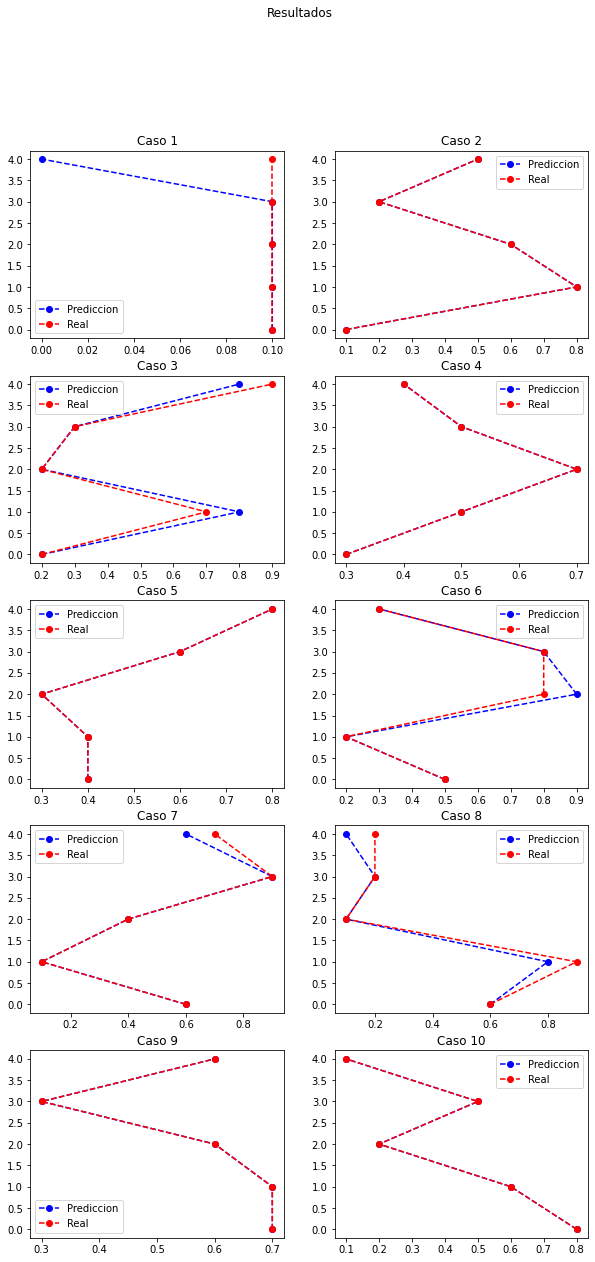

In [119]:
# Crea múltiples subgrafos
fig, ax = plot.subplots(nrows=5, ncols=2, figsize=(10,20))

index=0
for i in range(5):
    for j in range(2):
        # Dibujar gráficos
        ax[i, j].plot(data[index][0],[0,1,2,3,4], linestyle='--', marker='o', color='b', label='Prediccion') 
        ax[i, j].set_title("Caso "+str(index+1)) 
        ax[i, j].plot(data[index][1],[0,1,2,3,4], linestyle='--', marker='o', color='r', label='Real') 
        index=index+1
        ax[i, j].legend()

# Establecer título
plot.suptitle("Resultados")

# Mostrar
plot.show()